# Creating ratios for banks and building a statistical report

### Import Necesary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from IPython.display import display, HTML
from IPython.core.display import HTML
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas



### Import and read the data

In [3]:
df = pd.read_csv('tr_oth.csv')

df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_24812\2413887395.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tr_oth.csv')


,LEI_Code,NSA,Period,Item,Label,ASSETS_FV,ASSETS_Stages,Exposure,Financial_instruments,Amount,Fin_end_year,n_quarters,Footnote,Row,Column,Sheet
0,0W2PZJM8XOY22M4GG883,DE,202209,2321001,"Cash, cash balances at central banks and other...",0,0,0,0,22438.223070,0,3,NaN,10,5,Assets
1,0W2PZJM8XOY22M4GG883,DE,202209,2321002,Financial assets held for trading,0,0,0,0,16279.120570,0,3,NaN,11,5,Assets
2,0W2PZJM8XOY22M4GG883,DE,202209,2321002,Financial assets held for trading,1,0,0,0,3956.737645,0,3,NaN,11,6,Assets
3,0W2PZJM8XOY22M4GG883,DE,202209,2321002,Financial assets held for trading,2,0,0,0,11736.864570,0,3,NaN,11,7,Assets
4,0W2PZJM8XOY22M4GG883,DE,202209,2321002,Financial assets held for trading,3,0,0,0,585.518353,0,3,NaN,11,8,Assets


In [4]:
df.info() #apart from [Footnote] other columns dont have NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100223 entries, 0 to 100222
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LEI_Code               100223 non-null  object 
 1   NSA                    100223 non-null  object 
 2   Period                 100223 non-null  int64  
 3   Item                   100223 non-null  int64  
 4   Label                  100223 non-null  object 
 5   ASSETS_FV              100223 non-null  int64  
 6   ASSETS_Stages          100223 non-null  int64  
 7   Exposure               100223 non-null  int64  
 8   Financial_instruments  100223 non-null  int64  
 9   Amount                 100223 non-null  float64
 10  Fin_end_year           100223 non-null  int64  
 11  n_quarters             100223 non-null  int64  
 12  Footnote               2387 non-null    object 
 13  Row                    100223 non-null  int64  
 14  Column                 100223 non-nu

# Clean the original df
#### Q: How do you handle amounts of 0 with item = 2321019 , are these meant to remain 0, or be removed from analysis?

### 1) Drop some columns not needed for analysis

In [5]:
df = df.drop(['Footnote', 'Row', 'Column','Sheet','ASSETS_FV','Fin_end_year','Financial_instruments','Exposure'], axis=1)
df

,LEI_Code,NSA,Period,Item,Label,ASSETS_Stages,Amount,n_quarters
0,0W2PZJM8XOY22M4GG883,DE,202209,2321001,"Cash, cash balances at central banks and other...",0,22438.223070,3
1,0W2PZJM8XOY22M4GG883,DE,202209,2321002,Financial assets held for trading,0,16279.120570,3
2,0W2PZJM8XOY22M4GG883,DE,202209,2321002,Financial assets held for trading,0,3956.737645,3
3,0W2PZJM8XOY22M4GG883,DE,202209,2321002,Financial assets held for trading,0,11736.864570,3
4,0W2PZJM8XOY22M4GG883,DE,202209,2321002,Financial assets held for trading,0,585.518353,3
...,...,...,...,...,...,...,...,...
100218,XXXXXXXXXXXXXXXXXXXX,OT,202306,2320216,Operational risk : Of which basic indicator ap...,0,2176.546926,2
100219,XXXXXXXXXXXXXXXXXXXX,OT,202306,2320217,Operational risk : Of which standardised approach,0,2016.278631,2
100220,XXXXXXXXXXXXXXXXXXXX,OT,202306,2320218,Operational risk : Of which advanced measureme...,0,5777.458775,2
100221,XXXXXXXXXXXXXXXXXXXX,OT,202306,2320219,Other risk exposure amounts,0,2004.418640,2


### Replicating "Santander" example given in pdf file

In [6]:
# filter Santader example based on [LEI_code]
filtered_df = df[(df["Item"] == 2321019) & (df['LEI_Code']=='5493006QMFDDMYWIAM13')]
filtered_df

,LEI_Code,NSA,Period,Item,Label,ASSETS_Stages,Amount,n_quarters
27810,5493006QMFDDMYWIAM13,ES,202209,2321019,Gross carrying amount: Financial assets at amo...,1,1029605.806,3
27811,5493006QMFDDMYWIAM13,ES,202209,2321019,Gross carrying amount: Financial assets at amo...,2,68363.740,3
27812,5493006QMFDDMYWIAM13,ES,202209,2321019,Gross carrying amount: Financial assets at amo...,3,34078.704,3
27859,5493006QMFDDMYWIAM13,ES,202212,2321019,Gross carrying amount: Financial assets at amo...,1,999225.995,4
27860,5493006QMFDDMYWIAM13,ES,202212,2321019,Gross carrying amount: Financial assets at amo...,2,67589.466,4
27861,5493006QMFDDMYWIAM13,ES,202212,2321019,Gross carrying amount: Financial assets at amo...,3,33186.693,4
27908,5493006QMFDDMYWIAM13,ES,202303,2321019,Gross carrying amount: Financial assets at amo...,1,1005127.845,1
27909,5493006QMFDDMYWIAM13,ES,202303,2321019,Gross carrying amount: Financial assets at amo...,2,70489.516,1
27910,5493006QMFDDMYWIAM13,ES,202303,2321019,Gross carrying amount: Financial assets at amo...,3,32970.756,1
27957,5493006QMFDDMYWIAM13,ES,202306,2321019,Gross carrying amount: Financial assets at amo...,1,1009877.952,2


## Create adittional columns

### Add 2 new columns Total_Assets and Total_Loans

In [6]:
grouped_assets = df[(df['Item'] == 2321217) & (df['ASSETS_Stages'] == 0)] \
    .groupby(['LEI_Code', 'Period'])['Amount'].sum().round().reset_index(name='Total_Assets')

grouped_loans = df[(df['Item'] == 2321019) & (df['ASSETS_Stages'] != 0)] \
    .groupby(['LEI_Code', 'Item', 'Period'])['Amount'].sum().round().reset_index(name='Total_Loans')

# Merge both grouped results back to the original DataFrame
test_df = df.merge(grouped_assets, on=['LEI_Code', 'Period'], how='left' ) \
    .merge(grouped_loans, on=['LEI_Code', 'Item', 'Period'], how='left')


test_df

,LEI_Code,NSA,Period,Item,Label,ASSETS_Stages,Amount,n_quarters,Total_Assets,Total_Loans
0,0W2PZJM8XOY22M4GG883,DE,202209,2321001,"Cash, cash balances at central banks and other...",0,22438.223070,3,108839.0,NaN
1,0W2PZJM8XOY22M4GG883,DE,202209,2321002,Financial assets held for trading,0,16279.120570,3,108839.0,NaN
2,0W2PZJM8XOY22M4GG883,DE,202209,2321002,Financial assets held for trading,0,3956.737645,3,108839.0,NaN
3,0W2PZJM8XOY22M4GG883,DE,202209,2321002,Financial assets held for trading,0,11736.864570,3,108839.0,NaN
4,0W2PZJM8XOY22M4GG883,DE,202209,2321002,Financial assets held for trading,0,585.518353,3,108839.0,NaN
...,...,...,...,...,...,...,...,...,...,...
100218,XXXXXXXXXXXXXXXXXXXX,OT,202306,2320216,Operational risk : Of which basic indicator ap...,0,2176.546926,2,242325.0,NaN
100219,XXXXXXXXXXXXXXXXXXXX,OT,202306,2320217,Operational risk : Of which standardised approach,0,2016.278631,2,242325.0,NaN
100220,XXXXXXXXXXXXXXXXXXXX,OT,202306,2320218,Operational risk : Of which advanced measureme...,0,5777.458775,2,242325.0,NaN
100221,XXXXXXXXXXXXXXXXXXXX,OT,202306,2320219,Other risk exposure amounts,0,2004.418640,2,242325.0,NaN


#### Lets test for one LEI_Code if it displays correctly

In [8]:
test_df_example=  test_df[((test_df['Item']==2321019) | (test_df['Item']==2321217)) & (test_df['LEI_Code']=='0W2PZJM8XOY22M4GG883')] 
test_df_example

,LEI_Code,NSA,Period,Item,Label,ASSETS_Stages,Amount,n_quarters,Total_Assets,Total_Loans
34,0W2PZJM8XOY22M4GG883,DE,202209,2321019,Gross carrying amount: Financial assets at amo...,1,55020.217830,3,108839.0,57370.0
35,0W2PZJM8XOY22M4GG883,DE,202209,2321019,Gross carrying amount: Financial assets at amo...,2,2037.585444,3,108839.0,57370.0
36,0W2PZJM8XOY22M4GG883,DE,202209,2321019,Gross carrying amount: Financial assets at amo...,3,312.342722,3,108839.0,57370.0
83,0W2PZJM8XOY22M4GG883,DE,202212,2321019,Gross carrying amount: Financial assets at amo...,1,44940.706920,4,97572.0,49918.0
84,0W2PZJM8XOY22M4GG883,DE,202212,2321019,Gross carrying amount: Financial assets at amo...,2,4633.165155,4,97572.0,49918.0
85,0W2PZJM8XOY22M4GG883,DE,202212,2321019,Gross carrying amount: Financial assets at amo...,3,343.871749,4,97572.0,49918.0
132,0W2PZJM8XOY22M4GG883,DE,202303,2321019,Gross carrying amount: Financial assets at amo...,1,54024.192000,1,107660.0,59048.0
133,0W2PZJM8XOY22M4GG883,DE,202303,2321019,Gross carrying amount: Financial assets at amo...,2,4710.496274,1,107660.0,59048.0
134,0W2PZJM8XOY22M4GG883,DE,202303,2321019,Gross carrying amount: Financial assets at amo...,3,313.342366,1,107660.0,59048.0
181,0W2PZJM8XOY22M4GG883,DE,202306,2321019,Gross carrying amount: Financial assets at amo...,1,50453.194380,2,104611.0,55977.0


#### Add 5 new columns

In [7]:
test_df['Stage_1_Loans/Total_Loans'] = (test_df['Amount'] / test_df['Total_Loans']).where(test_df['ASSETS_Stages']==1).round(3)
test_df['Stage_2_Loans/Total_Loans'] = (test_df['Amount'] / test_df['Total_Loans']).where(test_df['ASSETS_Stages']==2).round(3)
test_df['Stage_3_Loans/Total_Loans'] = (test_df['Amount'] / test_df['Total_Loans']).where(test_df['ASSETS_Stages']==3).round(3)
test_df['Stage_3_Loans/Total_Assets'] = (test_df['Amount'] / test_df['Total_Assets']).where(test_df['ASSETS_Stages']==3).round(3)
test_df['Total_Loans/Total_Assets'] = (test_df['Total_Loans'] / test_df['Total_Assets']).round(3)
for_stats_df = test_df[test_df['Item']==2321019].drop(['Item','Label'],axis=1) #drop some columns we dont need, as they are the same for new df
for_stats_df

,LEI_Code,NSA,Period,ASSETS_Stages,Amount,n_quarters,Total_Assets,Total_Loans,Stage_1_Loans/Total_Loans,Stage_2_Loans/Total_Loans,Stage_3_Loans/Total_Loans,Stage_3_Loans/Total_Assets,Total_Loans/Total_Assets
34,0W2PZJM8XOY22M4GG883,DE,202209,1,55020.217830,3,108839.0,57370.0,0.959,NaN,NaN,NaN,0.527
35,0W2PZJM8XOY22M4GG883,DE,202209,2,2037.585444,3,108839.0,57370.0,NaN,0.036,NaN,NaN,0.527
36,0W2PZJM8XOY22M4GG883,DE,202209,3,312.342722,3,108839.0,57370.0,NaN,NaN,0.005,0.003,0.527
83,0W2PZJM8XOY22M4GG883,DE,202212,1,44940.706920,4,97572.0,49918.0,0.900,NaN,NaN,NaN,0.512
84,0W2PZJM8XOY22M4GG883,DE,202212,2,4633.165155,4,97572.0,49918.0,NaN,0.093,NaN,NaN,0.512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99488,XXXXXXXXXXXXXXXXXXXX,OT,202303,2,47143.747760,1,1147402.0,680804.0,NaN,0.069,NaN,NaN,0.593
99489,XXXXXXXXXXXXXXXXXXXX,OT,202303,3,10407.356290,1,1147402.0,680804.0,NaN,NaN,0.015,0.009,0.593
99536,XXXXXXXXXXXXXXXXXXXX,OT,202306,1,62401.653840,2,242325.0,66938.0,0.932,NaN,NaN,NaN,0.276
99537,XXXXXXXXXXXXXXXXXXXX,OT,202306,2,4131.929582,2,242325.0,66938.0,NaN,0.062,NaN,NaN,0.276


### Export to better understand the data for report

In [10]:
for_stats_df.to_excel('for_stats_df.xlsx', index=False)


### Make it even more compact, from a matrix with 3 rows for Asset_stages into 1 row for each period

In [8]:
aggregated_df = for_stats_df.groupby(['LEI_Code', 'NSA', 'Period', 'n_quarters', 'Total_Assets', 'Total_Loans','Total_Loans/Total_Assets']).agg({
    'Stage_1_Loans/Total_Loans': 'sum',
    'Stage_2_Loans/Total_Loans': 'sum',
    'Stage_3_Loans/Total_Loans': 'sum',
    'Stage_3_Loans/Total_Assets': 'sum'
}).reset_index()
aggregated_df

,LEI_Code,NSA,Period,n_quarters,Total_Assets,Total_Loans,Total_Loans/Total_Assets,Stage_1_Loans/Total_Loans,Stage_2_Loans/Total_Loans,Stage_3_Loans/Total_Loans,Stage_3_Loans/Total_Assets
0,0W2PZJM8XOY22M4GG883,DE,202209,3,108839.0,57370.0,0.527,0.959,0.036,0.005,0.003
1,0W2PZJM8XOY22M4GG883,DE,202212,4,97572.0,49918.0,0.512,0.900,0.093,0.007,0.004
2,0W2PZJM8XOY22M4GG883,DE,202303,1,107660.0,59048.0,0.548,0.915,0.080,0.005,0.003
3,0W2PZJM8XOY22M4GG883,DE,202306,2,104611.0,55977.0,0.535,0.901,0.093,0.006,0.003
4,2138009Y59EAR7H1UO97,LV,202209,3,5087.0,3104.0,0.610,0.908,0.067,0.025,0.015
...,...,...,...,...,...,...,...,...,...,...,...
441,VWMYAEQSTOPNV0SUGU82,ES,202306,2,110099.0,81031.0,0.736,0.947,0.031,0.022,0.016
442,XXXXXXXXXXXXXXXXXXXX,OT,202209,3,1114055.0,686387.0,0.616,0.918,0.067,0.015,0.009
443,XXXXXXXXXXXXXXXXXXXX,OT,202212,4,141045.0,45171.0,0.320,0.878,0.108,0.014,0.004
444,XXXXXXXXXXXXXXXXXXXX,OT,202303,1,1147402.0,680804.0,0.593,0.915,0.069,0.015,0.009


#### Replace a faulty LEI Code with its corrected one

In [9]:
aggregated_df['LEI_Code'] = aggregated_df['LEI_Code'].replace('9.598E+19', '95980020140005881190')
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LEI_Code                    446 non-null    object 
 1   NSA                         446 non-null    object 
 2   Period                      446 non-null    int64  
 3   n_quarters                  446 non-null    int64  
 4   Total_Assets                446 non-null    float64
 5   Total_Loans                 446 non-null    float64
 6   Total_Loans/Total_Assets    446 non-null    float64
 7   Stage_1_Loans/Total_Loans   446 non-null    float64
 8   Stage_2_Loans/Total_Loans   446 non-null    float64
 9   Stage_3_Loans/Total_Loans   446 non-null    float64
 10  Stage_3_Loans/Total_Assets  446 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 38.5+ KB


#### Merge the names of banks from Metadata.xlsx with our df

In [10]:
metadata_df = pd.read_excel("TR_Metadata.xlsx", sheet_name="List of Institutions", header=1)

metadata_df = metadata_df[['LEI_Code', 'Name']]

merged_df = pd.merge(aggregated_df, metadata_df, on='LEI_Code', how='left')
merged_df.rename(columns={'Name': 'Bank_name'}, inplace=True)
column_order = ['LEI_Code', 'Bank_name'] + [col for col in merged_df.columns if col not in ['LEI_Code', 'Bank_name']]

# Reindex the DataFrame to the new column order
merged_df = merged_df[column_order]

merged_df['Bank_name'].fillna('Other', inplace=True)

merged_df


C:\Users\User\AppData\Local\Temp\ipykernel_24812\454866447.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Bank_name'].fillna('Other', inplace=True)


,LEI_Code,Bank_name,NSA,Period,n_quarters,Total_Assets,Total_Loans,Total_Loans/Total_Assets,Stage_1_Loans/Total_Loans,Stage_2_Loans/Total_Loans,Stage_3_Loans/Total_Loans,Stage_3_Loans/Total_Assets
0,0W2PZJM8XOY22M4GG883,DekaBank Deutsche Girozentrale,DE,202209,3,108839.0,57370.0,0.527,0.959,0.036,0.005,0.003
1,0W2PZJM8XOY22M4GG883,DekaBank Deutsche Girozentrale,DE,202212,4,97572.0,49918.0,0.512,0.900,0.093,0.007,0.004
2,0W2PZJM8XOY22M4GG883,DekaBank Deutsche Girozentrale,DE,202303,1,107660.0,59048.0,0.548,0.915,0.080,0.005,0.003
3,0W2PZJM8XOY22M4GG883,DekaBank Deutsche Girozentrale,DE,202306,2,104611.0,55977.0,0.535,0.901,0.093,0.006,0.003
4,2138009Y59EAR7H1UO97,"Akciju sabiedrība ""Citadele banka""",LV,202209,3,5087.0,3104.0,0.610,0.908,0.067,0.025,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...
441,VWMYAEQSTOPNV0SUGU82,"Bankinter, S.A.",ES,202306,2,110099.0,81031.0,0.736,0.947,0.031,0.022,0.016
442,XXXXXXXXXXXXXXXXXXXX,Other,OT,202209,3,1114055.0,686387.0,0.616,0.918,0.067,0.015,0.009
443,XXXXXXXXXXXXXXXXXXXX,Other,OT,202212,4,141045.0,45171.0,0.320,0.878,0.108,0.014,0.004
444,XXXXXXXXXXXXXXXXXXXX,Other,OT,202303,1,1147402.0,680804.0,0.593,0.915,0.069,0.015,0.009


In [237]:
merged_df.to_excel('merged_df_no0.xlsx', index=False)

#### Create _diff_prev_quarter columns (maybe not necessary for final analysis)

In [215]:
columns_to_diff = [
    'Total_Loans/Total_Assets',
    'Stage_1_Loans/Total_Loans',
    'Stage_2_Loans/Total_Loans',
    'Stage_3_Loans/Total_Loans',
    'Stage_3_Loans/Total_Assets'
]
for column in columns_to_diff:
        merged_df[f'{column}_diff_prev_quarter'] = merged_df.groupby('LEI_Code')[column].diff().round(3)

merged_df


,LEI_Code,Bank_name,NSA,Period,n_quarters,Total_Assets,Total_Loans,Total_Loans/Total_Assets,Stage_1_Loans/Total_Loans,Stage_2_Loans/Total_Loans,Stage_3_Loans/Total_Loans,Stage_3_Loans/Total_Assets,Total_Loans/Total_Assets_diff_prev_quarter,Stage_1_Loans/Total_Loans_diff_prev_quarter,Stage_2_Loans/Total_Loans_diff_prev_quarter,Stage_3_Loans/Total_Loans_diff_prev_quarter,Stage_3_Loans/Total_Assets_diff_prev_quarter,Position_2022_Q3,Position_2023_Q2
0,0W2PZJM8XOY22M4GG883,DekaBank Deutsche Girozentrale,DE,202209,3,108839.0,57370.0,0.527,0.959,0.036,0.005,0.003,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,0W2PZJM8XOY22M4GG883,DekaBank Deutsche Girozentrale,DE,202212,4,97572.0,49918.0,0.512,0.900,0.093,0.007,0.004,-0.015,-0.059,0.057,0.002,0.001,NaN,NaN
2,0W2PZJM8XOY22M4GG883,DekaBank Deutsche Girozentrale,DE,202303,1,107660.0,59048.0,0.548,0.915,0.080,0.005,0.003,0.036,0.015,-0.013,-0.002,-0.001,NaN,NaN
3,0W2PZJM8XOY22M4GG883,DekaBank Deutsche Girozentrale,DE,202306,2,104611.0,55977.0,0.535,0.901,0.093,0.006,0.003,-0.013,-0.014,0.013,0.001,0.000,NaN,1.0
4,2138009Y59EAR7H1UO97,"Akciju sabiedrība ""Citadele banka""",LV,202209,3,5087.0,3104.0,0.610,0.908,0.067,0.025,0.015,NaN,NaN,NaN,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,VWMYAEQSTOPNV0SUGU82,"Bankinter, S.A.",ES,202306,2,110099.0,81031.0,0.736,0.947,0.031,0.022,0.016,0.017,0.004,-0.003,-0.001,0.000,NaN,112.0
442,XXXXXXXXXXXXXXXXXXXX,Other,OT,202209,3,1114055.0,686387.0,0.616,0.918,0.067,0.015,0.009,NaN,NaN,NaN,NaN,NaN,110.0,NaN
443,XXXXXXXXXXXXXXXXXXXX,Other,OT,202212,4,141045.0,45171.0,0.320,0.878,0.108,0.014,0.004,-0.296,-0.040,0.041,-0.001,-0.005,NaN,NaN
444,XXXXXXXXXXXXXXXXXXXX,Other,OT,202303,1,1147402.0,680804.0,0.593,0.915,0.069,0.015,0.009,0.273,0.037,-0.039,0.001,0.005,NaN,NaN


### Exclude 3 DE banks that have loans = 0 

In [11]:
merged_df = merged_df[(merged_df['Total_Loans'] != 0)]

### Drop NSA = OT, because is an aggregated data for multiple LEI codes ?????? (my doubt)

In [12]:
aggregated_df.to_excel('aggregated_df.xlsx', index=False)

In [13]:
test_df.to_excel('test_df.xlsx', index=False)

# ANALYSIS TOP 20

### Total Loans/ Total Assets analysis

#### Pivot Table 1

In [238]:
# Step 1: Get the top 20 banks based on 'Total_Loans/Total_Assets' for 2022 Q3 (202209)
top_20_banks_2022Q3_total_loans_assets = (merged_df[merged_df['Period'] == 202209]
                                          .nlargest(20, 'Total_Loans/Total_Assets'))

# Step 2: Merge with the original DataFrame to get all periods for the top banks
filtered_df_2022Q3_total_loans_assets = merged_df[merged_df['Bank_name'].isin(top_20_banks_2022Q3_total_loans_assets['Bank_name'])]

# Step 3: Pivot the DataFrame to create the desired format
pivot_table_2022Q3_total_loans_assets = (filtered_df_2022Q3_total_loans_assets.pivot_table(index='Bank_name',
                                                                                           columns='Period',
                                                                                           values='Total_Loans/Total_Assets',
                                                                                           aggfunc='first'))  # Use 'first' to handle multiple values

# Step 4: Rename the columns to reflect quarters
pivot_table_2022Q3_total_loans_assets.columns = ['2022 Q3' if col == 202209 else
                                                 '2022 Q4' if col == 202212 else
                                                 '2023 Q1' if col == 202303 else
                                                 '2023 Q2' if col == 202306 else col
                                                 for col in pivot_table_2022Q3_total_loans_assets.columns]

# Step 5: Reset index to get a clean DataFrame and start index from 1
pivot_table_2022Q3_total_loans_assets.reset_index(inplace=True)
pivot_table_2022Q3_total_loans_assets = pivot_table_2022Q3_total_loans_assets.sort_values(by='2022 Q3', ascending=False)
pivot_table_2022Q3_total_loans_assets.reset_index(drop=True, inplace=True)
pivot_table_2022Q3_total_loans_assets.index += 1  # Start index from 1

# Step 6: Add the NSA column correctly
# Get NSA values for the top 20 banks from the original merged_df
nsa_values_total_loans_assets = merged_df[merged_df['Bank_name'].isin(top_20_banks_2022Q3_total_loans_assets['Bank_name'])]

# Drop duplicates to get unique NSA values for each bank
nsa_values_total_loans_assets = nsa_values_total_loans_assets.drop_duplicates(subset=['Bank_name'], keep='first')[['Bank_name', 'NSA']]

# Merge NSA values with the pivot table
pivot_table_2022Q3_total_loans_assets = pivot_table_2022Q3_total_loans_assets.merge(nsa_values_total_loans_assets, on='Bank_name', how='left')

# Reorder columns to place NSA after Bank_name
columns_order_total_loans_assets = ['Bank_name', 'NSA'] + [col for col in pivot_table_2022Q3_total_loans_assets.columns if col not in ['Bank_name', 'NSA']]
pivot_table_2022Q3_total_loans_assets = pivot_table_2022Q3_total_loans_assets[columns_order_total_loans_assets]

# Adding a title to the DataFrame display
title_2022Q3_total_loans_assets = "<h3 style='text-align: center;'>Top 20 Banks by Total Loans/Total Assets in 2022 Q3 with NSA</h3>"
display(HTML(title_2022Q3_total_loans_assets))
display(pivot_table_2022Q3_total_loans_assets)


,Bank_name,NSA,2022 Q3,2022 Q4,2023 Q1,2023 Q2
0,Crelan,BE,0.886,0.887,0.889,0.894
1,Länsförsäkringar Bank AB - gruppen,SE,0.852,0.844,0.810,0.813
2,Landsbankinn hf.,IS,0.842,0.860,0.820,0.840
3,SBAB Bank AB - Grupp,SE,0.840,0.835,0.804,0.825
4,Íslandsbanki hf.,IS,0.794,0.800,0.823,0.830
5,Deutsche Pfandbriefbank AG,DE,0.776,0.807,0.795,0.832
6,RCI Banque,FR,0.773,0.827,0.815,0.856
7,"Kutxabank, S.A.",ES,0.748,0.726,0.721,0.771
8,SFIL S.A.,FR,0.747,0.752,0.732,0.753
9,Luminor Holding AS,EE,0.747,0.742,0.700,0.703


#### Pivot Table 2

In [239]:
# Step 1: Get the top 20 banks based on 'Total_Loans/Total_Assets' for 2023 Q2 (202306)
top_20_banks_2023Q2_total_loans_assets = (merged_df[merged_df['Period'] == 202306]
                                          .nlargest(20, 'Total_Loans/Total_Assets'))

# Step 2: Merge with the original DataFrame to get all periods for the top banks
filtered_df_2023Q2_total_loans_assets = merged_df[merged_df['Bank_name'].isin(top_20_banks_2023Q2_total_loans_assets['Bank_name'])]

# Step 3: Pivot the DataFrame to create the desired format
pivot_table_2023Q2_total_loans_assets = (filtered_df_2023Q2_total_loans_assets.pivot_table(index='Bank_name',
                                                                                           columns='Period',
                                                                                           values='Total_Loans/Total_Assets',
                                                                                           aggfunc='first'))  # Use 'first' to handle multiple values

# Step 4: Rename the columns to reflect quarters
pivot_table_2023Q2_total_loans_assets.columns = ['2022 Q3' if col == 202209 else
                                                 '2022 Q4' if col == 202212 else
                                                 '2023 Q1' if col == 202303 else
                                                 '2023 Q2' if col == 202306 else col
                                                 for col in pivot_table_2023Q2_total_loans_assets.columns]

# Step 5: Reset index to get a clean DataFrame and start index from 1
pivot_table_2023Q2_total_loans_assets.reset_index(inplace=True)
pivot_table_2023Q2_total_loans_assets = pivot_table_2023Q2_total_loans_assets.sort_values(by='2023 Q2', ascending=False)
pivot_table_2023Q2_total_loans_assets.reset_index(drop=True, inplace=True)
pivot_table_2023Q2_total_loans_assets.index += 1  # Start index from 1

# Step 6: Add the NSA column correctly
# Get NSA values for the top 20 banks from the original merged_df
nsa_values_total_loans_assets_2023Q2 = merged_df[merged_df['Bank_name'].isin(top_20_banks_2023Q2_total_loans_assets['Bank_name'])]

# Drop duplicates to get unique NSA values for each bank
nsa_values_total_loans_assets_2023Q2 = nsa_values_total_loans_assets_2023Q2.drop_duplicates(subset=['Bank_name'], keep='first')[['Bank_name', 'NSA']]

# Merge NSA values with the pivot table
pivot_table_2023Q2_total_loans_assets = pivot_table_2023Q2_total_loans_assets.merge(nsa_values_total_loans_assets_2023Q2, on='Bank_name', how='left')

# Reorder columns to place NSA after Bank_name
columns_order_total_loans_assets_2023Q2 = ['Bank_name', 'NSA'] + [col for col in pivot_table_2023Q2_total_loans_assets.columns if col not in ['Bank_name', 'NSA']]
pivot_table_2023Q2_total_loans_assets = pivot_table_2023Q2_total_loans_assets[columns_order_total_loans_assets_2023Q2]

# Adding a title to the DataFrame display
title_2023Q2_total_loans_assets = "<h3 style='text-align: center;'>Top 20 Banks by Total Loans/Total Assets in 2023 Q2 with NSA</h3>"
display(HTML(title_2023Q2_total_loans_assets))
display(pivot_table_2023Q2_total_loans_assets)


,Bank_name,NSA,2022 Q3,2022 Q4,2023 Q1,2023 Q2
0,Crelan,BE,0.886,0.887,0.889,0.894
1,RCI Banque,FR,0.773,0.827,0.815,0.856
2,Landsbankinn hf.,IS,0.842,0.860,0.820,0.840
3,Deutsche Pfandbriefbank AG,DE,0.776,0.807,0.795,0.832
4,Íslandsbanki hf.,IS,0.794,0.800,0.823,0.830
5,SBAB Bank AB - Grupp,SE,0.840,0.835,0.804,0.825
6,Länsförsäkringar Bank AB - gruppen,SE,0.852,0.844,0.810,0.813
7,"Kutxabank, S.A.",ES,0.748,0.726,0.721,0.771
8,Volksbanken Verbund,AT,0.703,0.761,0.752,0.762
9,Norddeutsche Landesbank - Girozentrale -,DE,0.686,0.749,0.748,0.757


### MAIN

In [240]:
# Step 1: Adjust positions to start from 1
pivot_table_2022Q3_total_loans_assets['Position_2022_Q3'] = pivot_table_2022Q3_total_loans_assets.index + 1  # Index starting from 1
pivot_table_2023Q2_total_loans_assets['Position_2023_Q2'] = pivot_table_2023Q2_total_loans_assets.index + 1  # Index starting from 1

# Step 2: Merge the tables on 'Bank_name' to compare positions
merged_positions_total_loans_assets = pivot_table_2023Q2_total_loans_assets.merge(
    pivot_table_2022Q3_total_loans_assets[['Bank_name', 'Position_2022_Q3']],
    on='Bank_name',
    how='left'
)

# Step 3: Calculate the movement and keep it as an annotation in 'Bank_name'
def position_movement_total_loans_assets(row):
    # Handle NaN for Position_2022_Q3
    if pd.isna(row['Position_2022_Q3']):
        return f"{row['Bank_name']} ❗"  # New entry in 2023 Q2
    change = row['Position_2022_Q3'] - row['Position_2023_Q2']
    if change > 0:
        return f"{row['Bank_name']} 🔺 {change}"  # Moved up
    elif change < 0:
        return f"{row['Bank_name']} 🔻 {-change}"  # Moved down
    else:
        return f"{row['Bank_name']} ➡️"  # Stayed the same

# Step 4: Apply the function to update Bank_name with movement annotations
merged_positions_total_loans_assets['Bank_name'] = merged_positions_total_loans_assets.apply(position_movement_total_loans_assets, axis=1)

# Step 5: Drop the extra columns used for calculations and reset index to start from 1
final_table_total_loans_assets = merged_positions_total_loans_assets.drop(columns=['Position_2023_Q2', 'Position_2022_Q3']).reset_index(drop=True)

# Step 6: Calculate the European mean for each period and prepare the mean row
# Create a dictionary to map original period format to display format
period_mapping = {
    202209: '2022 Q3',
    202212: '2022 Q4',
    202303: '2023 Q1',
    202306: '2023 Q2'
}

# Calculate the European mean for each original period in merged_df
mean_values_total_loans_assets = {
    period_mapping[202209]: merged_df.loc[merged_df['Period'] == 202209, 'Total_Loans/Total_Assets'].mean(),
    period_mapping[202212]: merged_df.loc[merged_df['Period'] == 202212, 'Total_Loans/Total_Assets'].mean(),
    period_mapping[202303]: merged_df.loc[merged_df['Period'] == 202303, 'Total_Loans/Total_Assets'].mean(),
    period_mapping[202306]: merged_df.loc[merged_df['Period'] == 202306, 'Total_Loans/Total_Assets'].mean()
}

# Create a new row for European Mean with calculated mean values
european_mean_row_total_loans_assets = pd.Series(['European Mean'] + list(mean_values_total_loans_assets.values()), 
                                                 index=['Bank_name'] + list(mean_values_total_loans_assets.keys()))

# Step 7: Append the European mean row to the final_table_total_loans_assets DataFrame
final_table_total_loans_assets = pd.concat([final_table_total_loans_assets, european_mean_row_total_loans_assets.to_frame().T], ignore_index=True)

# Step 8: Reset the index to start from 1 to 21
final_table_total_loans_assets.index = final_table_total_loans_assets.index + 1

# Step 9: Round the numeric columns to 3 decimal places
final_table_total_loans_assets.iloc[:, 1:] = final_table_total_loans_assets.iloc[:, 1:].round(3)

# Step 10: Convert the rounded values to strings for display
final_table_total_loans_assets.iloc[:, 1:] = final_table_total_loans_assets.iloc[:, 1:].astype(str).replace(r'(\d+\.\d{3})\d*', r'\1', regex=True)

# Step 11: Format the European Mean row to color it red
styled_table_total_loans_assets = final_table_total_loans_assets.style.apply(
    lambda x: ['color: red' if x['Bank_name'] == 'European Mean' else '' for _ in x],
    axis=1
)

# Step 12: Convert the styled table to HTML using to_html()
table_html_total_loans_assets = styled_table_total_loans_assets.to_html()

# Step 13: Adding a title to the final DataFrame display
title_with_movement_total_loans_assets = "<h3 style='text-align: center;'>Top 20 Banks by Total Loans/Total Assets in 2023 Q2 with Position Movement since 2022 Q3</h3>"
display(HTML(title_with_movement_total_loans_assets))

# Step 14: Adding a container for the legend next to the table
legend_html_total_loans_assets = """
<div style='display: flex; align-items: flex-start;'>
    <div style='margin-right: 20px;'>
        {table_html}
    </div>
    <div style='text-align: left; margin-left: 20px;'>
            <strong>Legend:</strong><br>
            ❗ New Entry<br>
            🔺 Moved Up<br>
            🔻 Moved Down<br>
            ➡️ Stayed the Same
    </div>
</div>
"""

# Step 15: Replace {table_html} with the actual table HTML
legend_with_table_html_total_loans_assets = legend_html_total_loans_assets.format(table_html=table_html_total_loans_assets)

# Step 16: Display the final layout with the table and legend
display(HTML(legend_with_table_html_total_loans_assets))

,Bank_name,NSA,2022 Q3,2022 Q4,2023 Q1,2023 Q2
1,Crelan ➡️,BE,0.886,0.887,0.889,0.894
2,RCI Banque 🔺 5.0,FR,0.773,0.827,0.815,0.856
3,Landsbankinn hf. ➡️,IS,0.842,0.86,0.82,0.84
4,Deutsche Pfandbriefbank AG 🔺 2.0,DE,0.776,0.807,0.795,0.832
5,Íslandsbanki hf. ➡️,IS,0.794,0.8,0.823,0.83
6,SBAB Bank AB - Grupp 🔻 2.0,SE,0.84,0.835,0.804,0.825
7,Länsförsäkringar Bank AB - gruppen 🔻 5.0,SE,0.852,0.844,0.81,0.813
8,"Kutxabank, S.A. ➡️",ES,0.748,0.726,0.721,0.771
9,Volksbanken Verbund 🔺 7.0,AT,0.703,0.761,0.752,0.762
10,Norddeutsche Landesbank - Girozentrale - 🔺 8.0,DE,0.686,0.749,0.748,0.757


### Stage 1 loans analysis

#### Pivot Tables

In [241]:
# Step 1: Get the top 20 banks based on 'Stage_1_Loans/Total_Loans' for 2022 Q3 (202209)
top_20_banks_2022Q3_stage1 = (merged_df[merged_df['Period'] == 202209]
                               .nlargest(20, 'Stage_1_Loans/Total_Loans'))

# Step 2: Merge with the original DataFrame to get all periods for the top banks
filtered_df_2022Q3_stage1 = merged_df[merged_df['Bank_name'].isin(top_20_banks_2022Q3_stage1['Bank_name'])]

# Step 3: Pivot the DataFrame to create the desired format
pivot_table_2022Q3_stage1 = (filtered_df_2022Q3_stage1.pivot_table(index='Bank_name',
                                                                  columns='Period',
                                                                  values='Stage_1_Loans/Total_Loans',
                                                                  aggfunc='first'))  # Use 'first' to handle multiple values

# Step 4: Rename the columns to reflect quarters
pivot_table_2022Q3_stage1.columns = ['2022 Q3' if col == 202209 else
                                      '2022 Q4' if col == 202212 else
                                      '2023 Q1' if col == 202303 else
                                      '2023 Q2' if col == 202306 else col
                                      for col in pivot_table_2022Q3_stage1.columns]

# Step 5: Reset index to get a clean DataFrame and start index from 1
pivot_table_2022Q3_stage1.reset_index(inplace=True)
pivot_table_2022Q3_stage1 = pivot_table_2022Q3_stage1.sort_values(by='2022 Q3', ascending=False)
pivot_table_2022Q3_stage1.reset_index(drop=True, inplace=True)
pivot_table_2022Q3_stage1.index += 1  # Start index from 1

# Step 6: Add the NSA column correctly
# Get NSA values for the top 20 banks from the original merged_df
nsa_values_stage1 = merged_df[merged_df['Bank_name'].isin(top_20_banks_2022Q3_stage1['Bank_name'])]

# Drop duplicates to get unique NSA values for each bank
nsa_values_stage1 = nsa_values_stage1.drop_duplicates(subset=['Bank_name'], keep='first')[['Bank_name', 'NSA']]

# Merge NSA values with the pivot table
pivot_table_2022Q3_stage1 = pivot_table_2022Q3_stage1.merge(nsa_values_stage1, on='Bank_name', how='left')

# Reorder columns to place NSA after Bank_name
columns_order_stage1 = ['Bank_name', 'NSA'] + [col for col in pivot_table_2022Q3_stage1.columns if col not in ['Bank_name', 'NSA']]
pivot_table_2022Q3_stage1 = pivot_table_2022Q3_stage1[columns_order_stage1]

# Adding a title to the DataFrame display
title_2022Q3_stage1 = "<h3 style='text-align: center;'>Top 20 Banks by Stage 1 Loans/Total Loans in 2022 Q3 with NSA</h3>"
display(HTML(title_2022Q3_stage1))
display(pivot_table_2022Q3_stage1)

,Bank_name,NSA,2022 Q3,2022 Q4,2023 Q1,2023 Q2
0,The Bank of New York Mellon,BE,1.000,1.000,1.001,1.001
1,Kommuninvest - Grupp,SE,1.000,1.000,1.000,1.000
2,UBS Europe SE,DE,0.999,0.999,0.999,0.999
3,FINECOBANK SPA,IT,0.994,0.990,0.986,0.988
4,Kuntarahoitus Oyj,FI,0.988,0.984,0.984,0.971
5,Quintet Private Bank (Europe) S.A,LU,0.982,0.980,0.973,0.963
6,Länsförsäkringar Bank AB - gruppen,SE,0.980,0.979,0.983,0.982
7,Liechtensteinische Landesbank AG,LI,0.977,0.977,0.978,0.978
8,LGT Group Foundation,LI,0.973,0.995,0.994,0.994
9,Svenska Handelsbanken - gruppen,SE,0.971,0.962,0.964,0.950


In [242]:
# Step 1: Get the top 20 banks based on 'Stage_1_Loans/Total_Loans' for 2023 Q2 (202306)
top_20_banks_2023Q2_stage1 = (merged_df[merged_df['Period'] == 202306]
                               .nlargest(20, 'Stage_1_Loans/Total_Loans'))

# Step 2: Merge with the original DataFrame to get all periods for the top banks
filtered_df_2023Q2_stage1 = merged_df[merged_df['Bank_name'].isin(top_20_banks_2023Q2_stage1['Bank_name'])]

# Step 3: Pivot the DataFrame to create the desired format
pivot_table_2023Q2_stage1 = (filtered_df_2023Q2_stage1.pivot_table(index='Bank_name',
                                                                  columns='Period',
                                                                  values='Stage_1_Loans/Total_Loans',
                                                                  aggfunc='first'))  # Use 'first' to handle multiple values

# Step 4: Rename the columns to reflect quarters
pivot_table_2023Q2_stage1.columns = ['2022 Q3' if col == 202209 else
                                      '2022 Q4' if col == 202212 else
                                      '2023 Q1' if col == 202303 else
                                      '2023 Q2' if col == 202306 else col
                                      for col in pivot_table_2023Q2_stage1.columns]

# Step 5: Reset index to get a clean DataFrame and start index from 1
pivot_table_2023Q2_stage1.reset_index(inplace=True)
pivot_table_2023Q2_stage1 = pivot_table_2023Q2_stage1.sort_values(by='2023 Q2', ascending=False)
pivot_table_2023Q2_stage1.reset_index(drop=True, inplace=True)
pivot_table_2023Q2_stage1.index += 1  # Start index from 1

# Step 6: Add the NSA column correctly
# Get NSA values for the top 20 banks from the original merged_df
nsa_values_stage1_2023Q2 = merged_df[merged_df['Bank_name'].isin(top_20_banks_2023Q2_stage1['Bank_name'])]

# Drop duplicates to get unique NSA values for each bank
nsa_values_stage1_2023Q2 = nsa_values_stage1_2023Q2.drop_duplicates(subset=['Bank_name'], keep='first')[['Bank_name', 'NSA']]

# Merge NSA values with the pivot table
pivot_table_2023Q2_stage1 = pivot_table_2023Q2_stage1.merge(nsa_values_stage1_2023Q2, on='Bank_name', how='left')

# Reorder columns to place NSA after Bank_name
columns_order_stage1_2023Q2 = ['Bank_name', 'NSA'] + [col for col in pivot_table_2023Q2_stage1.columns if col not in ['Bank_name', 'NSA']]
pivot_table_2023Q2_stage1 = pivot_table_2023Q2_stage1[columns_order_stage1_2023Q2]

# Adding a title to the DataFrame display
title_2023Q2_stage1 = "<h3 style='text-align: center;'>Top 20 Banks by Stage 1 Loans/Total Loans in 2023 Q2 with NSA</h3>"
display(HTML(title_2023Q2_stage1))
display(pivot_table_2023Q2_stage1)

,Bank_name,NSA,2022 Q3,2022 Q4,2023 Q1,2023 Q2
0,The Bank of New York Mellon,BE,1.000,1.000,1.001,1.001
1,Kommuninvest - Grupp,SE,1.000,1.000,1.000,1.000
2,UBS Europe SE,DE,0.999,0.999,0.999,0.999
3,LGT Group Foundation,LI,0.973,0.995,0.994,0.994
4,FINECOBANK SPA,IT,0.994,0.990,0.986,0.988
5,Länsförsäkringar Bank AB - gruppen,SE,0.980,0.979,0.983,0.982
6,Liechtensteinische Landesbank AG,LI,0.977,0.977,0.978,0.978
7,Kuntarahoitus Oyj,FI,0.988,0.984,0.984,0.971
8,BNG Bank N.V.,NL,NaN,0.969,NaN,0.969
9,Skandinaviska Enskilda Banken - gruppen,SE,0.963,0.964,0.966,0.965


### MAIN

In [243]:
# Step 1: Adjust positions to start from 1
pivot_table_2022Q3_stage1['Position_2022_Q3'] = pivot_table_2022Q3_stage1.index + 1  # Index starting from 1
pivot_table_2023Q2_stage1['Position_2023_Q2'] = pivot_table_2023Q2_stage1.index + 1  # Index starting from 1

# Step 2: Merge the tables on 'Bank_name' to compare positions
merged_positions_stage1 = pivot_table_2023Q2_stage1.merge(
    pivot_table_2022Q3_stage1[['Bank_name', 'Position_2022_Q3']],
    on='Bank_name',
    how='left'
)

# Step 3: Calculate the movement and keep it as an annotation in 'Bank_name'
def position_movement_stage1(row):
    # Handle NaN for Position_2022_Q3
    if pd.isna(row['Position_2022_Q3']):
        return f"{row['Bank_name']} ❗"  # New entry in 2023 Q2
    change = row['Position_2022_Q3'] - row['Position_2023_Q2']
    if change > 0:
        return f"{row['Bank_name']} 🔺 {change}"  # Moved up
    elif change < 0:
        return f"{row['Bank_name']} 🔻 {-change}"  # Moved down
    else:
        return f"{row['Bank_name']} ➡️"  # Stayed the same

# Step 4: Apply the function to update Bank_name with movement annotations
merged_positions_stage1['Bank_name'] = merged_positions_stage1.apply(position_movement_stage1, axis=1)

# Step 5: Drop the extra columns used for calculations and reset index to start from 1
final_table_stage1 = merged_positions_stage1.drop(columns=['Position_2023_Q2', 'Position_2022_Q3']).reset_index(drop=True)

# Step 6: Calculate the European mean for each period and prepare the mean row
# Create a dictionary to map original period format to display format
period_mapping = {
    202209: '2022 Q3',
    202212: '2022 Q4',
    202303: '2023 Q1',
    202306: '2023 Q2'
}

# Calculate the European mean for each original period in merged_df
mean_values_stage1 = {
    period_mapping[202209]: merged_df.loc[merged_df['Period'] == 202209, 'Stage_1_Loans/Total_Loans'].mean(),
    period_mapping[202212]: merged_df.loc[merged_df['Period'] == 202212, 'Stage_1_Loans/Total_Loans'].mean(),
    period_mapping[202303]: merged_df.loc[merged_df['Period'] == 202303, 'Stage_1_Loans/Total_Loans'].mean(),
    period_mapping[202306]: merged_df.loc[merged_df['Period'] == 202306, 'Stage_1_Loans/Total_Loans'].mean()
}

# Create a new row for European Mean with calculated mean values
european_mean_row_stage1 = pd.Series(['European Mean'] + list(mean_values_stage1.values()), 
                                      index=['Bank_name'] + list(mean_values_stage1.keys()))

# Step 7: Append the European mean row to the final_table_stage1 DataFrame
final_table_stage1 = pd.concat([final_table_stage1, european_mean_row_stage1.to_frame().T], ignore_index=True)

# Step 8: Reset the index to start from 1 to 21
final_table_stage1.index = final_table_stage1.index + 1

# Step 9: Round the numeric columns to 3 decimal places
final_table_stage1.iloc[:, 1:] = final_table_stage1.iloc[:, 1:].round(3)

# Step 10: Convert the rounded values to strings for display
final_table_stage1.iloc[:, 1:] = final_table_stage1.iloc[:, 1:].astype(str).replace(r'(\d+\.\d{3})\d*', r'\1', regex=True)

# Step 11: Format the European Mean row to color it red
styled_table_stage1 = final_table_stage1.style.apply(
    lambda x: ['color: red' if x['Bank_name'] == 'European Mean' else '' for _ in x],
    axis=1
)

# Step 12: Convert the styled table to HTML using to_html()
table_html_stage1 = styled_table_stage1.to_html()

# Step 13: Adding a title to the final DataFrame display
title_with_movement_stage1 = "<h3 style='text-align: center;'>Top 20 Banks by Stage 1 Loans/Total Loans in 2023 Q2 with Position Movement since 2022 Q3</h3>"
display(HTML(title_with_movement_stage1))

# Step 14: Adding a container for the legend next to the table
legend_html_stage1 = """
<div style='display: flex; align-items: flex-start;'>
    <div style='margin-right: 20px;'>
        {table_html}
    </div>
    <div style='text-align: left; margin-left: 20px;'>
            <strong>Legend:</strong><br>
            ❗ New Entry<br>
            🔺 Moved Up<br>
            🔻 Moved Down<br>
            ➡️ Stayed the Same
    </div>
</div>
"""

# Step 15: Replace {table_html} with the actual table HTML
legend_with_table_html_stage1 = legend_html_stage1.format(table_html=table_html_stage1)

# Step 16: Display the final layout with the table and legend
display(HTML(legend_with_table_html_stage1))


,Bank_name,NSA,2022 Q3,2022 Q4,2023 Q1,2023 Q2
1,The Bank of New York Mellon ➡️,BE,1.0,1.0,1.001,1.001
2,Kommuninvest - Grupp ➡️,SE,1.0,1.0,1.0,1.0
3,UBS Europe SE ➡️,DE,0.999,0.999,0.999,0.999
4,LGT Group Foundation 🔺 5.0,LI,0.973,0.995,0.994,0.994
5,FINECOBANK SPA 🔻 1.0,IT,0.994,0.99,0.986,0.988
6,Länsförsäkringar Bank AB - gruppen 🔺 1.0,SE,0.98,0.979,0.983,0.982
7,Liechtensteinische Landesbank AG 🔺 1.0,LI,0.977,0.977,0.978,0.978
8,Kuntarahoitus Oyj 🔻 3.0,FI,0.988,0.984,0.984,0.971
9,BNG Bank N.V. ❗,NL,nan,0.969,nan,0.969
10,Skandinaviska Enskilda Banken - gruppen 🔺 1.0,SE,0.963,0.964,0.966,0.965


### Stage 2 loans analysis 

#### Pivot Tables

In [244]:
# Step 1: Get the top 20 banks based on 'Stage_2_Loans/Total_Loans' for 2022 Q3 (202209)
top_20_banks_2022Q3_stage2 = (merged_df[merged_df['Period'] == 202209]
                               .nlargest(20, 'Stage_2_Loans/Total_Loans'))

# Step 2: Merge with the original DataFrame to get all periods for the top banks
filtered_df_2022Q3_stage2 = merged_df[merged_df['Bank_name'].isin(top_20_banks_2022Q3_stage2['Bank_name'])]

# Step 3: Pivot the DataFrame to create the desired format
pivot_table_2022Q3_stage2 = (filtered_df_2022Q3_stage2.pivot_table(index='Bank_name',
                                                                  columns='Period',
                                                                  values='Stage_2_Loans/Total_Loans',
                                                                  aggfunc='first'))  # Use 'first' to handle multiple values

# Step 4: Rename the columns to reflect quarters
pivot_table_2022Q3_stage2.columns = ['2022 Q3' if col == 202209 else
                                      '2022 Q4' if col == 202212 else
                                      '2023 Q1' if col == 202303 else
                                      '2023 Q2' if col == 202306 else col
                                      for col in pivot_table_2022Q3_stage2.columns]

# Step 5: Reset index to get a clean DataFrame and start index from 1
pivot_table_2022Q3_stage2.reset_index(inplace=True)
pivot_table_2022Q3_stage2 = pivot_table_2022Q3_stage2.sort_values(by='2022 Q3', ascending=False)
pivot_table_2022Q3_stage2.reset_index(drop=True, inplace=True)
pivot_table_2022Q3_stage2.index += 1  # Start index from 1

# Step 6: Add the NSA column correctly
# Get NSA values for the top 20 banks from the original merged_df
nsa_values = merged_df[merged_df['Bank_name'].isin(top_20_banks_2022Q3_stage2['Bank_name'])]

# Drop duplicates to get unique NSA values for each bank
nsa_values = nsa_values.drop_duplicates(subset=['Bank_name'], keep='first')[['Bank_name', 'NSA']]

# Merge NSA values with the pivot table
pivot_table_2022Q3_stage2 = pivot_table_2022Q3_stage2.merge(nsa_values, on='Bank_name', how='left')

# Reorder columns to place NSA after Bank_name
columns_order = ['Bank_name', 'NSA'] + [col for col in pivot_table_2022Q3_stage2.columns if col not in ['Bank_name', 'NSA']]
pivot_table_2022Q3_stage2 = pivot_table_2022Q3_stage2[columns_order]

# Adding a title to the DataFrame display
title_2022Q3_stage2 = "<h3 style='text-align: center;'>Top 20 Banks by Stage 2 Loans/Total Loans in 2022 Q3 with NSA</h3>"
display(HTML(title_2022Q3_stage2))
display(pivot_table_2022Q3_stage2)


,Bank_name,NSA,2022 Q3,2022 Q4,2023 Q1,2023 Q2
0,Morgan Stanley Europe Holding SE,DE,0.612,0.609,0.686,0.687
1,Landesbank Baden-Württemberg,DE,0.341,0.101,0.095,0.099
2,Volkswagen Bank Gesellschaft mit beschränkter Haftung,DE,0.273,0.295,0.268,0.268
3,Atlantic Lux HoldCo S.à r.l.,DE,0.255,0.213,0.192,0.182
4,Bpifrance,FR,0.253,0.293,0.290,0.268
5,MBH csoport,HU,0.199,0.218,0.220,0.196
6,Deutsche Pfandbriefbank AG,DE,0.198,0.210,0.189,0.187
7,"UNICREDIT, SOCIETA' PER AZIONI",IT,0.197,0.176,0.158,0.159
8,Bank of Cyprus Holdings Public Limited Company,CY,0.168,0.157,0.153,0.134
9,Powszechna Kasa Oszczednosci Bank Polski S.A.,PL,0.167,0.134,0.138,0.138


In [245]:
# Step 1: Get the top 20 banks based on 'Stage_2_Loans/Total_Loans' for 2023 Q2 (202306)
top_20_banks_2023Q2_stage2 = (merged_df[merged_df['Period'] == 202306]
                               .nlargest(20, 'Stage_2_Loans/Total_Loans'))

# Step 2: Merge with the original DataFrame to get all periods for the top banks
filtered_df_2023Q2_stage2 = merged_df[merged_df['Bank_name'].isin(top_20_banks_2023Q2_stage2['Bank_name'])]

# Step 3: Pivot the DataFrame to create the desired format
pivot_table_2023Q2_stage2 = (filtered_df_2023Q2_stage2.pivot_table(index='Bank_name',
                                                                  columns='Period',
                                                                  values='Stage_2_Loans/Total_Loans',
                                                                  aggfunc='first'))  # Use 'first' to handle multiple values

# Step 4: Rename the columns to reflect quarters
pivot_table_2023Q2_stage2.columns = ['2022 Q3' if col == 202209 else
                                      '2022 Q4' if col == 202212 else
                                      '2023 Q1' if col == 202303 else
                                      '2023 Q2' if col == 202306 else col
                                      for col in pivot_table_2023Q2_stage2.columns]

# Step 5: Reset index to get a clean DataFrame and start index from 1
pivot_table_2023Q2_stage2.reset_index(inplace=True)
pivot_table_2023Q2_stage2 = pivot_table_2023Q2_stage2.sort_values(by='2023 Q2', ascending=False)
pivot_table_2023Q2_stage2.reset_index(drop=True, inplace=True)
pivot_table_2023Q2_stage2.index += 1  # Start index from 1

# Step 6: Add the NSA column correctly
# Get NSA values for the top 20 banks from the original merged_df
nsa_values_stage2_2023Q2 = merged_df[merged_df['Bank_name'].isin(top_20_banks_2023Q2_stage2['Bank_name'])]

# Drop duplicates to get unique NSA values for each bank
nsa_values_stage2_2023Q2 = nsa_values_stage2_2023Q2.drop_duplicates(subset=['Bank_name'], keep='first')[['Bank_name', 'NSA']]

# Merge NSA values with the pivot table
pivot_table_2023Q2_stage2 = pivot_table_2023Q2_stage2.merge(nsa_values_stage2_2023Q2, on='Bank_name', how='left')

# Reorder columns to place NSA after Bank_name
columns_order_stage2_2023Q2 = ['Bank_name', 'NSA'] + [col for col in pivot_table_2023Q2_stage2.columns if col not in ['Bank_name', 'NSA']]
pivot_table_2023Q2_stage2 = pivot_table_2023Q2_stage2[columns_order_stage2_2023Q2]

# Adding a title to the DataFrame display
title_2023Q2_stage2 = "<h3 style='text-align: center;'>Top 20 Banks by Stage 2 Loans/Total Loans in 2023 Q2 with NSA</h3>"
display(HTML(title_2023Q2_stage2))
display(pivot_table_2023Q2_stage2)

,Bank_name,NSA,2022 Q3,2022 Q4,2023 Q1,2023 Q2
0,Morgan Stanley Europe Holding SE,DE,0.612,0.609,0.686,0.687
1,Volkswagen Bank Gesellschaft mit beschränkter Haftung,DE,0.273,0.295,0.268,0.268
2,Bpifrance,FR,0.253,0.293,0.290,0.268
3,MBH csoport,HU,0.199,0.218,0.220,0.196
4,Raiffeisen Bank International AG,AT,0.158,0.171,0.166,0.190
5,Banque Internationale à Luxembourg,LU,0.141,0.172,0.178,0.190
6,Deutsche Pfandbriefbank AG,DE,0.198,0.210,0.189,0.187
7,Investeringsmaatschappij Argenta,BE,0.131,0.142,0.137,0.186
8,Atlantic Lux HoldCo S.à r.l.,DE,0.255,0.213,0.192,0.182
9,Bank of Ireland Group plc,IE,0.133,0.167,0.152,0.164


### MAIN

In [246]:
# Step 1: Adjust positions to start from 1
pivot_table_2022Q3_stage2['Position_2022_Q3'] = pivot_table_2022Q3_stage2.index + 1  # Index starting from 1
pivot_table_2023Q2_stage2['Position_2023_Q2'] = pivot_table_2023Q2_stage2.index + 1  # Index starting from 1

# Step 2: Merge the tables on 'Bank_name' to compare positions
merged_positions_stage2 = pivot_table_2023Q2_stage2.merge(
    pivot_table_2022Q3_stage2[['Bank_name', 'Position_2022_Q3']],
    on='Bank_name',
    how='left'
)

# Step 3: Calculate the movement and keep it as an annotation in 'Bank_name'
def position_movement_stage2(row):
    # Handle NaN for Position_2022_Q3
    if pd.isna(row['Position_2022_Q3']):
        return f"{row['Bank_name']} ❗"  # New entry in 2023 Q2
    change = row['Position_2022_Q3'] - row['Position_2023_Q2']
    if change > 0:
        return f"{row['Bank_name']} 🔺 {change}"  # Moved up
    elif change < 0:
        return f"{row['Bank_name']} 🔻 {-change}"  # Moved down
    else:
        return f"{row['Bank_name']} ➡️"  # Stayed the same

# Step 4: Apply the function to update Bank_name with movement annotations
merged_positions_stage2['Bank_name'] = merged_positions_stage2.apply(position_movement_stage2, axis=1)

# Step 5: Drop the extra columns used for calculations and reset index to start from 1
final_table_stage2 = merged_positions_stage2.drop(columns=['Position_2023_Q2', 'Position_2022_Q3']).reset_index(drop=True)

# Step 6: Calculate the European mean for each period and prepare the mean row
# Create a dictionary to map original period format to display format
period_mapping = {
    202209: '2022 Q3',
    202212: '2022 Q4',
    202303: '2023 Q1',
    202306: '2023 Q2'
}

# Calculate the European mean for each original period in merged_df
mean_values_stage2 = {
    period_mapping[202209]: merged_df.loc[merged_df['Period'] == 202209, 'Stage_2_Loans/Total_Loans'].mean(),
    period_mapping[202212]: merged_df.loc[merged_df['Period'] == 202212, 'Stage_2_Loans/Total_Loans'].mean(),
    period_mapping[202303]: merged_df.loc[merged_df['Period'] == 202303, 'Stage_2_Loans/Total_Loans'].mean(),
    period_mapping[202306]: merged_df.loc[merged_df['Period'] == 202306, 'Stage_2_Loans/Total_Loans'].mean()
}

# Create a new row for European Mean with calculated mean values
european_mean_row_stage2 = pd.Series(['European Mean'] + list(mean_values_stage2.values()), 
                                      index=['Bank_name'] + list(mean_values_stage2.keys()))

# Step 7: Append the European mean row to the final_table_stage2 DataFrame
final_table_stage2 = pd.concat([final_table_stage2, european_mean_row_stage2.to_frame().T], ignore_index=True)

# Step 8: Reset the index to start from 1 to 21
final_table_stage2.index = final_table_stage2.index + 1

# Step 9: Round the numeric columns to 3 decimal places
final_table_stage2.iloc[:, 1:] = final_table_stage2.iloc[:, 1:].round(3)

# Step 10: Convert the rounded values to strings for display
final_table_stage2.iloc[:, 1:] = final_table_stage2.iloc[:, 1:].astype(str).replace(r'(\d+\.\d{3})\d*', r'\1', regex=True)

# Step 11: Format the European Mean row to color it red
styled_table_stage2 = final_table_stage2.style.apply(
    lambda x: ['color: red' if x['Bank_name'] == 'European Mean' else '' for _ in x],
    axis=1
)

# Step 12: Convert the styled table to HTML using to_html()
table_html_stage2 = styled_table_stage2.to_html()

# Step 13: Adding a title to the final DataFrame display
title_with_movement_stage2 = "<h3 style='text-align: center;'>Top 20 Banks by Stage 2 Loans/Total Loans in 2023 Q2 with Position Movement since 2022 Q3</h3>"
display(HTML(title_with_movement_stage2))

# Step 14: Adding a container for the legend next to the table
legend_html_stage2 = """
<div style='display: flex; align-items: flex-start;'>
    <div style='margin-right: 20px;'>
        {table_html}
    </div>
    <div style='text-align: left; margin-left: 20px;'>
            <strong>Legend:</strong><br>
            ❗ New Entry<br>
            🔺 Moved Up<br>
            🔻 Moved Down<br>
            ➡️ Stayed the Same
    </div>
</div>
"""

# Step 15: Replace {table_html} with the actual table HTML
legend_with_table_html_stage2 = legend_html_stage2.format(table_html=table_html_stage2)

# Step 16: Display the final layout with the table and legend
display(HTML(legend_with_table_html_stage2))


,Bank_name,NSA,2022 Q3,2022 Q4,2023 Q1,2023 Q2
1,Morgan Stanley Europe Holding SE ➡️,DE,0.612,0.609,0.686,0.687
2,Volkswagen Bank Gesellschaft mit beschränkter Haftung 🔺 1.0,DE,0.273,0.295,0.268,0.268
3,Bpifrance 🔺 2.0,FR,0.253,0.293,0.29,0.268
4,MBH csoport 🔺 2.0,HU,0.199,0.218,0.22,0.196
5,Raiffeisen Bank International AG 🔺 9.0,AT,0.158,0.171,0.166,0.19
6,Banque Internationale à Luxembourg ❗,LU,0.141,0.172,0.178,0.19
7,Deutsche Pfandbriefbank AG ➡️,DE,0.198,0.21,0.189,0.187
8,Investeringsmaatschappij Argenta ❗,BE,0.131,0.142,0.137,0.186
9,Atlantic Lux HoldCo S.à r.l. 🔻 5.0,DE,0.255,0.213,0.192,0.182
10,Bank of Ireland Group plc ❗,IE,0.133,0.167,0.152,0.164


### Stage 3 loans analysis

#### Pivot Tables

In [247]:
# Step 1: Get the top 20 banks based on 'Stage_3_Loans/Total_Loans' for 2022 Q3 (202209)
top_20_banks_2022Q3_stage3 = (merged_df[merged_df['Period'] == 202209]
                               .nlargest(20, 'Stage_3_Loans/Total_Loans'))

# Step 2: Merge with the original DataFrame to get all periods for the top banks
filtered_df_2022Q3_stage3 = merged_df[merged_df['Bank_name'].isin(top_20_banks_2022Q3_stage3['Bank_name'])]

# Step 3: Pivot the DataFrame to create the desired format
pivot_table_2022Q3_stage3 = (filtered_df_2022Q3_stage3.pivot_table(index='Bank_name',
                                                                  columns='Period',
                                                                  values='Stage_3_Loans/Total_Loans',
                                                                  aggfunc='first'))  # Use 'first' to handle multiple values

# Step 4: Rename the columns to reflect quarters
pivot_table_2022Q3_stage3.columns = ['2022 Q3' if col == 202209 else
                                      '2022 Q4' if col == 202212 else
                                      '2023 Q1' if col == 202303 else
                                      '2023 Q2' if col == 202306 else col
                                      for col in pivot_table_2022Q3_stage3.columns]

# Step 5: Reset index to get a clean DataFrame and start index from 1
pivot_table_2022Q3_stage3.reset_index(inplace=True)
pivot_table_2022Q3_stage3 = pivot_table_2022Q3_stage3.sort_values(by='2022 Q3', ascending=False)
pivot_table_2022Q3_stage3.reset_index(drop=True, inplace=True)
pivot_table_2022Q3_stage3.index += 1  # Start index from 1

# Step 6: Add the NSA column correctly
# Get NSA values for the top 20 banks from the original merged_df
nsa_values_stage3 = merged_df[merged_df['Bank_name'].isin(top_20_banks_2022Q3_stage3['Bank_name'])]

# Drop duplicates to get unique NSA values for each bank
nsa_values_stage3 = nsa_values_stage3.drop_duplicates(subset=['Bank_name'], keep='first')[['Bank_name', 'NSA']]

# Merge NSA values with the pivot table
pivot_table_2022Q3_stage3 = pivot_table_2022Q3_stage3.merge(nsa_values_stage3, on='Bank_name', how='left')

# Reorder columns to place NSA after Bank_name
columns_order_stage3 = ['Bank_name', 'NSA'] + [col for col in pivot_table_2022Q3_stage3.columns if col not in ['Bank_name', 'NSA']]
pivot_table_2022Q3_stage3 = pivot_table_2022Q3_stage3[columns_order_stage3]

# Adding a title to the DataFrame display
title_2022Q3_stage3 = "<h3 style='text-align: center;'>Top 20 Banks by Stage 3 Loans/Total Loans in 2022 Q3 with NSA</h3>"
display(HTML(title_2022Q3_stage3))
display(pivot_table_2022Q3_stage3)

,Bank_name,NSA,2022 Q3,2022 Q4,2023 Q1,2023 Q2
0,Revolut Holdings Europe UAB,LT,0.121,0.066,0.067,0.077
1,Piraeus Financial Holdings,GR,0.080,0.060,0.058,0.049
2,ALPHA SERVICES AND HOLDINGS S.A.,GR,0.067,0.066,0.065,0.063
3,Hellenic Bank Public Company Ltd,CY,0.064,0.063,0.057,0.055
4,LSF Nani Investments S.à r.l.,PT,0.063,0.054,0.051,0.049
5,ICCREA BANCA SPA,IT,0.057,0.044,0.045,0.044
6,Eurobank Ergasias Services and Holdings S.A.,GR,0.054,0.050,0.048,0.049
7,Cassa Centrale Banca,IT,0.052,0.049,0.049,0.047
8,Bank Polska Kasa Opieki S.A.,PL,0.052,0.059,0.059,0.059
9,"National Bank of Greece, S.A.",GR,0.052,0.045,0.045,0.047


In [248]:
# Step 1: Get the top 20 banks based on 'Stage_3_Loans/Total_Loans' for 2023 Q2 (202306)
top_20_banks_2023Q2_stage3 = (merged_df[merged_df['Period'] == 202306]
                               .nlargest(20, 'Stage_3_Loans/Total_Loans'))

# Step 2: Merge with the original DataFrame to get all periods for the top banks
filtered_df_2023Q2_stage3 = merged_df[merged_df['Bank_name'].isin(top_20_banks_2023Q2_stage3['Bank_name'])]

# Step 3: Pivot the DataFrame to create the desired format
pivot_table_2023Q2_stage3 = (filtered_df_2023Q2_stage3.pivot_table(index='Bank_name',
                                                                  columns='Period',
                                                                  values='Stage_3_Loans/Total_Loans',
                                                                  aggfunc='first'))  # Use 'first' to handle multiple values

# Step 4: Rename the columns to reflect quarters
pivot_table_2023Q2_stage3.columns = ['2022 Q3' if col == 202209 else
                                      '2022 Q4' if col == 202212 else
                                      '2023 Q1' if col == 202303 else
                                      '2023 Q2' if col == 202306 else col
                                      for col in pivot_table_2023Q2_stage3.columns]

# Step 5: Reset index to get a clean DataFrame and start index from 1
pivot_table_2023Q2_stage3.reset_index(inplace=True)
pivot_table_2023Q2_stage3 = pivot_table_2023Q2_stage3.sort_values(by='2023 Q2', ascending=False)
pivot_table_2023Q2_stage3.reset_index(drop=True, inplace=True)
pivot_table_2023Q2_stage3.index += 1  # Start index from 1

# Step 6: Add the NSA column correctly
# Get NSA values for the top 20 banks from the original merged_df
nsa_values_stage3_2023Q2 = merged_df[merged_df['Bank_name'].isin(top_20_banks_2023Q2_stage3['Bank_name'])]

# Drop duplicates to get unique NSA values for each bank
nsa_values_stage3_2023Q2 = nsa_values_stage3_2023Q2.drop_duplicates(subset=['Bank_name'], keep='first')[['Bank_name', 'NSA']]

# Merge NSA values with the pivot table
pivot_table_2023Q2_stage3 = pivot_table_2023Q2_stage3.merge(nsa_values_stage3_2023Q2, on='Bank_name', how='left')

# Reorder columns to place NSA after Bank_name
columns_order_stage3_2023Q2 = ['Bank_name', 'NSA'] + [col for col in pivot_table_2023Q2_stage3.columns if col not in ['Bank_name', 'NSA']]
pivot_table_2023Q2_stage3 = pivot_table_2023Q2_stage3[columns_order_stage3_2023Q2]

# Adding a title to the DataFrame display
title_2023Q2_stage3 = "<h3 style='text-align: center;'>Top 20 Banks by Stage 3 Loans/Total Loans in 2023 Q2 with NSA</h3>"
display(HTML(title_2023Q2_stage3))
display(pivot_table_2023Q2_stage3)

,Bank_name,NSA,2022 Q3,2022 Q4,2023 Q1,2023 Q2
0,Revolut Holdings Europe UAB,LT,0.121,0.066,0.067,0.077
1,ALPHA SERVICES AND HOLDINGS S.A.,GR,0.067,0.066,0.065,0.063
2,Bank Polska Kasa Opieki S.A.,PL,0.052,0.059,0.059,0.059
3,Hellenic Bank Public Company Ltd,CY,0.064,0.063,0.057,0.055
4,Bpifrance,FR,0.047,0.049,0.052,0.053
5,Eurobank Ergasias Services and Holdings S.A.,GR,0.054,0.050,0.048,0.049
6,LSF Nani Investments S.à r.l.,PT,0.063,0.054,0.051,0.049
7,Piraeus Financial Holdings,GR,0.080,0.060,0.058,0.049
8,Cassa Centrale Banca,IT,0.052,0.049,0.049,0.047
9,"National Bank of Greece, S.A.",GR,0.052,0.045,0.045,0.047


### MAIN

In [249]:
# Step 1: Adjust positions to start from 1
pivot_table_2022Q3_stage3['Position_2022_Q3'] = pivot_table_2022Q3_stage3.index + 1  # Index starting from 1
pivot_table_2023Q2_stage3['Position_2023_Q2'] = pivot_table_2023Q2_stage3.index + 1  # Index starting from 1

# Step 2: Merge the tables on 'Bank_name' to compare positions
merged_positions_stage3 = pivot_table_2023Q2_stage3.merge(
    pivot_table_2022Q3_stage3[['Bank_name', 'Position_2022_Q3']],
    on='Bank_name',
    how='left'
)

# Step 3: Calculate the movement and keep it as an annotation in 'Bank_name'
def position_movement(row):
    # Handle NaN for Position_2022_Q3
    if pd.isna(row['Position_2022_Q3']):
        return f"{row['Bank_name']} ❗"  # New entry in 2023 Q2
    change = row['Position_2022_Q3'] - row['Position_2023_Q2']
    if change > 0:
        return f"{row['Bank_name']} 🔺 {change}"  # Moved up
    elif change < 0:
        return f"{row['Bank_name']} 🔻 {-change}"  # Moved down
    else:
        return f"{row['Bank_name']} ➡️"  # Stayed the same position

# Step 4: Apply the function to update Bank_name with movement annotations
merged_positions_stage3['Bank_name'] = merged_positions_stage3.apply(position_movement, axis=1)

# Step 5: Drop the extra columns used for calculations and reset index to start from 1
final_table_stage3 = merged_positions_stage3.drop(columns=['Position_2023_Q2', 'Position_2022_Q3']).reset_index(drop=True)

# Step 6: Calculate the European mean for each period and prepare the mean row
# Create a dictionary to map original period format to display format
period_mapping = {
    202209: '2022 Q3',
    202212: '2022 Q4',
    202303: '2023 Q1',
    202306: '2023 Q2'
}

# Calculate the European mean for each original period in merged_df
mean_values = {
    period_mapping[202209]: merged_df.loc[merged_df['Period'] == 202209, 'Stage_3_Loans/Total_Loans'].mean(),
    period_mapping[202212]: merged_df.loc[merged_df['Period'] == 202212, 'Stage_3_Loans/Total_Loans'].mean(),
    period_mapping[202303]: merged_df.loc[merged_df['Period'] == 202303, 'Stage_3_Loans/Total_Loans'].mean(),
    period_mapping[202306]: merged_df.loc[merged_df['Period'] == 202306, 'Stage_3_Loans/Total_Loans'].mean()
}

# Create a new row for European Mean with calculated mean values
european_mean_row = pd.Series(['European Mean'] + list(mean_values.values()), 
                               index=['Bank_name'] + list(mean_values.keys()))

# Step 7: Append the European mean row to the final_table_stage3 DataFrame
final_table_stage3 = pd.concat([final_table_stage3, european_mean_row.to_frame().T], ignore_index=True)

# Step 8: Reset the index to start from 1 to 21
final_table_stage3.index = final_table_stage3.index + 1

# Step 9: Round the numeric columns to 3 decimal places
final_table_stage3.iloc[:, 1:] = final_table_stage3.iloc[:, 1:].round(3)

# Step 10: Convert the rounded values to strings for display
final_table_stage3.iloc[:, 1:] = final_table_stage3.iloc[:, 1:].astype(str).replace(r'(\d+\.\d{3})\d*', r'\1', regex=True)

# Step 11: Format the European Mean row to color it red
styled_table_stage3 = final_table_stage3.style.apply(
    lambda x: ['color: red' if x['Bank_name'] == 'European Mean' else '' for _ in x],
    axis=1
)

# Step 12: Convert the styled table to HTML using to_html()
table_html_stage3 = styled_table_stage3.to_html()

# Step 13: Adding a title to the final DataFrame display
title_with_movement_stage3 = "<h3 style='text-align: center;'>Top 20 Banks by Stage 3 Loans/Total Loans in 2023 Q2 with Position Movement since 2022 Q3</h3>"
display(HTML(title_with_movement_stage3))

# Step 14: Adding a container for the legend next to the table
legend_html_stage3 = """
<div style='display: flex; align-items: flex-start;'>
    <div style='margin-right: 20px;'>
        {table_html}
    </div>
    <div style='text-align: left; margin-left: 20px;'>
            <strong>Legend:</strong><br>
            ❗ New Entry<br>
            🔺 Moved Up<br>
            🔻 Moved Down<br>
            ➡️ Stayed the Same
    </div>
</div>
"""

# Step 15: Replace {table_html} with the actual table HTML
legend_with_table_html_stage3 = legend_html_stage3.format(table_html=table_html_stage3)

# Step 16: Display the final layout with the table and legend
display(HTML(legend_with_table_html_stage3))


,Bank_name,NSA,2022 Q3,2022 Q4,2023 Q1,2023 Q2
1,Revolut Holdings Europe UAB ➡️,LT,0.121,0.066,0.067,0.077
2,ALPHA SERVICES AND HOLDINGS S.A. 🔺 1.0,GR,0.067,0.066,0.065,0.063
3,Bank Polska Kasa Opieki S.A. 🔺 6.0,PL,0.052,0.059,0.059,0.059
4,Hellenic Bank Public Company Ltd ➡️,CY,0.064,0.063,0.057,0.055
5,Bpifrance 🔺 8.0,FR,0.047,0.049,0.052,0.053
6,Eurobank Ergasias Services and Holdings S.A. 🔺 1.0,GR,0.054,0.05,0.048,0.049
7,LSF Nani Investments S.à r.l. 🔻 2.0,PT,0.063,0.054,0.051,0.049
8,Piraeus Financial Holdings 🔻 6.0,GR,0.08,0.06,0.058,0.049
9,Cassa Centrale Banca 🔻 1.0,IT,0.052,0.049,0.049,0.047
10,"National Bank of Greece, S.A. ➡️",GR,0.052,0.045,0.045,0.047


### Stage 3 loans/Assets

#### Pivot Tables

In [250]:
# Step 1: Get the top 20 banks based on 'Stage_3_Loans/Total_Assets' for 2022 Q3 (202209)
top_20_banks_2022Q3_stage3_assets = (merged_df[merged_df['Period'] == 202209]
                                      .nlargest(20, 'Stage_3_Loans/Total_Assets'))

# Step 2: Merge with the original DataFrame to get all periods for the top banks
filtered_df_2022Q3_stage3_assets = merged_df[merged_df['Bank_name'].isin(top_20_banks_2022Q3_stage3_assets['Bank_name'])]

# Step 3: Pivot the DataFrame to create the desired format
pivot_table_2022Q3_stage3_assets = (filtered_df_2022Q3_stage3_assets.pivot_table(index='Bank_name',
                                                                                 columns='Period',
                                                                                 values='Stage_3_Loans/Total_Assets',
                                                                                 aggfunc='first'))  # Use 'first' to handle multiple values

# Step 4: Rename the columns to reflect quarters
pivot_table_2022Q3_stage3_assets.columns = ['2022 Q3' if col == 202209 else
                                             '2022 Q4' if col == 202212 else
                                             '2023 Q1' if col == 202303 else
                                             '2023 Q2' if col == 202306 else col
                                             for col in pivot_table_2022Q3_stage3_assets.columns]

# Step 5: Reset index to get a clean DataFrame and start index from 1
pivot_table_2022Q3_stage3_assets.reset_index(inplace=True)
pivot_table_2022Q3_stage3_assets = pivot_table_2022Q3_stage3_assets.sort_values(by='2022 Q3', ascending=False)
pivot_table_2022Q3_stage3_assets.reset_index(drop=True, inplace=True)
pivot_table_2022Q3_stage3_assets.index += 1  # Start index from 1

# Step 6: Add the NSA column correctly
nsa_values_stage3_assets = merged_df[merged_df['Bank_name'].isin(top_20_banks_2022Q3_stage3_assets['Bank_name'])]
nsa_values_stage3_assets = nsa_values_stage3_assets.drop_duplicates(subset=['Bank_name'], keep='first')[['Bank_name', 'NSA']]

# Merge NSA values with the pivot table
pivot_table_2022Q3_stage3_assets = pivot_table_2022Q3_stage3_assets.merge(nsa_values_stage3_assets, on='Bank_name', how='left')

# Reorder columns to place NSA after Bank_name
columns_order_stage3_assets = ['Bank_name', 'NSA'] + [col for col in pivot_table_2022Q3_stage3_assets.columns if col not in ['Bank_name', 'NSA']]
pivot_table_2022Q3_stage3_assets = pivot_table_2022Q3_stage3_assets[columns_order_stage3_assets]

# Adding a title to the DataFrame display
title_2022Q3_stage3_assets = "<h3 style='text-align: center;'>Top 20 Banks by Stage 3 Loans/Total Assets in 2022 Q3 with NSA</h3>"
display(HTML(title_2022Q3_stage3_assets))

# Display the final pivot table
display(pivot_table_2022Q3_stage3_assets)


,Bank_name,NSA,2022 Q3,2022 Q4,2023 Q1,2023 Q2
0,Piraeus Financial Holdings,GR,0.036,0.030,0.028,0.023
1,LSF Nani Investments S.à r.l.,PT,0.034,0.030,0.030,0.029
2,ALPHA SERVICES AND HOLDINGS S.A.,GR,0.033,0.033,0.033,0.033
3,Bank Polska Kasa Opieki S.A.,PL,0.033,0.036,0.034,0.035
4,ICCREA BANCA SPA,IT,0.031,0.024,0.025,0.025
5,OTP-csoport,HU,0.030,0.028,0.024,0.021
6,Cassa Centrale Banca,IT,0.028,0.027,0.026,0.026
7,BANCA POPOLARE DI SONDRIO SOCIETA' PER AZIONI,IT,0.028,0.023,0.023,0.025
8,Eurobank Ergasias Services and Holdings S.A.,GR,0.028,0.027,0.025,0.027
9,BANCO BPM SOCIETA' PER AZIONI,IT,0.026,0.025,0.023,0.022


In [251]:
# Step 1: Get the top 20 banks based on 'Stage_3_Loans/Total_Assets' for 2023 Q2 (202306)
top_20_banks_2023Q2_stage3_assets = (merged_df[merged_df['Period'] == 202306]
                                      .nlargest(20, 'Stage_3_Loans/Total_Assets'))

# Step 2: Merge with the original DataFrame to get all periods for the top banks
filtered_df_2023Q2_stage3_assets = merged_df[merged_df['Bank_name'].isin(top_20_banks_2023Q2_stage3_assets['Bank_name'])]

# Step 3: Pivot the DataFrame to create the desired format
pivot_table_2023Q2_stage3_assets = (filtered_df_2023Q2_stage3_assets.pivot_table(index='Bank_name',
                                                                                 columns='Period',
                                                                                 values='Stage_3_Loans/Total_Assets',
                                                                                 aggfunc='first'))  # Use 'first' to handle multiple values

# Step 4: Rename the columns to reflect quarters
pivot_table_2023Q2_stage3_assets.columns = ['2022 Q3' if col == 202209 else
                                             '2022 Q4' if col == 202212 else
                                             '2023 Q1' if col == 202303 else
                                             '2023 Q2' if col == 202306 else col
                                             for col in pivot_table_2023Q2_stage3_assets.columns]

# Step 5: Reset index to get a clean DataFrame and start index from 1
pivot_table_2023Q2_stage3_assets.reset_index(inplace=True)
pivot_table_2023Q2_stage3_assets = pivot_table_2023Q2_stage3_assets.sort_values(by='2023 Q2', ascending=False)
pivot_table_2023Q2_stage3_assets.reset_index(drop=True, inplace=True)
pivot_table_2023Q2_stage3_assets.index += 1  # Start index from 1

# Step 6: Add the NSA column correctly
nsa_values_stage3_assets = merged_df[merged_df['Bank_name'].isin(top_20_banks_2023Q2_stage3_assets['Bank_name'])]
nsa_values_stage3_assets = nsa_values_stage3_assets.drop_duplicates(subset=['Bank_name'], keep='first')[['Bank_name', 'NSA']]

# Merge NSA values with the pivot table
pivot_table_2023Q2_stage3_assets = pivot_table_2023Q2_stage3_assets.merge(nsa_values_stage3_assets, on='Bank_name', how='left')

# Reorder columns to place NSA after Bank_name
columns_order_stage3_assets = ['Bank_name', 'NSA'] + [col for col in pivot_table_2023Q2_stage3_assets.columns if col not in ['Bank_name', 'NSA']]
pivot_table_2023Q2_stage3_assets = pivot_table_2023Q2_stage3_assets[columns_order_stage3_assets]

# Adding a title to the DataFrame display
title_2023Q2_stage3_assets = "<h3 style='text-align: center;'>Top 20 Banks by Stage 3 Loans/Total Assets in 2023 Q2 with NSA</h3>"
display(HTML(title_2023Q2_stage3_assets))

# Display the final pivot table
display(pivot_table_2023Q2_stage3_assets)

,Bank_name,NSA,2022 Q3,2022 Q4,2023 Q1,2023 Q2
0,Bank Polska Kasa Opieki S.A.,PL,0.033,0.036,0.034,0.035
1,ALPHA SERVICES AND HOLDINGS S.A.,GR,0.033,0.033,0.033,0.033
2,LSF Nani Investments S.à r.l.,PT,0.034,0.030,0.030,0.029
3,Bpifrance,FR,0.025,0.027,0.029,0.028
4,Eurobank Ergasias Services and Holdings S.A.,GR,0.028,0.027,0.025,0.027
5,Cassa Centrale Banca,IT,0.028,0.027,0.026,0.026
6,Banca Monte dei Paschi di Siena S.p.A.,IT,0.024,0.027,0.027,0.026
7,BANCA POPOLARE DI SONDRIO SOCIETA' PER AZIONI,IT,0.028,0.023,0.023,0.025
8,ICCREA BANCA SPA,IT,0.031,0.024,0.025,0.025
9,"National Bank of Greece, S.A.",GR,0.025,0.023,0.023,0.025


### MAIN

In [254]:
# Step 1: Adjust positions to start from 1
pivot_table_2022Q3_stage3_assets['Position_2022_Q3'] = pivot_table_2022Q3_stage3_assets.index + 1
pivot_table_2023Q2_stage3_assets['Position_2023_Q2'] = pivot_table_2023Q2_stage3_assets.index + 1

# Step 2: Merge the tables on 'Bank_name' to compare positions
merged_positions_stage3_assets = pivot_table_2023Q2_stage3_assets.merge(
    pivot_table_2022Q3_stage3_assets[['Bank_name', 'Position_2022_Q3']],
    on='Bank_name',
    how='left'
)

# Step 3: Calculate the movement and keep it as an annotation in 'Bank_name'
def position_movement_assets(row):
    if pd.isna(row['Position_2022_Q3']):
        return f"{row['Bank_name']} ❗"  # New entry in 2023 Q2
    change = row['Position_2022_Q3'] - row['Position_2023_Q2']
    if change > 0:
        return f"{row['Bank_name']} 🔺 {change}"  # Moved up
    elif change < 0:
        return f"{row['Bank_name']} 🔻 {-change}"  # Moved down
    else:
        return f"{row['Bank_name']} ➡️"  # Stayed the same position

# Step 4: Apply the function to update Bank_name with movement annotations
merged_positions_stage3_assets['Bank_name'] = merged_positions_stage3_assets.apply(position_movement_assets, axis=1)

# Step 5: Drop the extra columns used for calculations and reset index to start from 1
final_table_stage3_assets = merged_positions_stage3_assets.drop(columns=['Position_2023_Q2', 'Position_2022_Q3']).reset_index(drop=True)

# Step 6: Calculate the European mean for each period and prepare the mean row
# Create a dictionary to map original period format to display format
period_mapping = {
    202209: '2022 Q3',
    202212: '2022 Q4',
    202303: '2023 Q1',
    202306: '2023 Q2'
}

# Calculate the European mean for each original period in merged_df
mean_values_assets = {
    period_mapping[202209]: merged_df.loc[merged_df['Period'] == 202209, 'Stage_3_Loans/Total_Assets'].mean(),
    period_mapping[202212]: merged_df.loc[merged_df['Period'] == 202212, 'Stage_3_Loans/Total_Assets'].mean(),
    period_mapping[202303]: merged_df.loc[merged_df['Period'] == 202303, 'Stage_3_Loans/Total_Assets'].mean(),
    period_mapping[202306]: merged_df.loc[merged_df['Period'] == 202306, 'Stage_3_Loans/Total_Assets'].mean()
}

# Create a new row for European Mean with calculated mean values
european_mean_row_assets = pd.Series(['European Mean'] + list(mean_values_assets.values()), 
                                     index=['Bank_name'] + list(mean_values_assets.keys()))

# Step 7: Append the European mean row to the final_table_stage3_assets DataFrame
final_table_stage3_assets = pd.concat([final_table_stage3_assets, european_mean_row_assets.to_frame().T], ignore_index=True)

# Step 8: Reset the index to start from 1 to 21
final_table_stage3_assets.index = final_table_stage3_assets.index + 1

# Step 9: Round the numeric columns to 3 decimal places
final_table_stage3_assets.iloc[:, 1:] = final_table_stage3_assets.iloc[:, 1:].round(3)

# Step 10: Convert the rounded values to strings for display
final_table_stage3_assets.iloc[:, 1:] = final_table_stage3_assets.iloc[:, 1:].astype(str).replace(r'(\d+\.\d{3})\d*', r'\1', regex=True)

# Step 11: Format the European Mean row to color it red
styled_table_stage3_assets = final_table_stage3_assets.style.apply(
    lambda x: ['color: red' if x['Bank_name'] == 'European Mean' else '' for _ in x],
    axis=1
)

# Step 12: Convert the styled table to HTML using to_html()
table_html_stage3_assets = styled_table_stage3_assets.to_html()

# Step 13: Adding a title to the final DataFrame display
title_with_movement_stage3_assets = "<h3 style='text-align: center;'>Top 20 Banks by Stage 3 Loans/Total Assets in 2023 Q2 with Position Movement since 2022 Q3</h3>"
display(HTML(title_with_movement_stage3_assets))

# Step 14: Adding a container for the legend next to the table
legend_html_stage3_assets = """
<div style='display: flex; align-items: flex-start;'>
    <div style='margin-right: 20px;'>
        {table_html}
    </div>
    <div style='text-align: left; margin-left: 20px;'>
            <strong>Legend:</strong><br>
            ❗ New Entry<br>
            🔺 Moved Up<br>
            🔻 Moved Down<br>
            ➡️ Stayed the Same
    </div>
</div>
"""

# Step 15: Replace {table_html} with the actual table HTML
legend_with_table_html_stage3_assets = legend_html_stage3_assets.format(table_html=table_html_stage3_assets)

# Step 16: Display the final layout with the table and legend
display(HTML(legend_with_table_html_stage3_assets))

,Bank_name,NSA,2022 Q3,2022 Q4,2023 Q1,2023 Q2
1,Bank Polska Kasa Opieki S.A. 🔺 3.0,PL,0.033,0.036,0.034,0.035
2,ALPHA SERVICES AND HOLDINGS S.A. 🔺 1.0,GR,0.033,0.033,0.033,0.033
3,LSF Nani Investments S.à r.l. 🔻 1.0,PT,0.034,0.03,0.03,0.029
4,Bpifrance 🔺 8.0,FR,0.025,0.027,0.029,0.028
5,Eurobank Ergasias Services and Holdings S.A. 🔺 4.0,GR,0.028,0.027,0.025,0.027
6,Cassa Centrale Banca 🔺 1.0,IT,0.028,0.027,0.026,0.026
7,Banca Monte dei Paschi di Siena S.p.A. 🔺 8.0,IT,0.024,0.027,0.027,0.026
8,BANCA POPOLARE DI SONDRIO SOCIETA' PER AZIONI ➡️,IT,0.028,0.023,0.023,0.025
9,ICCREA BANCA SPA 🔻 4.0,IT,0.031,0.024,0.025,0.025
10,"National Bank of Greece, S.A. 🔺 1.0",GR,0.025,0.023,0.023,0.025


# ANALYSIS by COUNTRIES

### Split the data into 4 df based on time periods

In [12]:
df_202209 = merged_df[merged_df['Period'] == 202209]
df_202212 = merged_df[merged_df['Period'] == 202212]
df_202303 = merged_df[merged_df['Period'] == 202303]
df_202306 = merged_df[merged_df['Period'] == 202306]
df_202212

,LEI_Code,Bank_name,NSA,Period,n_quarters,Total_Assets,Total_Loans,Total_Loans/Total_Assets,Stage_1_Loans/Total_Loans,Stage_2_Loans/Total_Loans,Stage_3_Loans/Total_Loans,Stage_3_Loans/Total_Assets
1,0W2PZJM8XOY22M4GG883,DekaBank Deutsche Girozentrale,DE,202212,4,97572.0,49918.0,0.512,0.900,0.093,0.007,0.004
5,2138009Y59EAR7H1UO97,"Akciju sabiedrība ""Citadele banka""",LV,202212,4,5332.0,3082.0,0.578,0.881,0.095,0.024,0.014
9,213800HDJ876ACJXXD05,AGRI EUROPE CYPRUS LIMITED,SI,202212,4,5758.0,3681.0,0.639,0.866,0.115,0.019,0.012
13,213800RZWHE5EUX9R444,Luminor Holding AS,EE,202212,4,14757.0,10954.0,0.742,0.840,0.148,0.012,0.009
17,213800TC9PZRBHMJW403,MDB Group Limited,MT,202212,4,4664.0,2939.0,0.630,0.946,0.033,0.021,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...
427,TO822O0VT80V06K0FH57,"Caixa Geral de Depósitos, S.A.",PT,202212,4,102345.0,54208.0,0.530,0.898,0.071,0.031,0.016
431,TUKDD90GPC79G1KOE162,Hamburg Commercial Bank AG,DE,202212,4,31784.0,18609.0,0.585,0.896,0.084,0.020,0.012
435,VDYMYTQGZZ6DU0912C88,Bayerische Landesbank,DE,202212,4,259244.0,189942.0,0.733,0.897,0.094,0.009,0.006
439,VWMYAEQSTOPNV0SUGU82,"Bankinter, S.A.",ES,202212,4,107507.0,76569.0,0.712,0.943,0.035,0.022,0.016


In [44]:
df_202209.to_excel('df_202209.xlsx', index=False)

## Create a Statistical Report (charts and tables)

C:\Users\User\AppData\Local\Temp\ipykernel_10468\1714505351.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_sum['NSA'], ordered=True)


<Figure size 2000x1000 with 0 Axes>

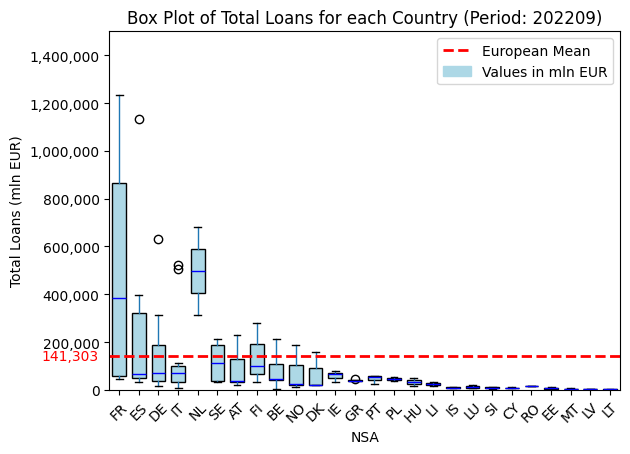

C:\Users\User\AppData\Local\Temp\ipykernel_10468\1714505351.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_sum['NSA'], ordered=True)


<Figure size 2000x1000 with 0 Axes>

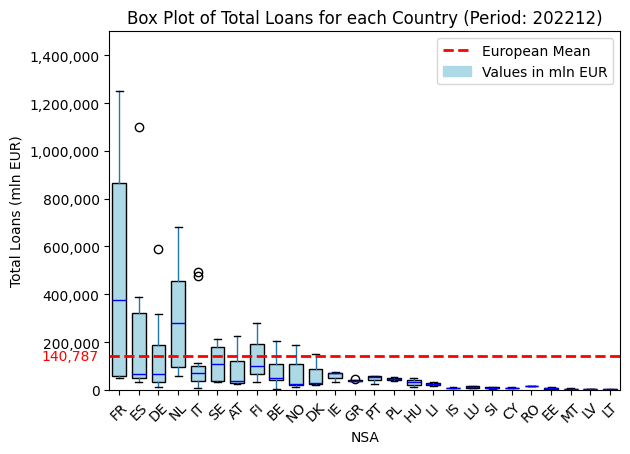

C:\Users\User\AppData\Local\Temp\ipykernel_10468\1714505351.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_sum['NSA'], ordered=True)


<Figure size 2000x1000 with 0 Axes>

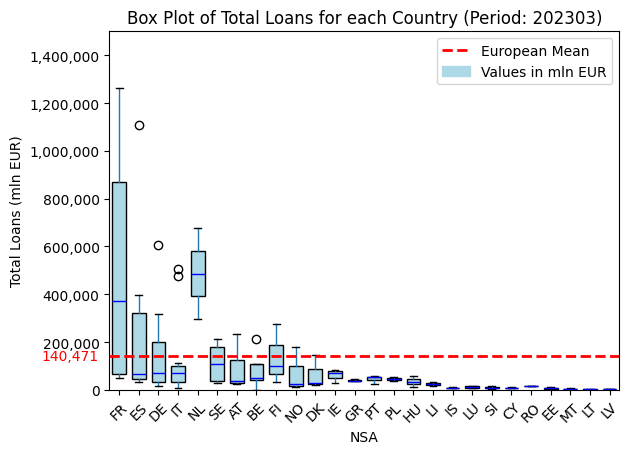

C:\Users\User\AppData\Local\Temp\ipykernel_10468\1714505351.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_sum['NSA'], ordered=True)


<Figure size 2000x1000 with 0 Axes>

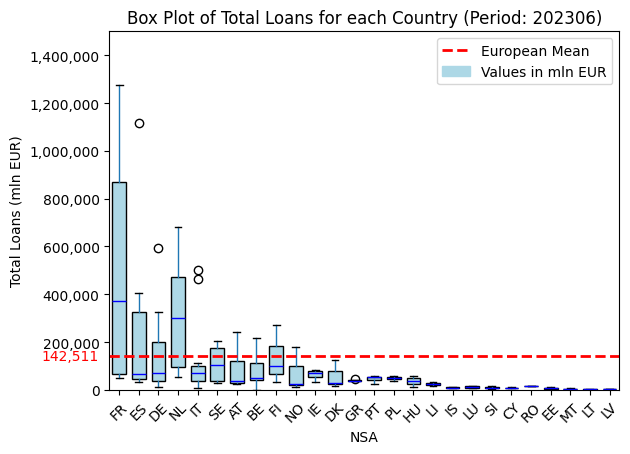

In [17]:
def plot_boxplot(df, period):
    # Filter out 'OT' and rows where Total_Loans is 0
    df_filtered = df[(df['NSA'] != 'OT') & (df['Total_Loans'] != 0)]

    # Group by 'NSA' and calculate the sum of 'Total_Loans'
    grouped_sum = df_filtered.groupby('NSA')['Total_Loans'].sum().reset_index()
    grouped_sum = grouped_sum.sort_values(by='Total_Loans', ascending=False) #sort countries by sum of loans

    # Reorder 'df_filtered' based on the sorted order of 'NSA' in 'grouped_sum'
    df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_sum['NSA'], ordered=True)
    df_filtered = df_filtered.sort_values('NSA')

    # Calculate the European Mean for 'Total_Loans'
    european_mean = df_filtered['Total_Loans'].mean()

    # Create a box plot for Total_Loans grouped by NSA
    plt.figure(figsize=(20, 10))
    ax = df_filtered.boxplot(column='Total_Loans', by='NSA', grid=False, patch_artist=True, widths=0.7,
                             boxprops=dict(facecolor='lightblue'), medianprops=dict(color='blue'))

    # Set the x-axis labels based on the sorted 'NSA' order
    ax.set_xticklabels(grouped_sum['NSA'], rotation=45)

    # Format the y-axis to display numbers with commas
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

    # Add the European Mean line
    european_mean_line = plt.axhline(y=european_mean, color='red', linestyle='--', linewidth=2, label='European Mean')

    # Annotate the European Mean on the y-axis
    ax.text(-0.05, european_mean, f'{int(european_mean):,}', color='red', fontsize=10, ha='right', va='center')

    # Title and labels
    plt.title(f'Box Plot of Total Loans for each Country (Period: {period})')
    plt.suptitle('')  # Remove the default 'Boxplot grouped by NSA' title
    plt.xlabel('NSA')
    plt.ylabel('Total Loans (mln EUR)')

    # Create a custom legend entry for the box plot
    values_patch = mpatches.Patch(color='lightblue', label='Values in mln EUR')

    # Add a legend to the top right corner
    ax.legend([european_mean_line, values_patch], ['European Mean', 'Values in mln EUR'], loc='upper right', fontsize=10)

    # Set y-axis limits to clearly show the differences
    plt.ylim(0, 1500000)

    plt.tight_layout()
    plt.savefig(f'box_plot_total_loans_{period}.png', dpi=300, bbox_inches='tight')

    plt.show()

# Call the function for each DataFrame
plot_boxplot(df_202209, 202209)
plot_boxplot(df_202212, 202212)
plot_boxplot(df_202303, 202303)
plot_boxplot(df_202306, 202306)

C:\Users\User\AppData\Local\Temp\ipykernel_24812\2416054755.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_202209_filtered['NSA'] = pd.Categorical(df_202209_filtered['NSA'], categories=grouped_sum['NSA'], ordered=True)


<Figure size 2000x1000 with 0 Axes>

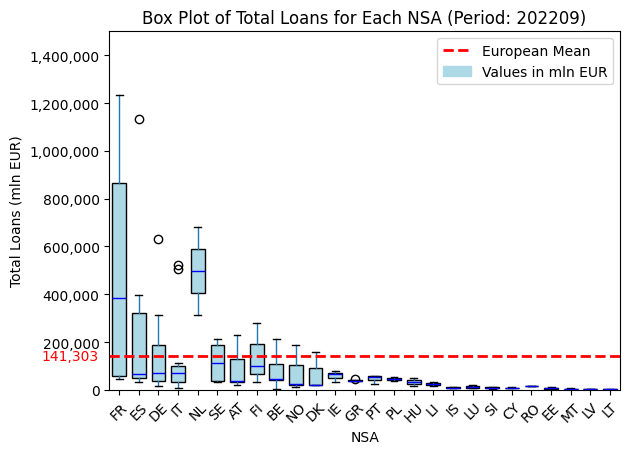

In [13]:
# Filter out 'OT' and drop it from categories
df_202209_filtered = df_202209[(df_202209['NSA'] != 'OT') & (df_202209['Total_Loans'] != 0)]

# Group by 'NSA' and calculate the sum of 'Total_Loans'
grouped_sum = df_202209_filtered.groupby('NSA')['Total_Loans'].sum().reset_index()
grouped_sum = grouped_sum.sort_values(by='Total_Loans', ascending=False)

# Reorder 'df_202209_filtered' based on the sorted order of 'NSA' in 'grouped_sum'
df_202209_filtered['NSA'] = pd.Categorical(df_202209_filtered['NSA'], categories=grouped_sum['NSA'], ordered=True)
df_202209_filtered = df_202209_filtered.sort_values('NSA')

# Calculate the European Mean for 'Total_Loans'
european_mean = df_202209_filtered['Total_Loans'].mean()

# Create a box plot for Total_Loans grouped by NSA
plt.figure(figsize=(20, 10))
ax = df_202209_filtered.boxplot(column='Total_Loans', by='NSA', grid=False, patch_artist=True, widths=0.7,
                                boxprops=dict(facecolor='lightblue'), medianprops=dict(color='blue'))

# Set the x-axis labels based on the sorted 'NSA' order
ax.set_xticklabels(grouped_sum['NSA'], rotation=45)

# Format the y-axis to display numbers with commas
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add the European Mean line
european_mean_line = plt.axhline(y=european_mean, color='red', linestyle='--', linewidth=2, label='European Mean')

# Annotate the European Mean on the y-axis
ax.text(-0.05, european_mean, f'{int(european_mean):,}', color='red', fontsize=10, ha='right', va='center')

# Title and labels
plt.title('Box Plot of Total Loans for Each NSA (Period: 202209)')
plt.suptitle('')  # Remove the default 'Boxplot grouped by NSA' title
plt.xlabel('NSA')
plt.ylabel('Total Loans (mln EUR)')

# Create a custom legend entry for the box plot
values_patch = mpatches.Patch(color='lightblue', label='Values in mln EUR')

# Add a legend to the top right corner
ax.legend([european_mean_line, values_patch], ['European Mean', 'Values in mln EUR'], loc='upper right', fontsize=10)

# Set y-axis limits to clearly show the differences
plt.ylim(0, 1500000)

plt.tight_layout()
plt.savefig('box_plot_total_loans_202209.png', dpi=300, bbox_inches='tight')

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_24812\2716661175.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_sum['NSA'], ordered=True)
C:\Users\User\AppData\Local\Temp\ipykernel_24812\2716661175.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_sum['NSA'], ordered=True)
C:\Users\User\AppData\Local\Temp\ipykernel_24812\2716661175.py:14: SettingWithCopyWa

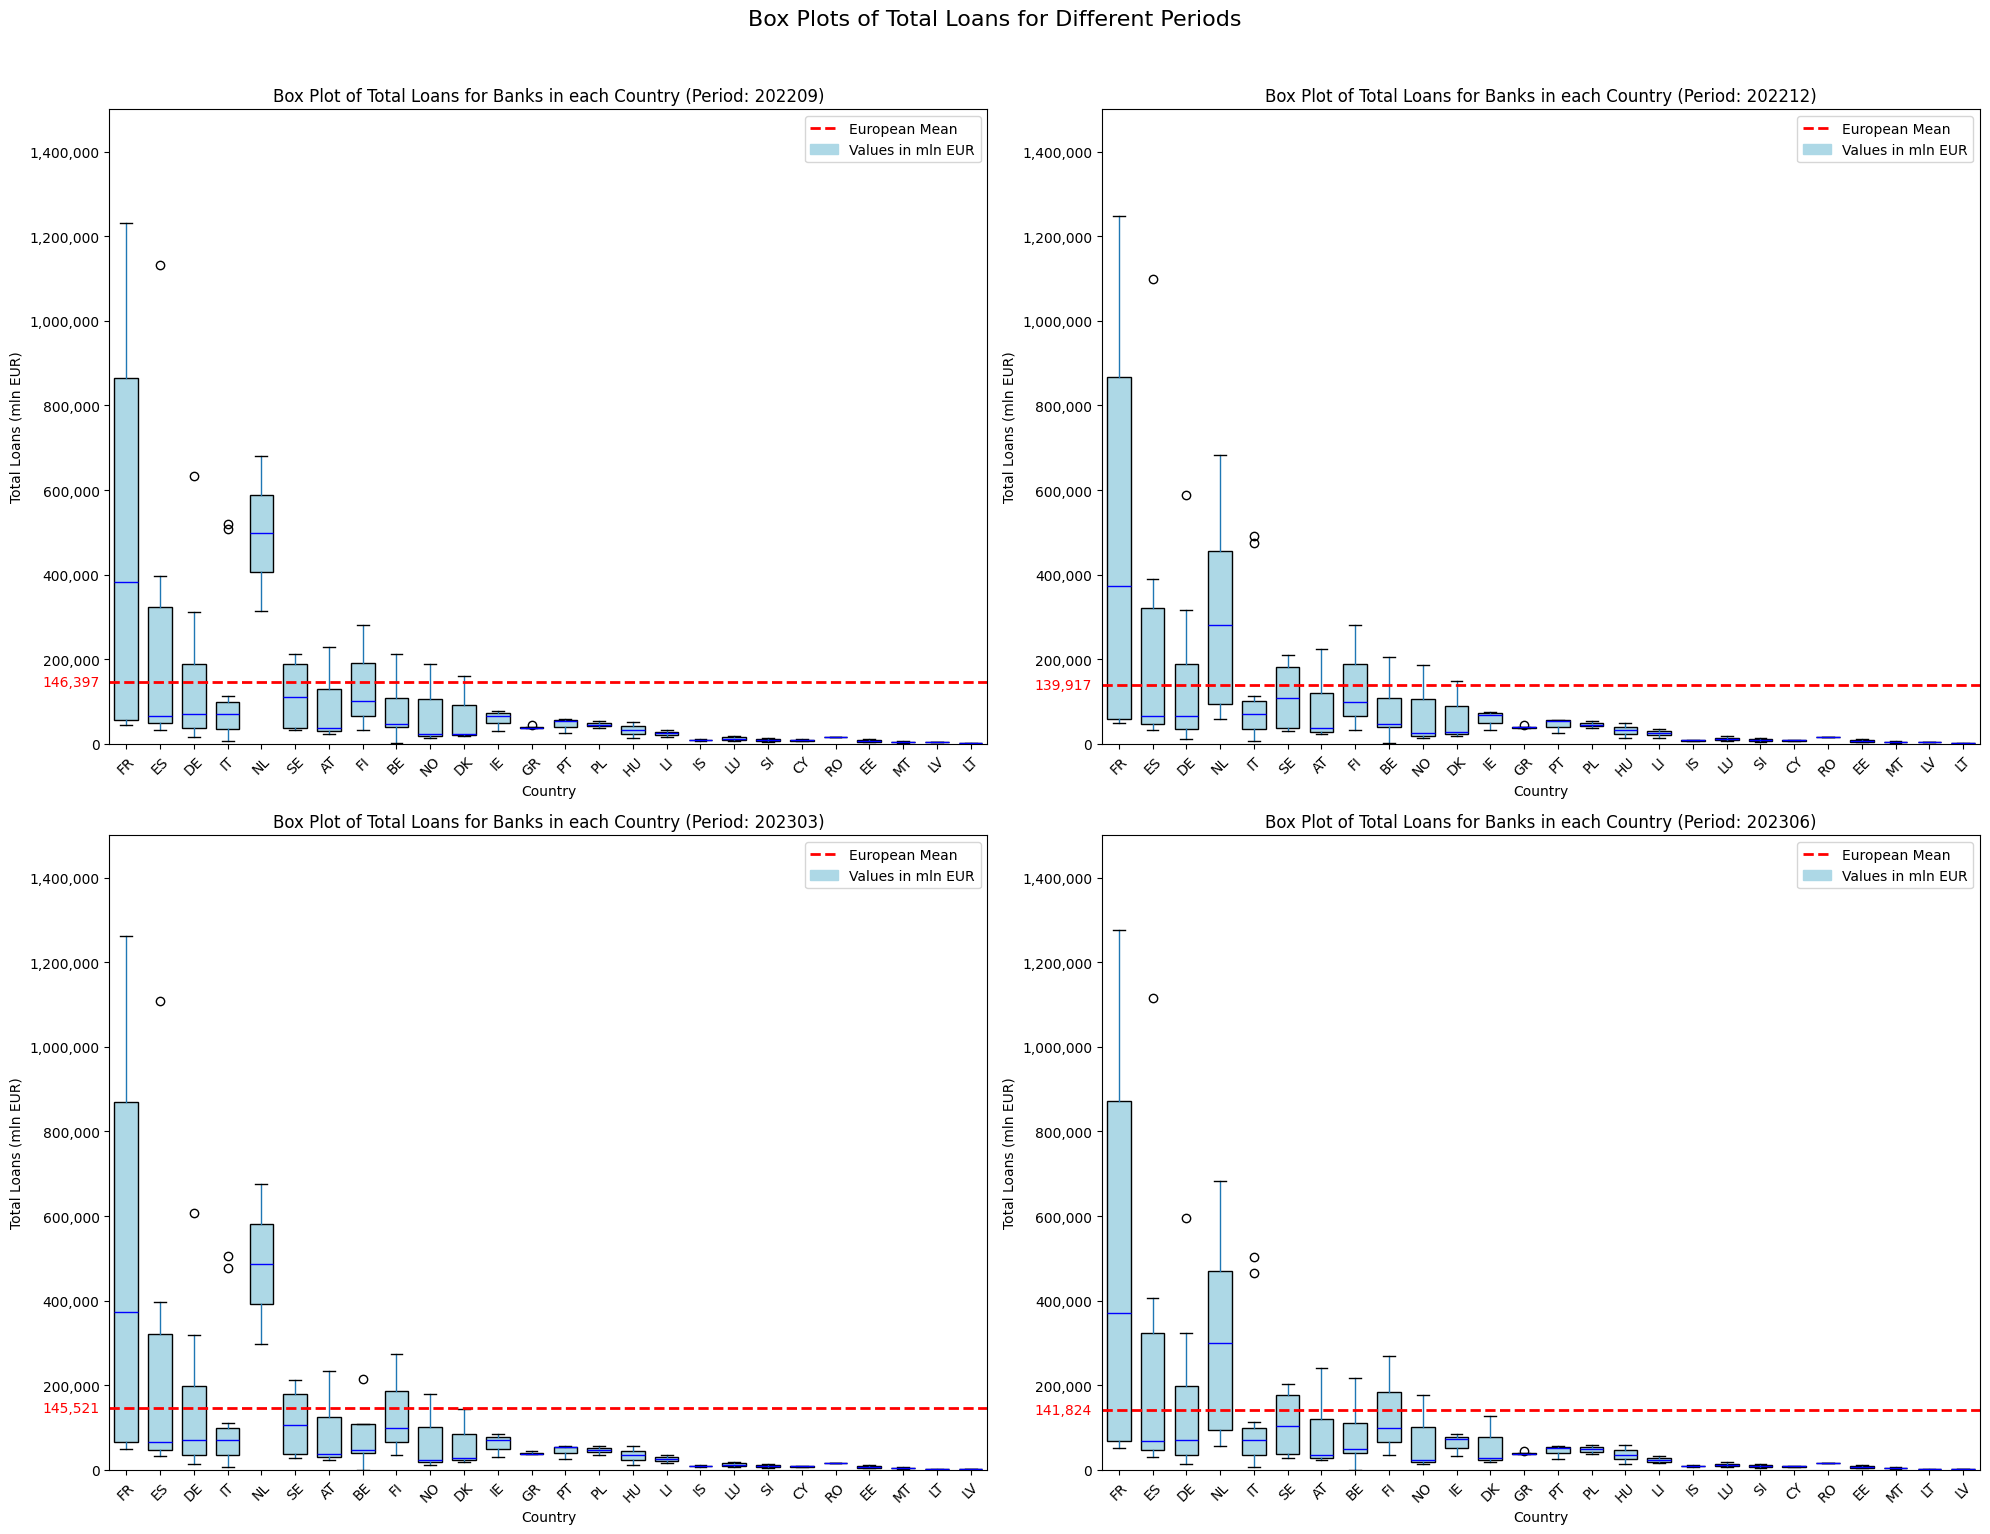

In [15]:
def plot_boxplots(dfs, periods):
    # Create a figure with 2 rows and 2 columns of subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))

    for i, (df, period) in enumerate(zip(dfs, periods)):
        # Filter out 'OT' and rows where Total_Loans is 0
        df_filtered = df[(df['NSA'] != 'OT') & (df['Total_Loans'] != 0)]

        # Group by 'NSA' and calculate the sum of 'Total_Loans'
        grouped_sum = df_filtered.groupby('NSA')['Total_Loans'].sum().reset_index()
        grouped_sum = grouped_sum.sort_values(by='Total_Loans', ascending=False)  # Sort countries by sum of loans

        # Reorder 'df_filtered' based on the sorted order of 'NSA' in 'grouped_sum'
        df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_sum['NSA'], ordered=True)
        df_filtered = df_filtered.sort_values('NSA')

        # Calculate the European Mean for 'Total_Loans'
        european_mean = df['Total_Loans'].mean()

        # Select the subplot based on the index
        ax = axs[i // 2, i % 2]  # Calculate row and column index

        # Create a box plot for Total_Loans grouped by NSA
        df_filtered.boxplot(column='Total_Loans', by='NSA', ax=ax, grid=False, patch_artist=True, widths=0.7,
                            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='blue'))

        # Set the x-axis labels based on the sorted 'NSA' order
        ax.set_xticklabels(grouped_sum['NSA'], rotation=45)

        # Format the y-axis to display numbers with commas
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

        # Add the European Mean line
        european_mean_line = ax.axhline(y=european_mean, color='red', linestyle='--', linewidth=2, label='European Mean')

        # Annotate the European Mean on the y-axis
        ax.text(0.2, european_mean, f'{int(european_mean):,}', color='red', fontsize=10, ha='right', va='center')

        # Title and labels for the current subplot
        ax.set_title(f'Box Plot of Total Loans for Banks in each Country (Period: {period})')
        ax.set_xlabel('Country')
        ax.set_ylabel('Total Loans (mln EUR)')

        # Create a custom legend entry for the box plot
        values_patch = mpatches.Patch(color='lightblue', label='Values in mln EUR')

        # Add a legend to the top right corner
        ax.legend([european_mean_line, values_patch], ['European Mean', 'Values in mln EUR'], loc='upper right', fontsize=10)

        # Set y-axis limits to clearly show the differences
        ax.set_ylim(0, 1500000)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.suptitle('Box Plots of Total Loans for Different Periods', fontsize=16, y=1.02)  # Add a super title
    plt.savefig(f'box_plots_total_loans_normal_scale.png', dpi=300, bbox_inches='tight')

    # Show the plots
    plt.show()

# Call the function for all DataFrames
dfs = [df_202209, df_202212, df_202303, df_202306]
periods = [202209, 202212, 202303, 202306]
plot_boxplots(dfs, periods)


C:\Users\User\AppData\Local\Temp\ipykernel_24812\943473001.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_sum['NSA'], ordered=True)
C:\Users\User\AppData\Local\Temp\ipykernel_24812\943473001.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_sum['NSA'], ordered=True)
C:\Users\User\AppData\Local\Temp\ipykernel_24812\943473001.py:14: SettingWithCopyWarni

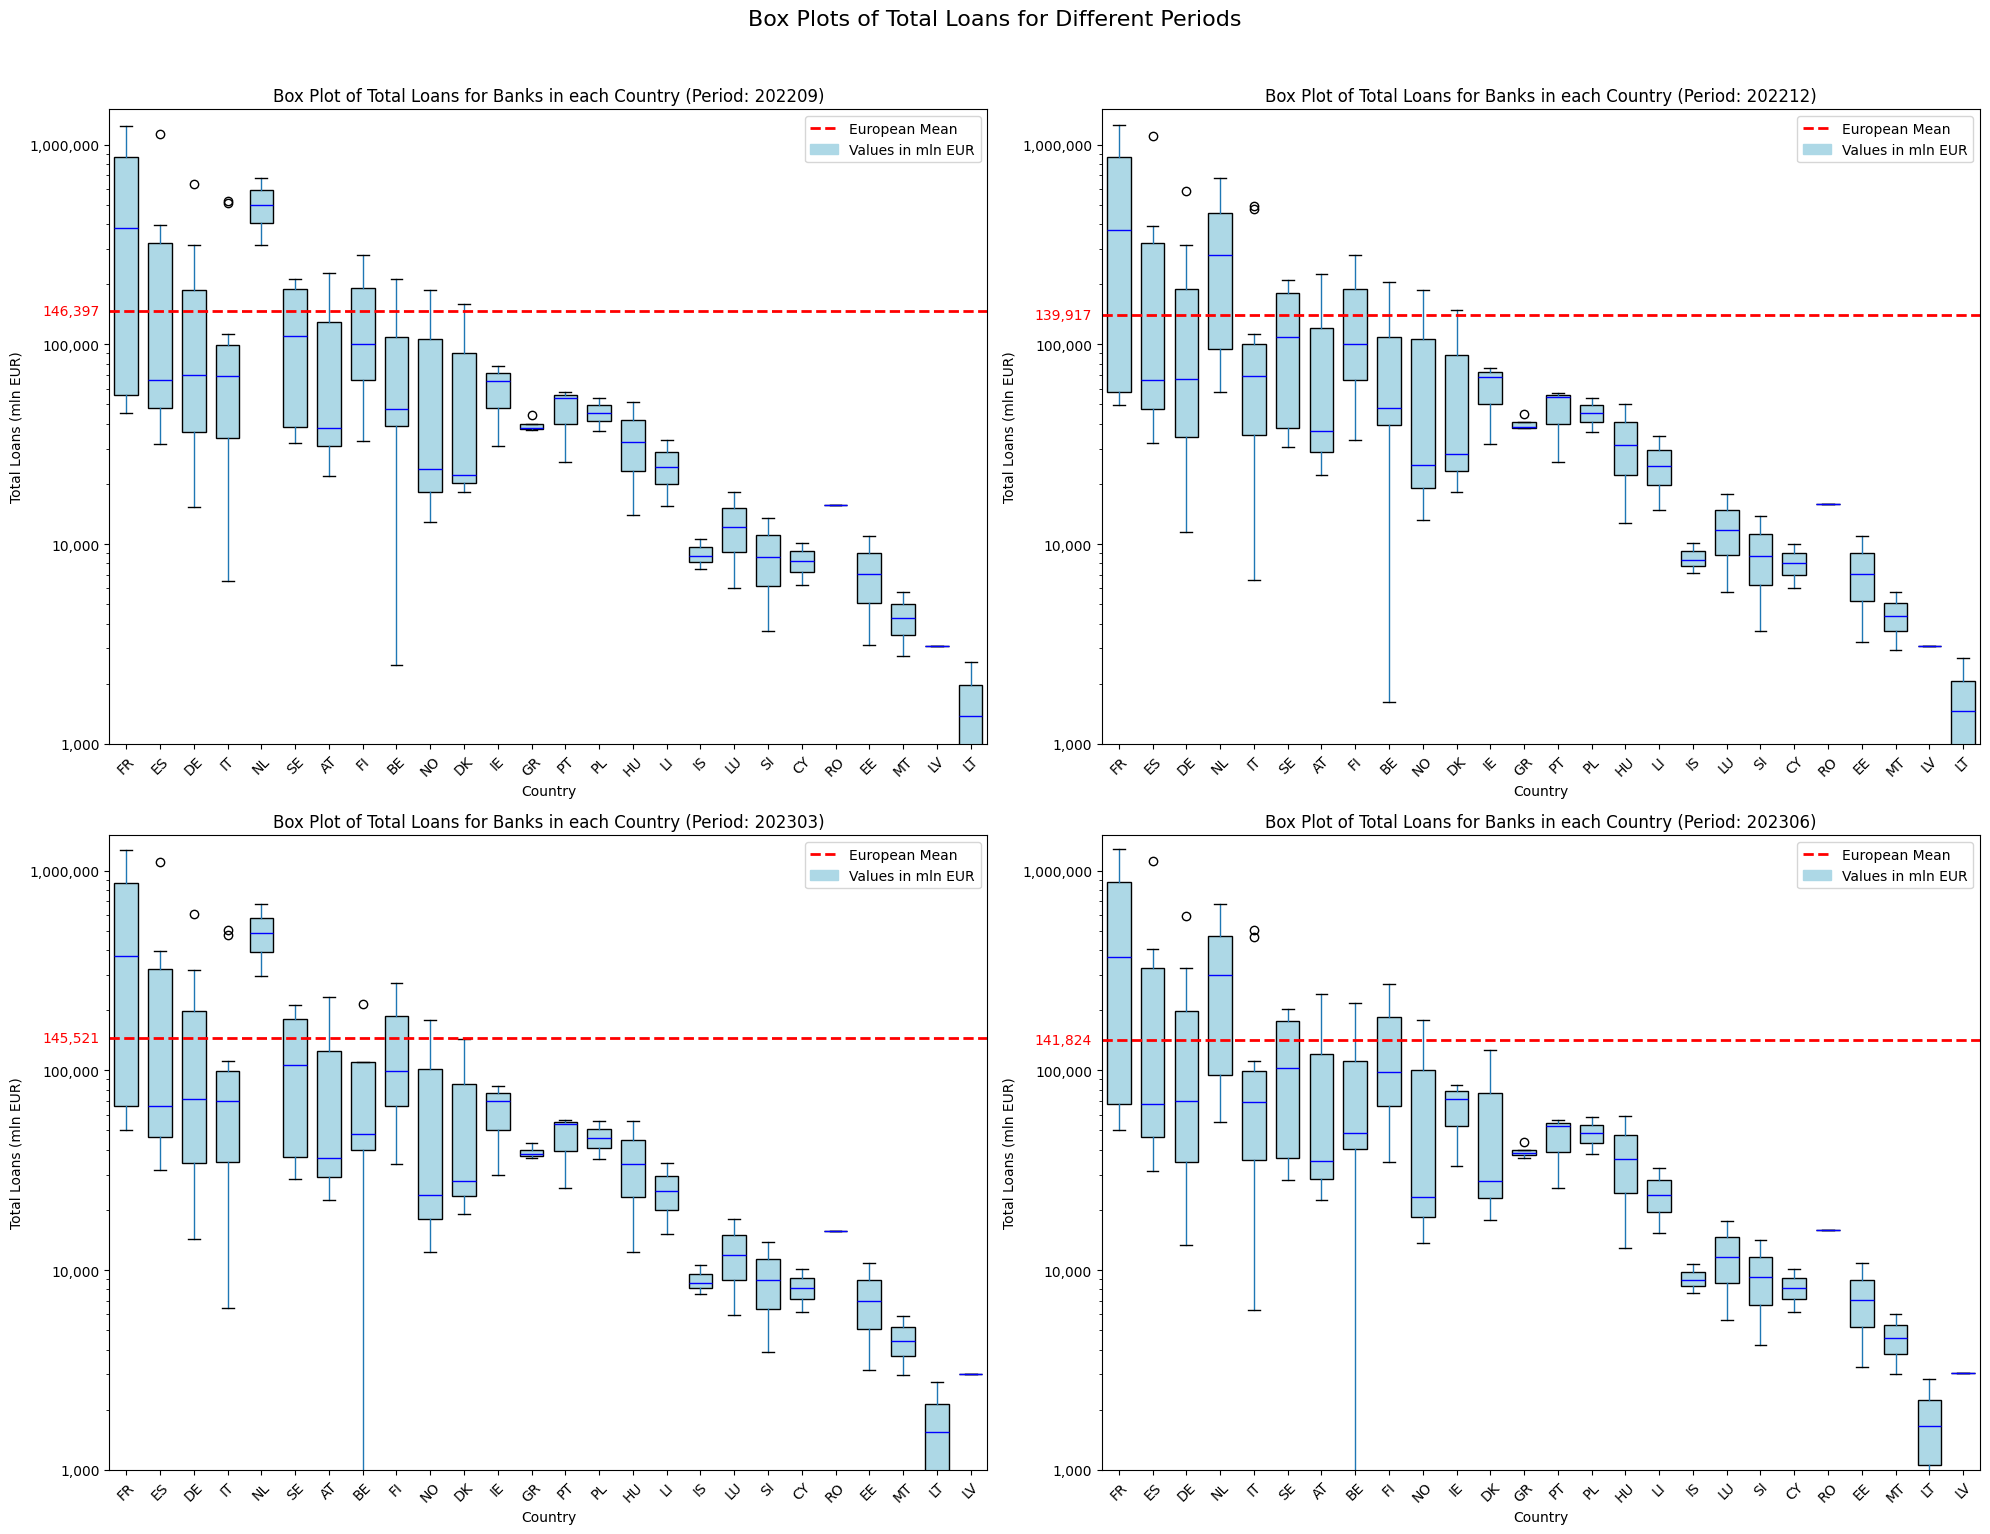

In [16]:
def plot_boxplots(dfs, periods):
    # Create a figure with 2 rows and 2 columns of subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))

    for i, (df, period) in enumerate(zip(dfs, periods)):
        # Filter out 'OT' and rows where Total_Loans is 0
        df_filtered = df[(df['NSA'] != 'OT') & (df['Total_Loans'] != 0)]

        # Group by 'NSA' and calculate the sum of 'Total_Loans'
        grouped_sum = df_filtered.groupby('NSA')['Total_Loans'].sum().reset_index()
        grouped_sum = grouped_sum.sort_values(by='Total_Loans', ascending=False)  # Sort countries by sum of loans

        # Reorder 'df_filtered' based on the sorted order of 'NSA' in 'grouped_sum'
        df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_sum['NSA'], ordered=True)
        df_filtered = df_filtered.sort_values('NSA')

        # Calculate the European Mean for 'Total_Loans'
        european_mean = df['Total_Loans'].mean()

        # Select the subplot based on the index
        ax = axs[i // 2, i % 2]  # Calculate row and column index

        # Create a box plot for Total_Loans grouped by NSA
        df_filtered.boxplot(column='Total_Loans', by='NSA', ax=ax, grid=False, patch_artist=True, widths=0.7,
                            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='blue'))

        # Set the x-axis labels based on the sorted 'NSA' order
        ax.set_xticklabels(grouped_sum['NSA'], rotation=45)

        # Set the y-axis to logarithmic scale
        ax.set_yscale('log')

        # Format the y-axis to display numbers normally (e.g., 1,000 instead of 10^3)
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

        # Add the European Mean line
        european_mean_line = ax.axhline(y=european_mean, color='red', linestyle='--', linewidth=2, label='European Mean')

        # Annotate the European Mean on the y-axis
        ax.text(0.2, european_mean, f'{int(european_mean):,}', color='red', fontsize=10, ha='right', va='center')

        # Title and labels for the current subplot
        ax.set_title(f'Box Plot of Total Loans for Banks in each Country (Period: {period})')
        ax.set_xlabel('Country')
        ax.set_ylabel('Total Loans (mln EUR)')

        # Create a custom legend entry for the box plot
        values_patch = mpatches.Patch(color='lightblue', label='Values in mln EUR')

        # Add a legend to the top right corner
        ax.legend([european_mean_line, values_patch], ['European Mean', 'Values in mln EUR'], loc='upper right', fontsize=10)

        # Optional: Set y-axis limits to improve visibility
        ax.set_ylim(1000, 1500000)  # Adjust the lower limit to a minimum value suitable for log scale

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.suptitle('Box Plots of Total Loans for Different Periods', fontsize=16, y=1.02)  # Add a super title
    plt.savefig('box_plots_total_loans.png', dpi=300, bbox_inches='tight')

    # Show the plots
    plt.show()

# Call the function for all DataFrames
dfs = [df_202209, df_202212, df_202303, df_202306]
periods = [202209, 202212, 202303, 202306]
plot_boxplots(dfs, periods)

### NEW GRAPHS 

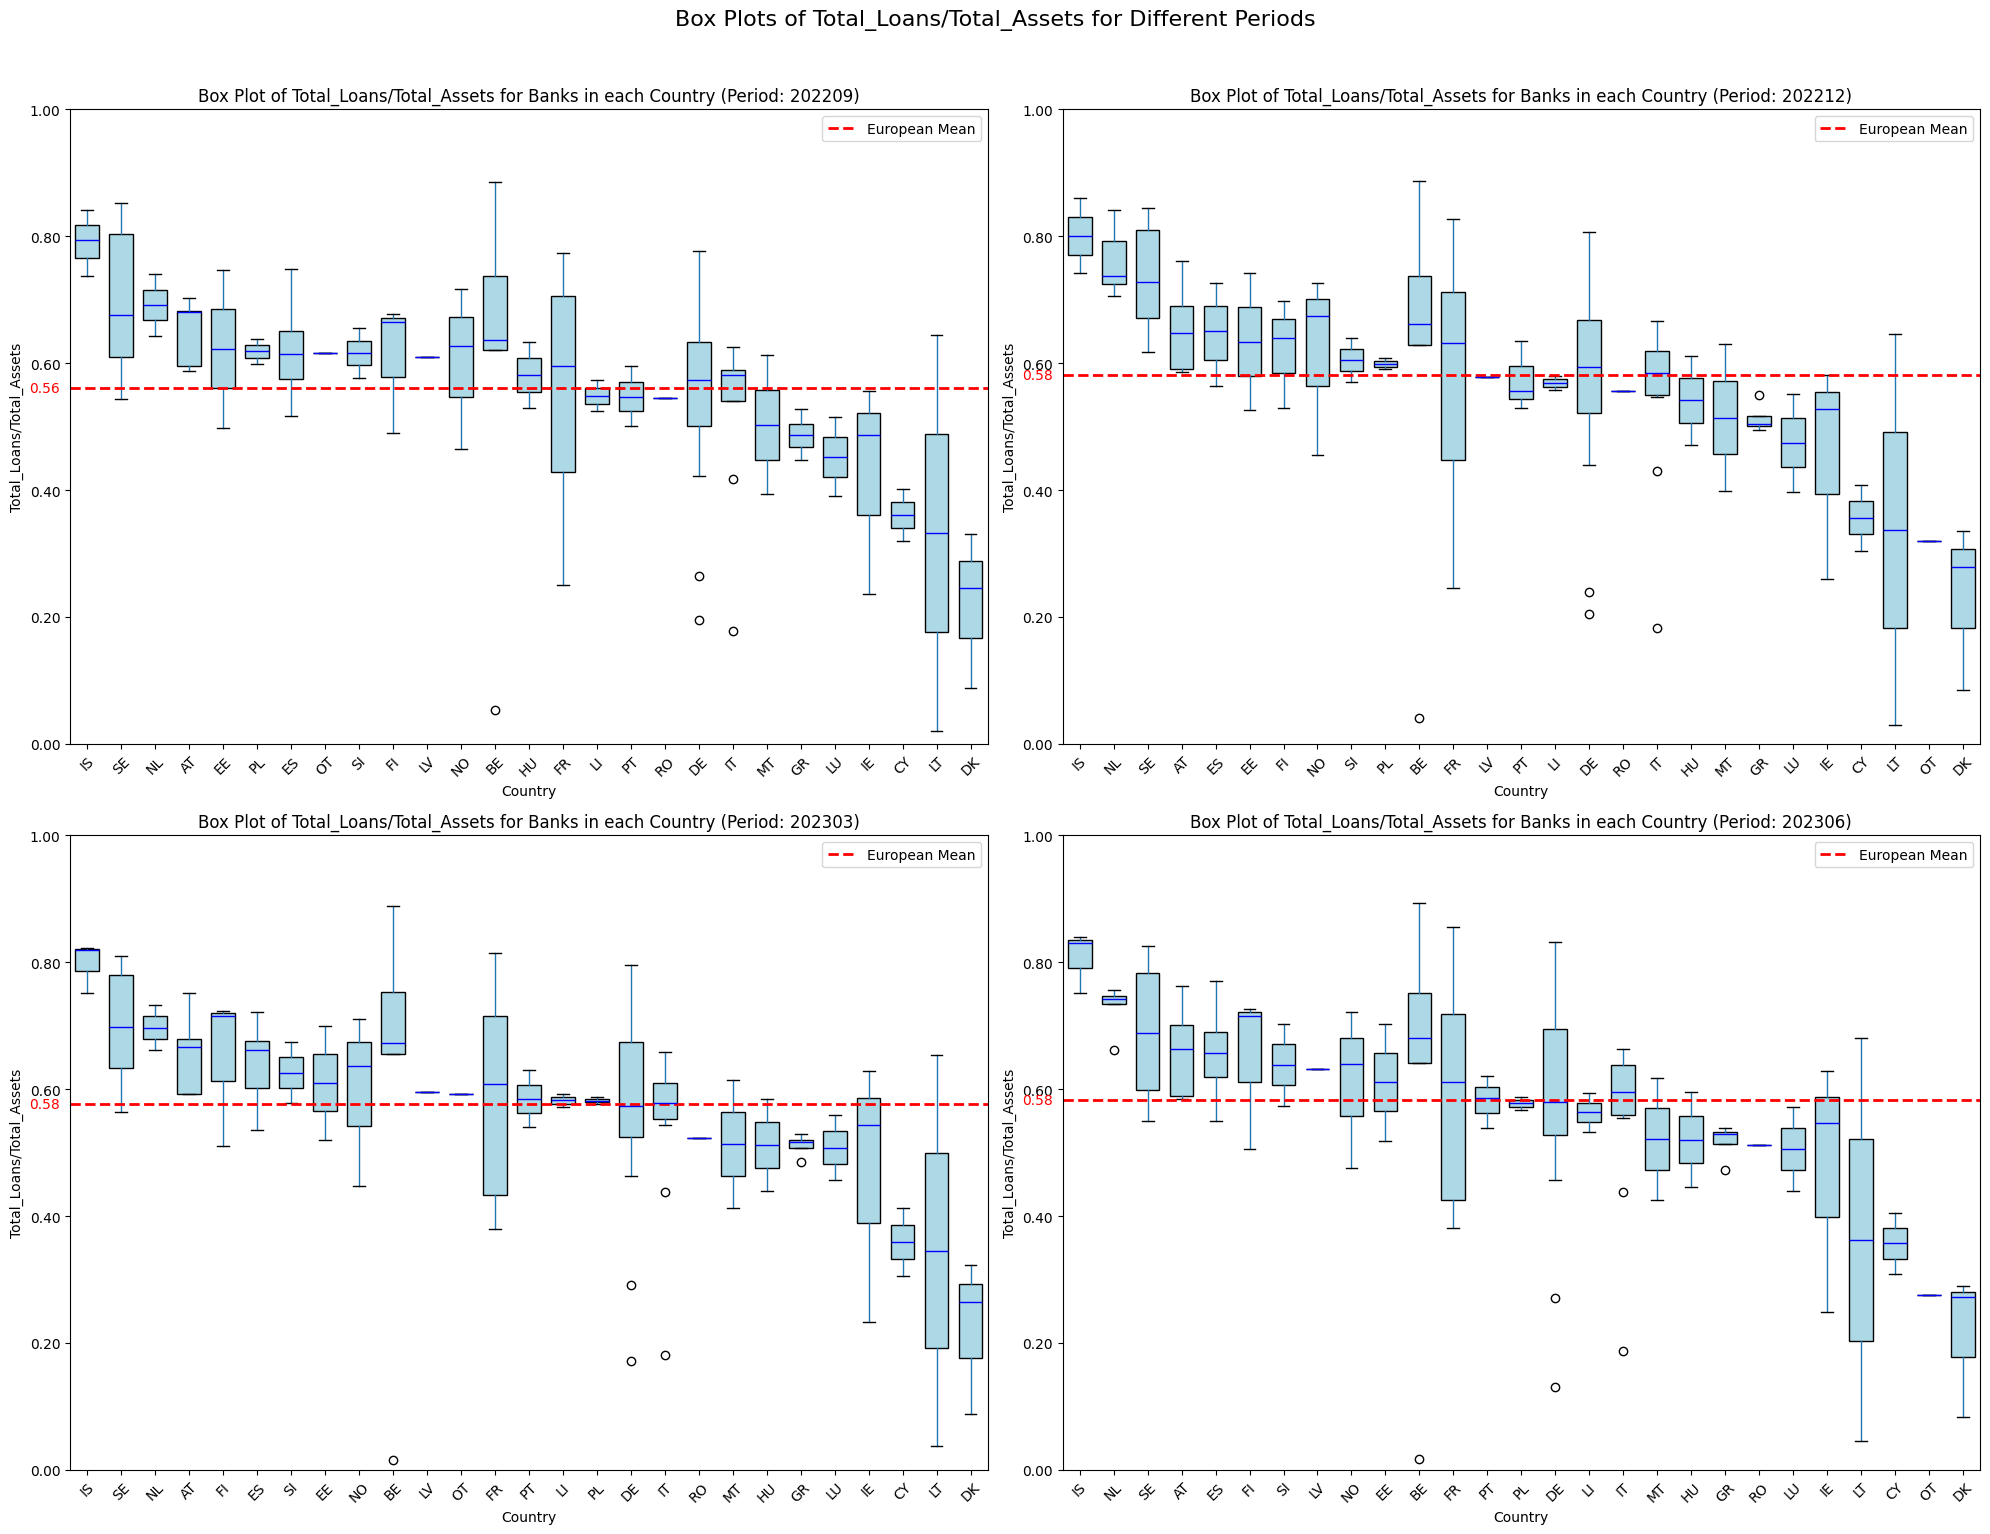

In [17]:
def plot_boxplots(dfs, periods):
    # Create a figure with 2 rows and 2 columns of subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))

    for i, (df, period) in enumerate(zip(dfs, periods)):
        # Filter out 'OT' and rows where Total_Loans is 0
        df_filtered = df[(df['Total_Loans'] != 0)]

        # Group by 'NSA' and calculate the sum of 'Total_Loans'
        grouped_mean = df_filtered.groupby('NSA')['Total_Loans/Total_Assets'].mean().reset_index()
        grouped_mean = grouped_mean.sort_values(by='Total_Loans/Total_Assets', ascending=False)  # Sort countries by sum of loans

        # Reorder 'df_filtered' based on the sorted order of 'NSA' in 'grouped_sum'
        df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_mean['NSA'], ordered=True)
        df_filtered = df_filtered.sort_values('NSA')

        # Calculate the European Mean for 'Total_Loans'
        european_mean = df['Total_Loans/Total_Assets'].mean()
        
        # Select the subplot based on the index
        ax = axs[i // 2, i % 2]  # Calculate row and column index

        # Create a box plot for Total_Loans grouped by NSA
        df_filtered.boxplot(column='Total_Loans/Total_Assets', by='NSA', ax=ax, grid=False, patch_artist=True, widths=0.7,
                            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='blue'))

        # Set the x-axis labels based on the sorted 'NSA' order
        ax.set_xticklabels(grouped_mean['NSA'], rotation=45)

        # Format the y-axis to display numbers normally (e.g., 1,000 instead of 10^3)
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{float(x):.2f}'))

        # Add the European Mean line
        european_mean_line = ax.axhline(y=european_mean, color='red', linestyle='--', linewidth=2, label='European Mean')

        # Annotate the European Mean on the y-axis
        ax.text(0.2, european_mean, f'{float(european_mean):.2f}', color='red', fontsize=10, ha='right', va='center')

        # Title and labels for the current subplot
        ax.set_title(f'Box Plot of Total_Loans/Total_Assets for Banks in each Country (Period: {period})')
        ax.set_xlabel('Country')
        ax.set_ylabel('Total_Loans/Total_Assets')

        # Add a legend to the top right corner
        ax.legend([european_mean_line], ['European Mean'], loc='upper right', fontsize=10)

        # Optional: Set y-axis limits to improve visibility
        ax.set_ylim(0,1)  # Adjust the lower limit to a minimum value suitable for log scale

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.suptitle('Box Plots of Total_Loans/Total_Assets for Different Periods', fontsize=16, y=1.02)  # Add a super title
    plt.savefig('box_plots_Total_Loans_to_Total_Assets.png', dpi=300, bbox_inches='tight')

    # Show the plots
    plt.show()

# Call the function for all DataFrames
dfs = [df_202209, df_202212, df_202303, df_202306]
periods = [202209, 202212, 202303, 202306]
plot_boxplots(dfs, periods)

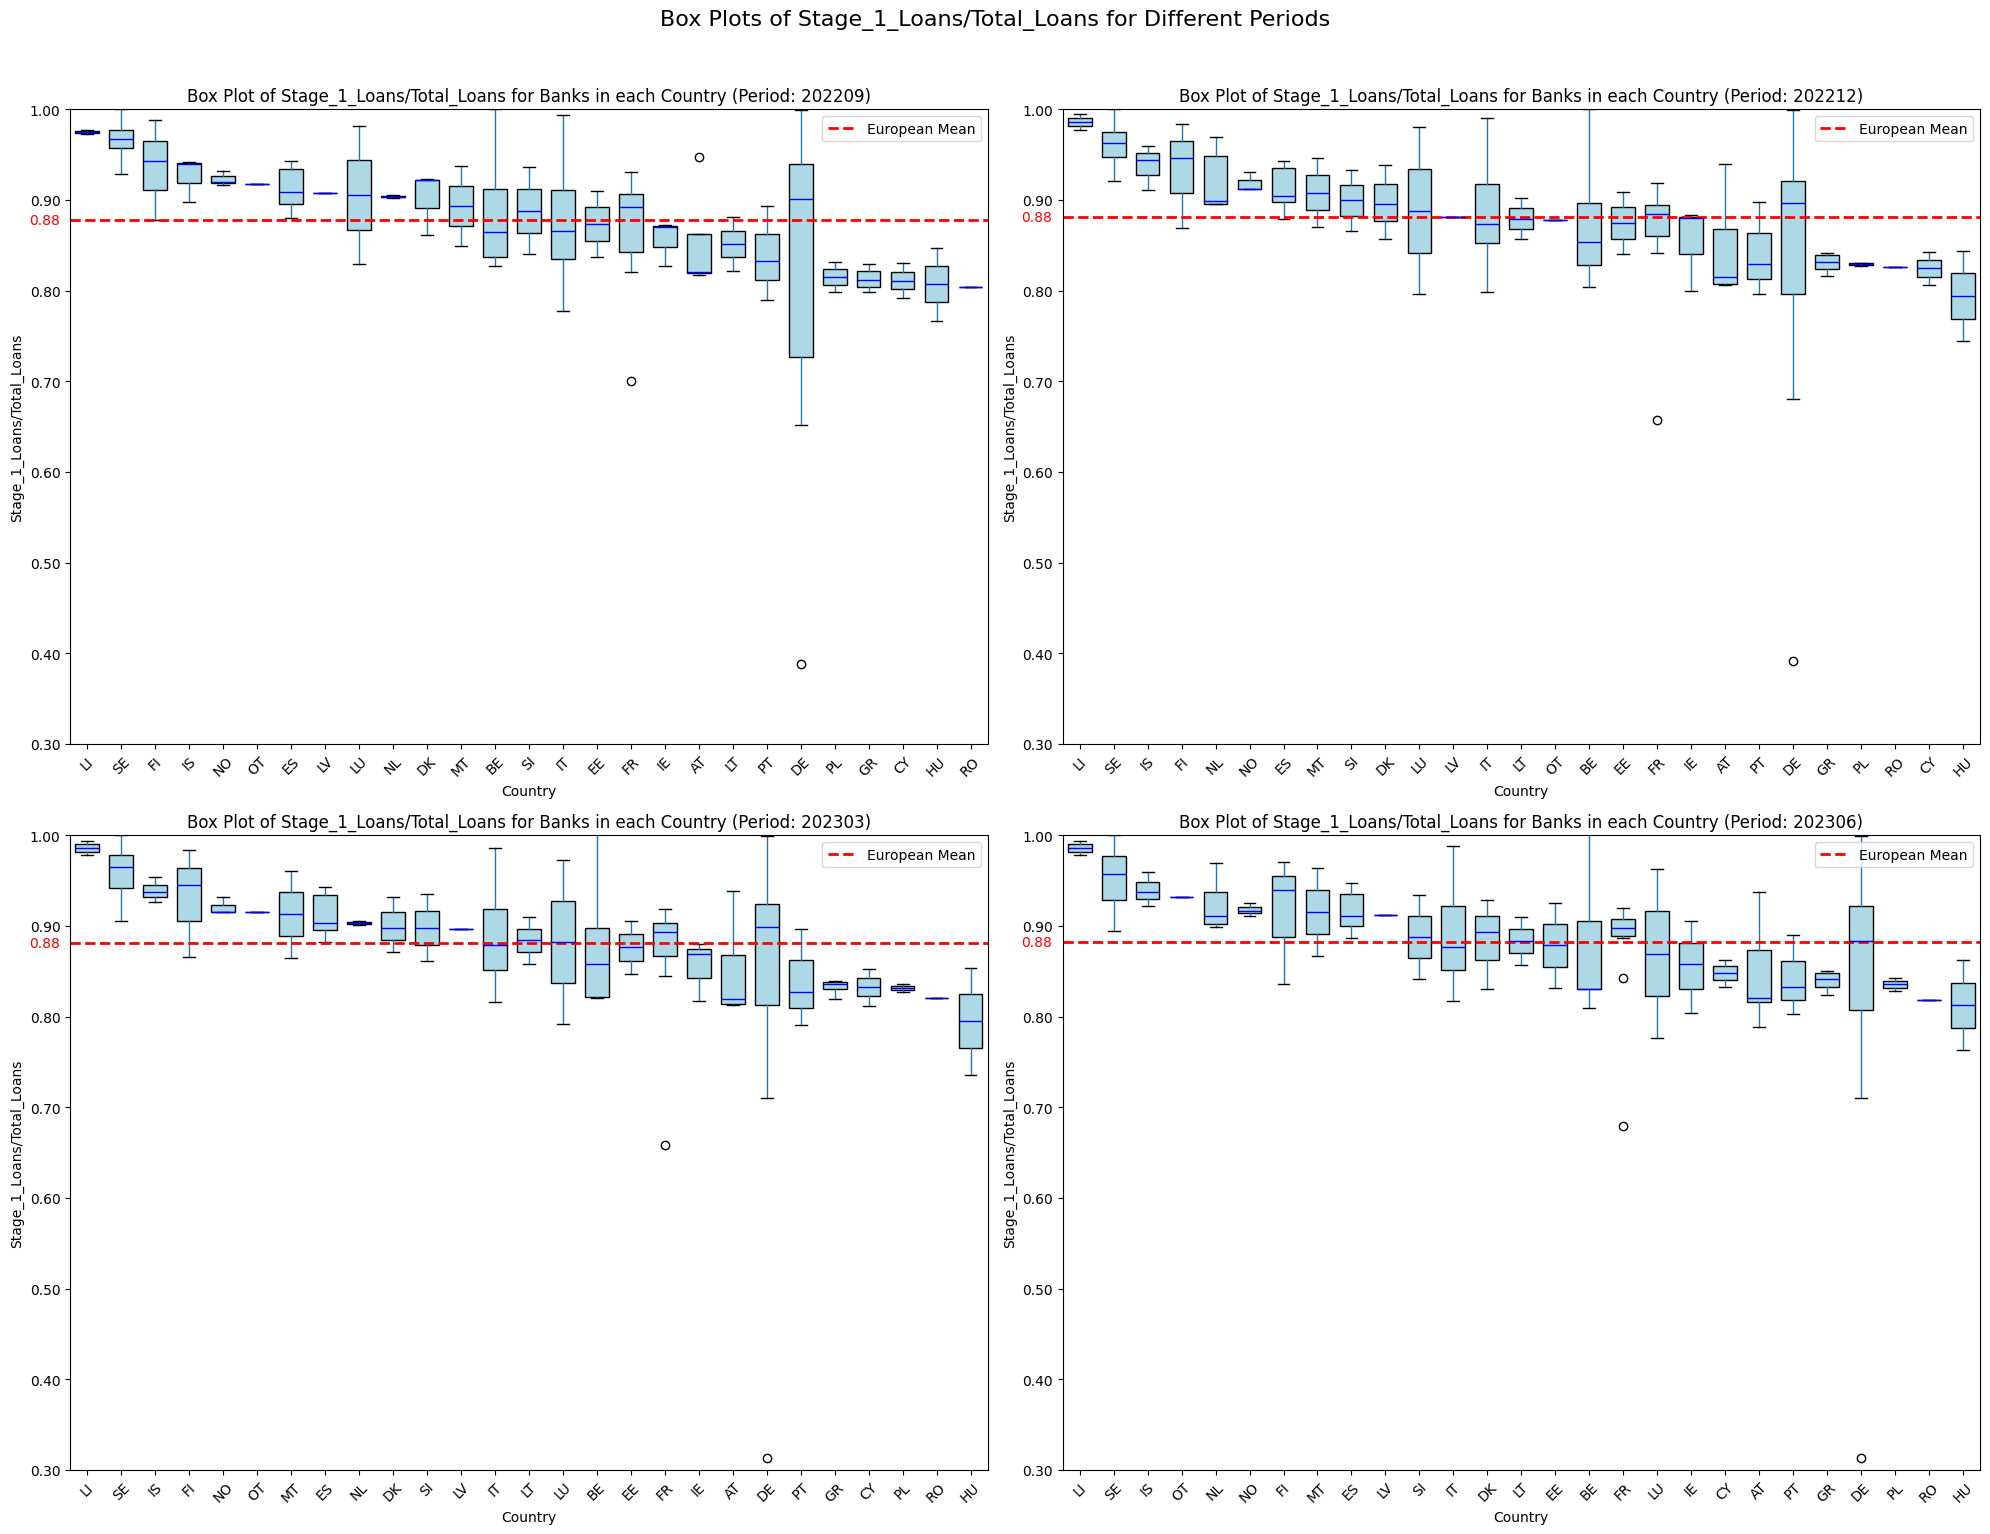

In [18]:
def plot_boxplots(dfs, periods):
    # Create a figure with 2 rows and 2 columns of subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))

    for i, (df, period) in enumerate(zip(dfs, periods)):
        # Filter out 'OT' and rows where Total_Loans is 0
        df_filtered = df[(df['Total_Loans'] != 0)]

        # Group by 'NSA' and calculate the mean of 'Stage_1_Loans/Total_Loans'
        grouped_mean = df_filtered.groupby('NSA')['Stage_1_Loans/Total_Loans'].mean().reset_index()
        grouped_mean = grouped_mean.sort_values(by='Stage_1_Loans/Total_Loans', ascending=False)  # Sort countries by mean

        # Reorder 'df_filtered' based on the sorted order of 'NSA' in 'grouped_mean'
        df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_mean['NSA'], ordered=True)
        df_filtered = df_filtered.sort_values('NSA')

        # Calculate the European Mean for 'Stage_1_Loans/Total_Loans'
        european_mean = df['Stage_1_Loans/Total_Loans'].mean()
        
        # Select the subplot based on the index
        ax = axs[i // 2, i % 2]  # Calculate row and column index

        # Create a box plot for Stage_1_Loans/Total_Loans grouped by NSA
        df_filtered.boxplot(column='Stage_1_Loans/Total_Loans', by='NSA', ax=ax, grid=False, patch_artist=True, widths=0.7,
                            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='blue'))

        # Set the x-axis labels based on the sorted 'NSA' order
        ax.set_xticklabels(grouped_mean['NSA'], rotation=45)

        # Format the y-axis to display numbers normally (e.g., 0.50)
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{float(x):.2f}'))

        # Add the European Mean line
        european_mean_line = ax.axhline(y=european_mean, color='red', linestyle='--', linewidth=2, label='European Mean')

        # Annotate the European Mean on the y-axis
        ax.text(0.2, european_mean, f'{float(european_mean):.2f}', color='red', fontsize=10, ha='right', va='center')

        # Title and labels for the current subplot
        ax.set_title(f'Box Plot of Stage_1_Loans/Total_Loans for Banks in each Country (Period: {period})')
        ax.set_xlabel('Country')
        ax.set_ylabel('Stage_1_Loans/Total_Loans')

        # Add a legend to the top right corner
        ax.legend([european_mean_line], ['European Mean'], loc='upper right', fontsize=10)

        # Optional: Set y-axis limits to improve visibility
        ax.set_ylim(0.3, 1)  # Adjust the lower limit to a minimum value suitable for this scale

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.suptitle('Box Plots of Stage_1_Loans/Total_Loans for Different Periods', fontsize=16, y=1.02)  # Add a super title
    plt.savefig('box_plots_Stage_1_Loans_to_Total_Loans.png', dpi=300, bbox_inches='tight')

    # Show the plots
    plt.show()

# Call the function for all DataFrames
dfs = [df_202209, df_202212, df_202303, df_202306]
periods = [202209, 202212, 202303, 202306]
plot_boxplots(dfs, periods)


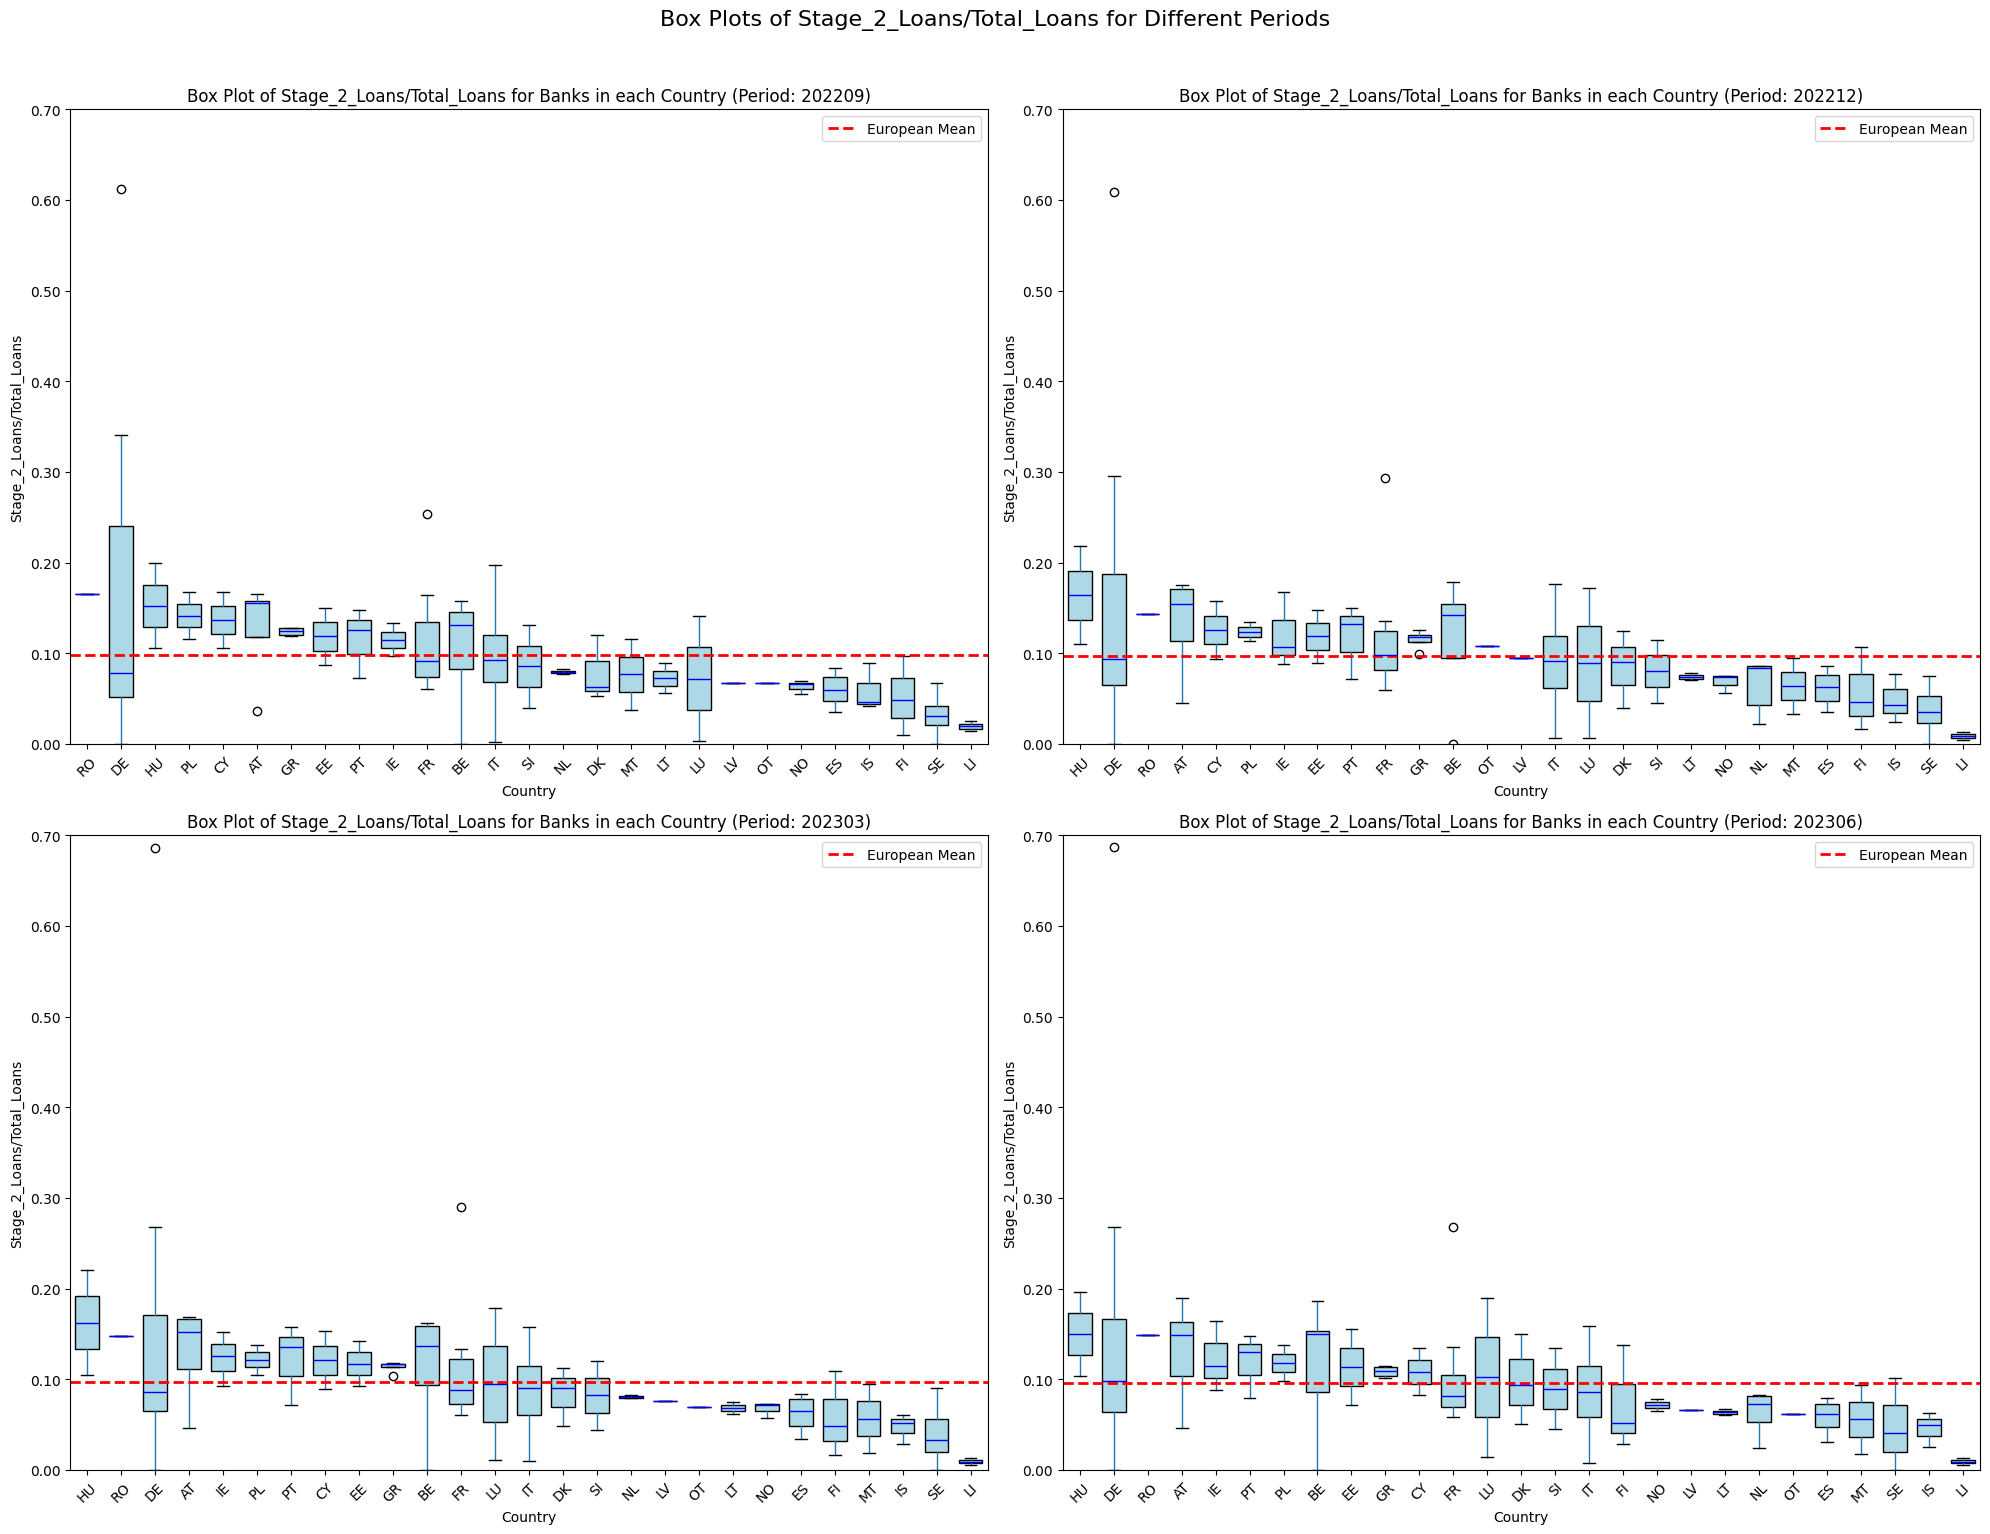

In [19]:
def plot_boxplots(dfs, periods):
    # Create a figure with 2 rows and 2 columns of subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))

    for i, (df, period) in enumerate(zip(dfs, periods)):
        # Filter out 'OT' and rows where Total_Loans is 0
        df_filtered = df[(df['Total_Loans'] != 0)]

        # Group by 'NSA' and calculate the mean of 'Stage_2_Loans/Total_Loans'
        grouped_mean = df_filtered.groupby('NSA')['Stage_2_Loans/Total_Loans'].mean().reset_index()
        grouped_mean = grouped_mean.sort_values(by='Stage_2_Loans/Total_Loans', ascending=False)  # Sort countries by mean

        # Reorder 'df_filtered' based on the sorted order of 'NSA' in 'grouped_mean'
        df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_mean['NSA'], ordered=True)
        df_filtered = df_filtered.sort_values('NSA')

        # Calculate the European Mean for 'Stage_2_Loans/Total_Loans'
        european_mean = df['Stage_2_Loans/Total_Loans'].mean()
        
        # Select the subplot based on the index
        ax = axs[i // 2, i % 2]  # Calculate row and column index

        # Create a box plot for Stage_2_Loans/Total_Loans grouped by NSA
        df_filtered.boxplot(column='Stage_2_Loans/Total_Loans', by='NSA', ax=ax, grid=False, patch_artist=True, widths=0.7,
                            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='blue'))

        # Set the x-axis labels based on the sorted 'NSA' order
        ax.set_xticklabels(grouped_mean['NSA'], rotation=45)

        # Format the y-axis to display numbers normally (e.g., 0.50)
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{float(x):.2f}'))

        # Add the European Mean line
        european_mean_line = ax.axhline(y=european_mean, color='red', linestyle='--', linewidth=2, label='European Mean')

        # Title and labels for the current subplot
        ax.set_title(f'Box Plot of Stage_2_Loans/Total_Loans for Banks in each Country (Period: {period})')
        ax.set_xlabel('Country')
        ax.set_ylabel('Stage_2_Loans/Total_Loans')

        # Add a legend to the top right corner
        ax.legend([european_mean_line], ['European Mean'], loc='upper right', fontsize=10)

        # Optional: Set y-axis limits to improve visibility
        ax.set_ylim(0, 0.7)  # Adjust the lower limit to a minimum value suitable for this scale

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.suptitle('Box Plots of Stage_2_Loans/Total_Loans for Different Periods', fontsize=16, y=1.02)  # Add a super title
    plt.savefig('box_plots_Stage_2_Loans_to_Total_Loans.png', dpi=300, bbox_inches='tight')

    # Show the plots
    plt.show()

# Call the function for all DataFrames
dfs = [df_202209, df_202212, df_202303, df_202306]
periods = [202209, 202212, 202303, 202306]
plot_boxplots(dfs, periods)


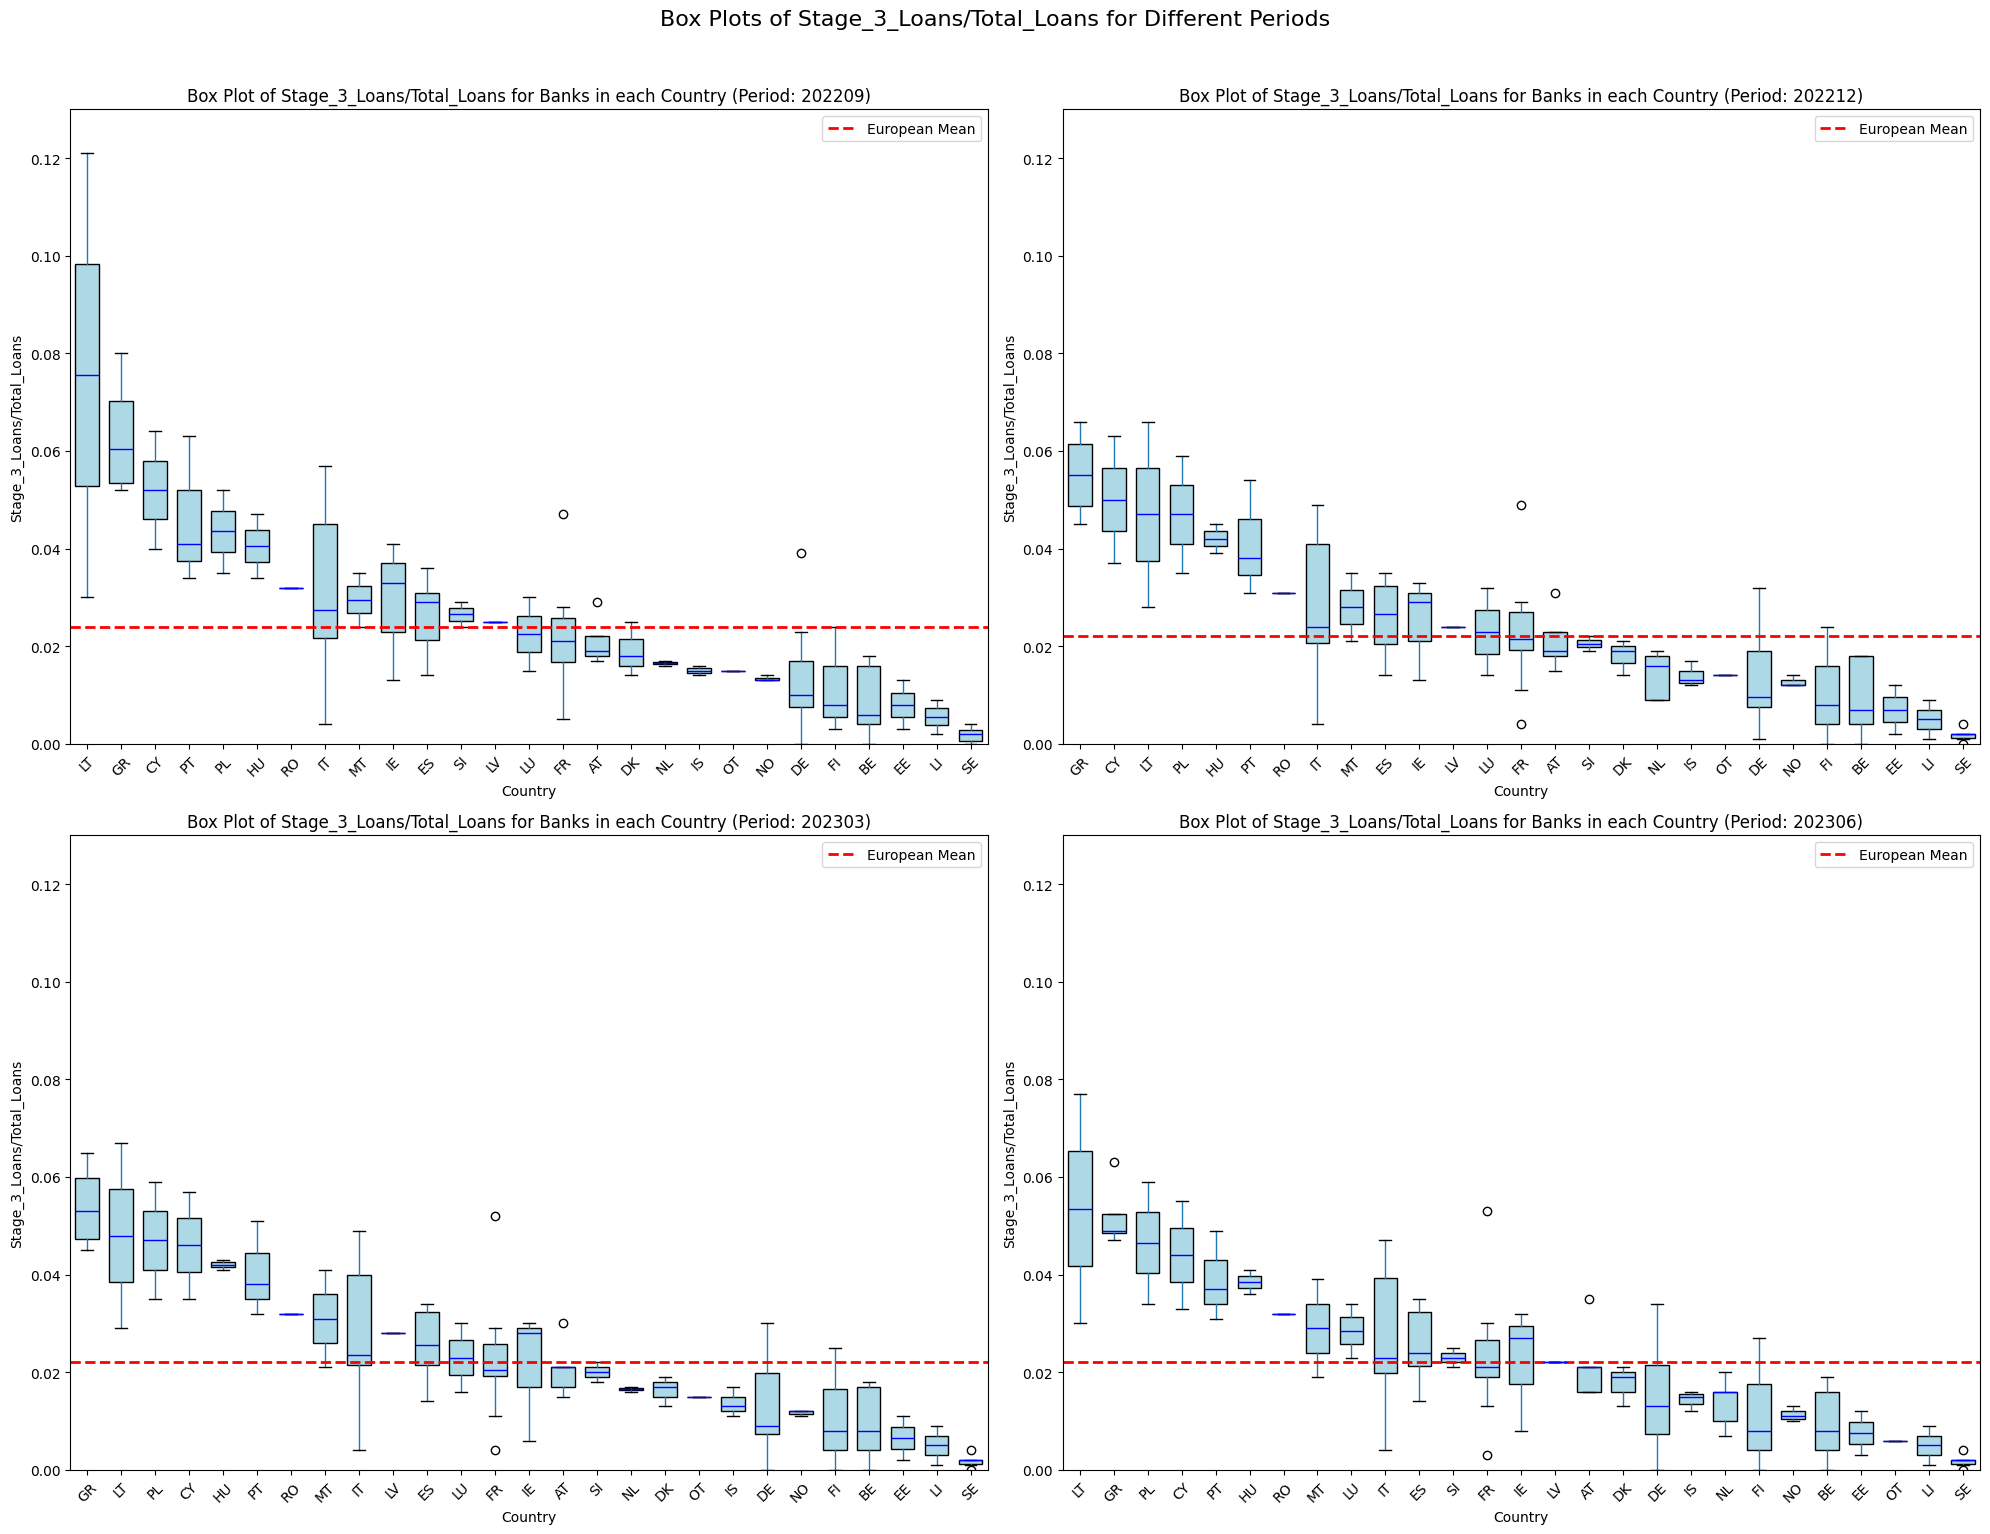

In [20]:
def plot_boxplots(dfs, periods):
    # Create a figure with 2 rows and 2 columns of subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))

    for i, (df, period) in enumerate(zip(dfs, periods)):
        # Filter out 'OT' and rows where Total_Loans is 0
        df_filtered = df[(df['Total_Loans'] != 0)]

        # Group by 'NSA' and calculate the mean of 'Stage_3_Loans/Total_Loans'
        grouped_mean = df_filtered.groupby('NSA')['Stage_3_Loans/Total_Loans'].mean().reset_index()
        grouped_mean = grouped_mean.sort_values(by='Stage_3_Loans/Total_Loans', ascending=False)  # Sort countries by mean

        # Reorder 'df_filtered' based on the sorted order of 'NSA' in 'grouped_mean'
        df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_mean['NSA'], ordered=True)
        df_filtered = df_filtered.sort_values('NSA')

        # Calculate the European Mean for 'Stage_3_Loans/Total_Loans'
        european_mean = df['Stage_3_Loans/Total_Loans'].mean()
        
        # Select the subplot based on the index
        ax = axs[i // 2, i % 2]  # Calculate row and column index

        # Create a box plot for Stage_3_Loans/Total_Loans grouped by NSA
        df_filtered.boxplot(column='Stage_3_Loans/Total_Loans', by='NSA', ax=ax, grid=False, patch_artist=True, widths=0.7,
                            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='blue'))

        # Set the x-axis labels based on the sorted 'NSA' order
        ax.set_xticklabels(grouped_mean['NSA'], rotation=45)

        # Format the y-axis to display numbers normally (e.g., 0.50)
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{float(x):.2f}'))

        # Add the European Mean line
        european_mean_line = ax.axhline(y=european_mean, color='red', linestyle='--', linewidth=2, label='European Mean')

        # Title and labels for the current subplot
        ax.set_title(f'Box Plot of Stage_3_Loans/Total_Loans for Banks in each Country (Period: {period})')
        ax.set_xlabel('Country')
        ax.set_ylabel('Stage_3_Loans/Total_Loans')

        # Add a legend to the top right corner
        ax.legend([european_mean_line], ['European Mean'], loc='upper right', fontsize=10)

        # Optional: Set y-axis limits to improve visibility
        ax.set_ylim(0, 0.13)  # Adjust the lower limit to a minimum value suitable for this scale

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.suptitle('Box Plots of Stage_3_Loans/Total_Loans for Different Periods', fontsize=16, y=1.02)  # Add a super title
    plt.savefig('box_plots_Stage_3_Loans_to_Total_Loans.png', dpi=300, bbox_inches='tight')

    # Show the plots
    plt.show()

# Call the function for all DataFrames
dfs = [df_202209, df_202212, df_202303, df_202306]
periods = [202209, 202212, 202303, 202306]
plot_boxplots(dfs, periods)

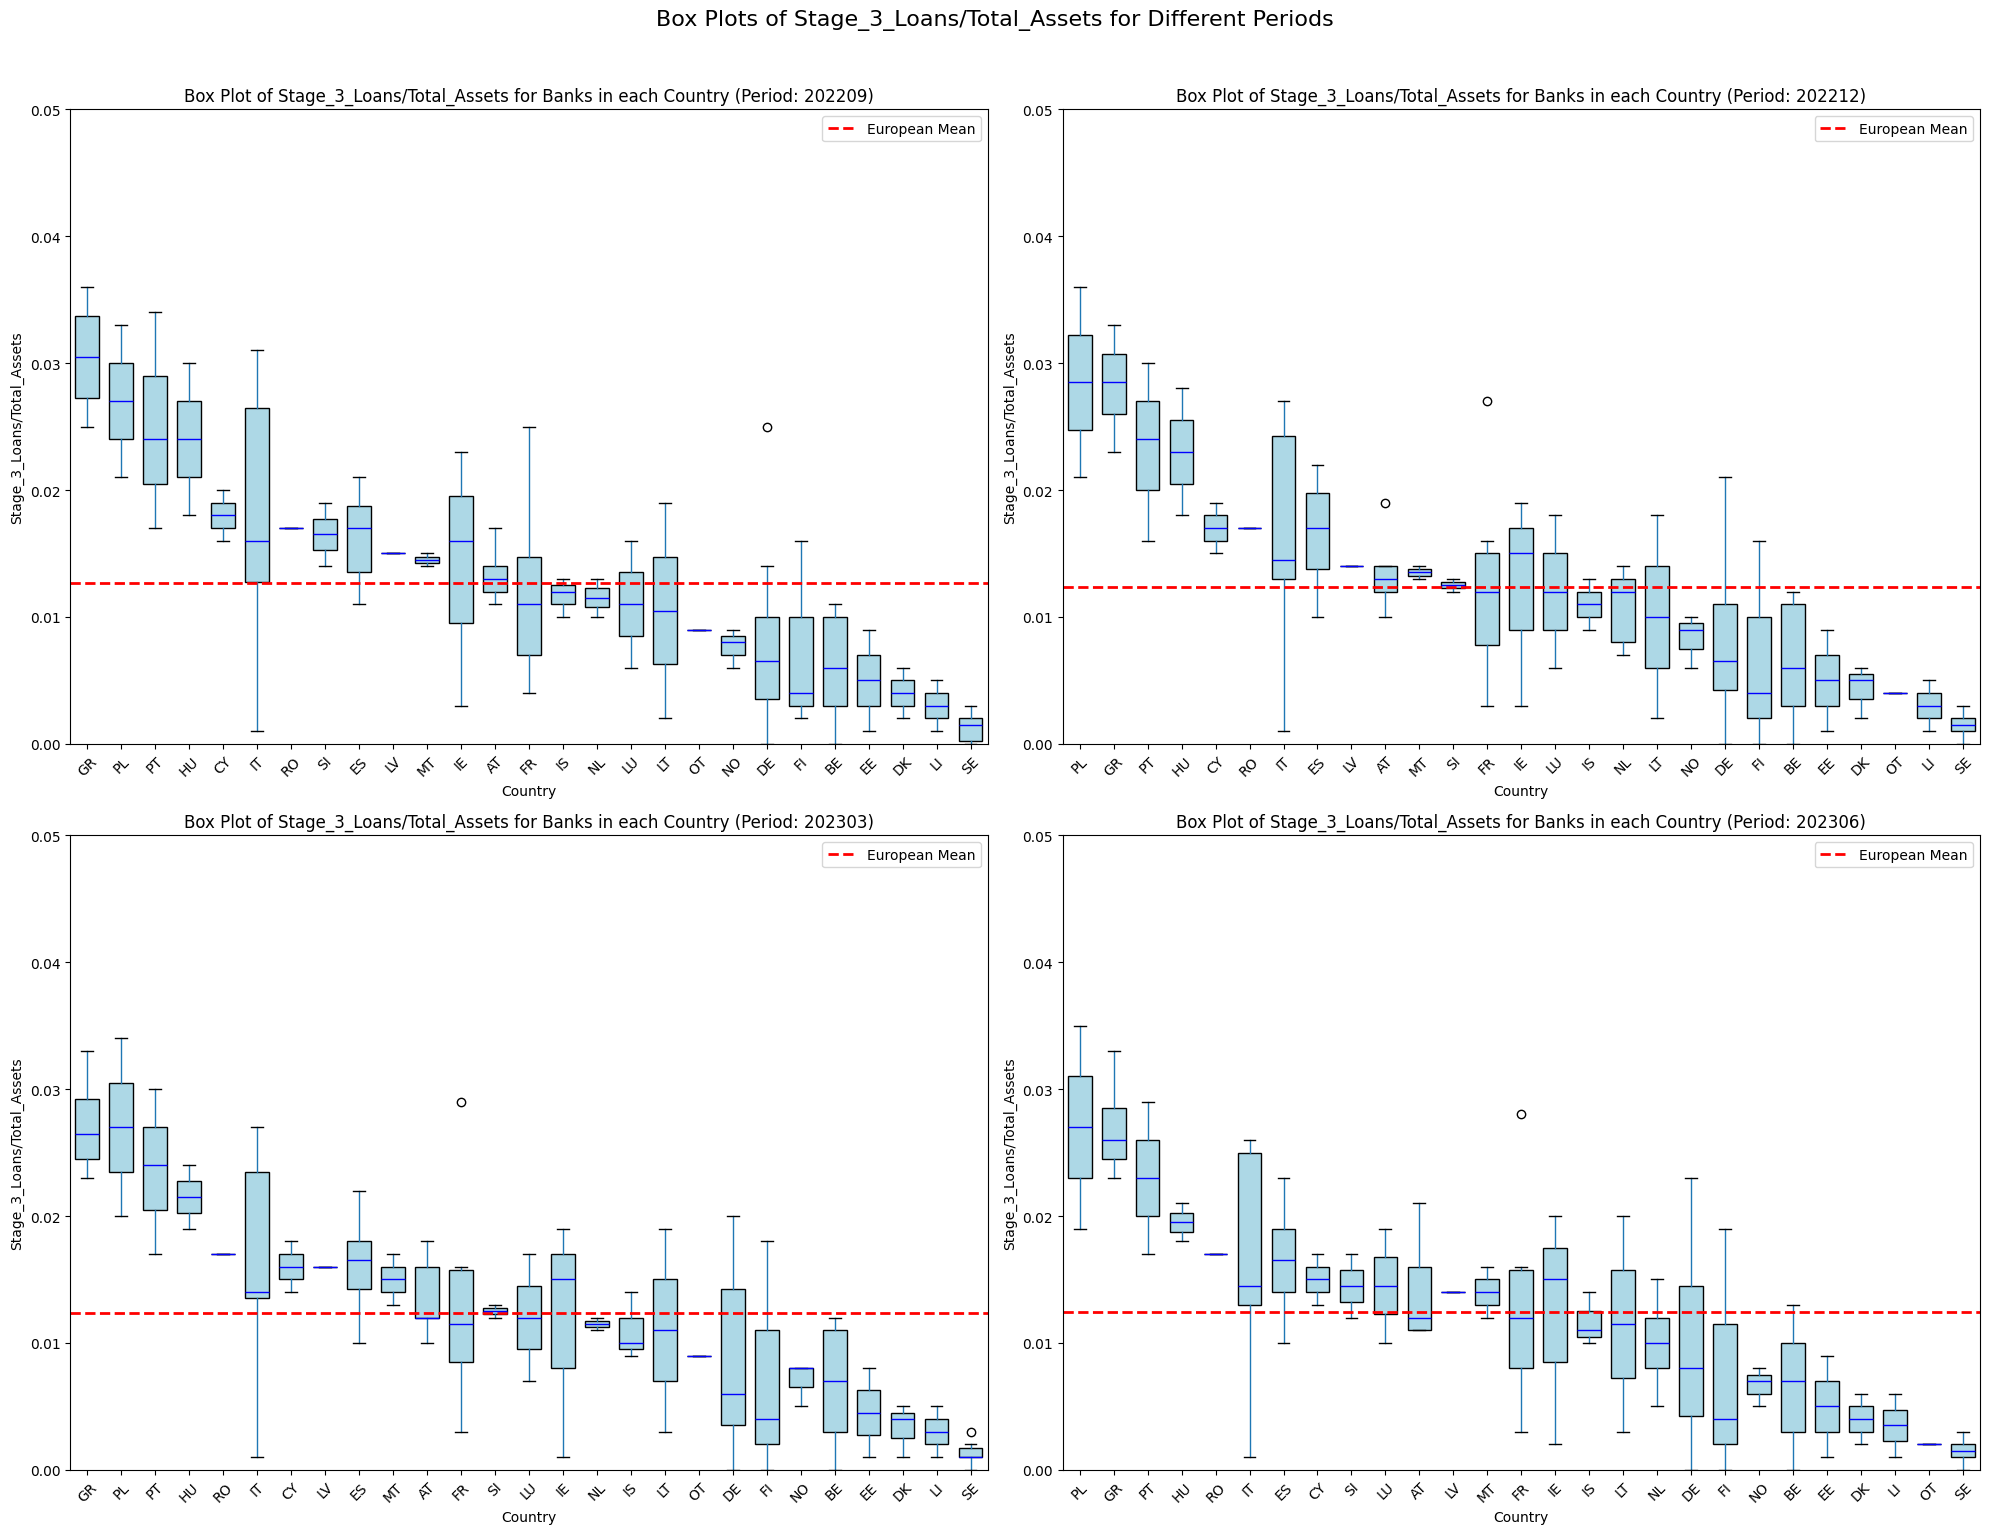

In [21]:
def plot_boxplots(dfs, periods):
    # Create a figure with 2 rows and 2 columns of subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))

    for i, (df, period) in enumerate(zip(dfs, periods)):
        # Filter out 'OT' and rows where Total_Assets is 0
        df_filtered = df[(df['Total_Assets'] != 0)]

        # Group by 'NSA' and calculate the mean of 'Stage_3_Loans/Total_Assets'
        grouped_mean = df_filtered.groupby('NSA')['Stage_3_Loans/Total_Assets'].mean().reset_index()
        grouped_mean = grouped_mean.sort_values(by='Stage_3_Loans/Total_Assets', ascending=False)  # Sort countries by mean

        # Reorder 'df_filtered' based on the sorted order of 'NSA' in 'grouped_mean'
        df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_mean['NSA'], ordered=True)
        df_filtered = df_filtered.sort_values('NSA')

        # Calculate the European Mean for 'Stage_3_Loans/Total_Assets'
        european_mean = df['Stage_3_Loans/Total_Assets'].mean()
        
        # Select the subplot based on the index
        ax = axs[i // 2, i % 2]  # Calculate row and column index

        # Create a box plot for Stage_3_Loans/Total_Assets grouped by NSA
        df_filtered.boxplot(column='Stage_3_Loans/Total_Assets', by='NSA', ax=ax, grid=False, patch_artist=True, widths=0.7,
                            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='blue'))

        # Set the x-axis labels based on the sorted 'NSA' order
        ax.set_xticklabels(grouped_mean['NSA'], rotation=45)

        # Format the y-axis to display numbers normally (e.g., 0.50)
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{float(x):.2f}'))

        # Add the European Mean line
        european_mean_line = ax.axhline(y=european_mean, color='red', linestyle='--', linewidth=2, label='European Mean')

        # Title and labels for the current subplot
        ax.set_title(f'Box Plot of Stage_3_Loans/Total_Assets for Banks in each Country (Period: {period})')
        ax.set_xlabel('Country')
        ax.set_ylabel('Stage_3_Loans/Total_Assets')

        # Add a legend to the top right corner
        ax.legend([european_mean_line], ['European Mean'], loc='upper right', fontsize=10)

        # Optional: Set y-axis limits to improve visibility
        ax.set_ylim(0, 0.05)  # Adjust the lower limit to a minimum value suitable for this scale

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.suptitle('Box Plots of Stage_3_Loans/Total_Assets for Different Periods', fontsize=16, y=1.02)  # Add a super title
    plt.savefig('box_plots_Stage_3_Loans_to_Total_Assets.png', dpi=300, bbox_inches='tight')

    # Show the plots
    plt.show()

# Call the function for all DataFrames
dfs = [df_202209, df_202212, df_202303, df_202306]
periods = [202209, 202212, 202303, 202306]
plot_boxplots(dfs, periods)


C:\Users\User\AppData\Local\Temp\ipykernel_24812\1856113014.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(grouped_mean['NSA'], rotation=45)
C:\Users\User\AppData\Local\Temp\ipykernel_24812\1856113014.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(grouped_mean['NSA'], rotation=45)
C:\Users\User\AppData\Local\Temp\ipykernel_24812\1856113014.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(grouped_mean['NSA'], rotation=45)
C:\Users\User\AppData\Local\Temp\ipykernel_24812\1856113014.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(grouped_mean['NSA'], rotation=45)


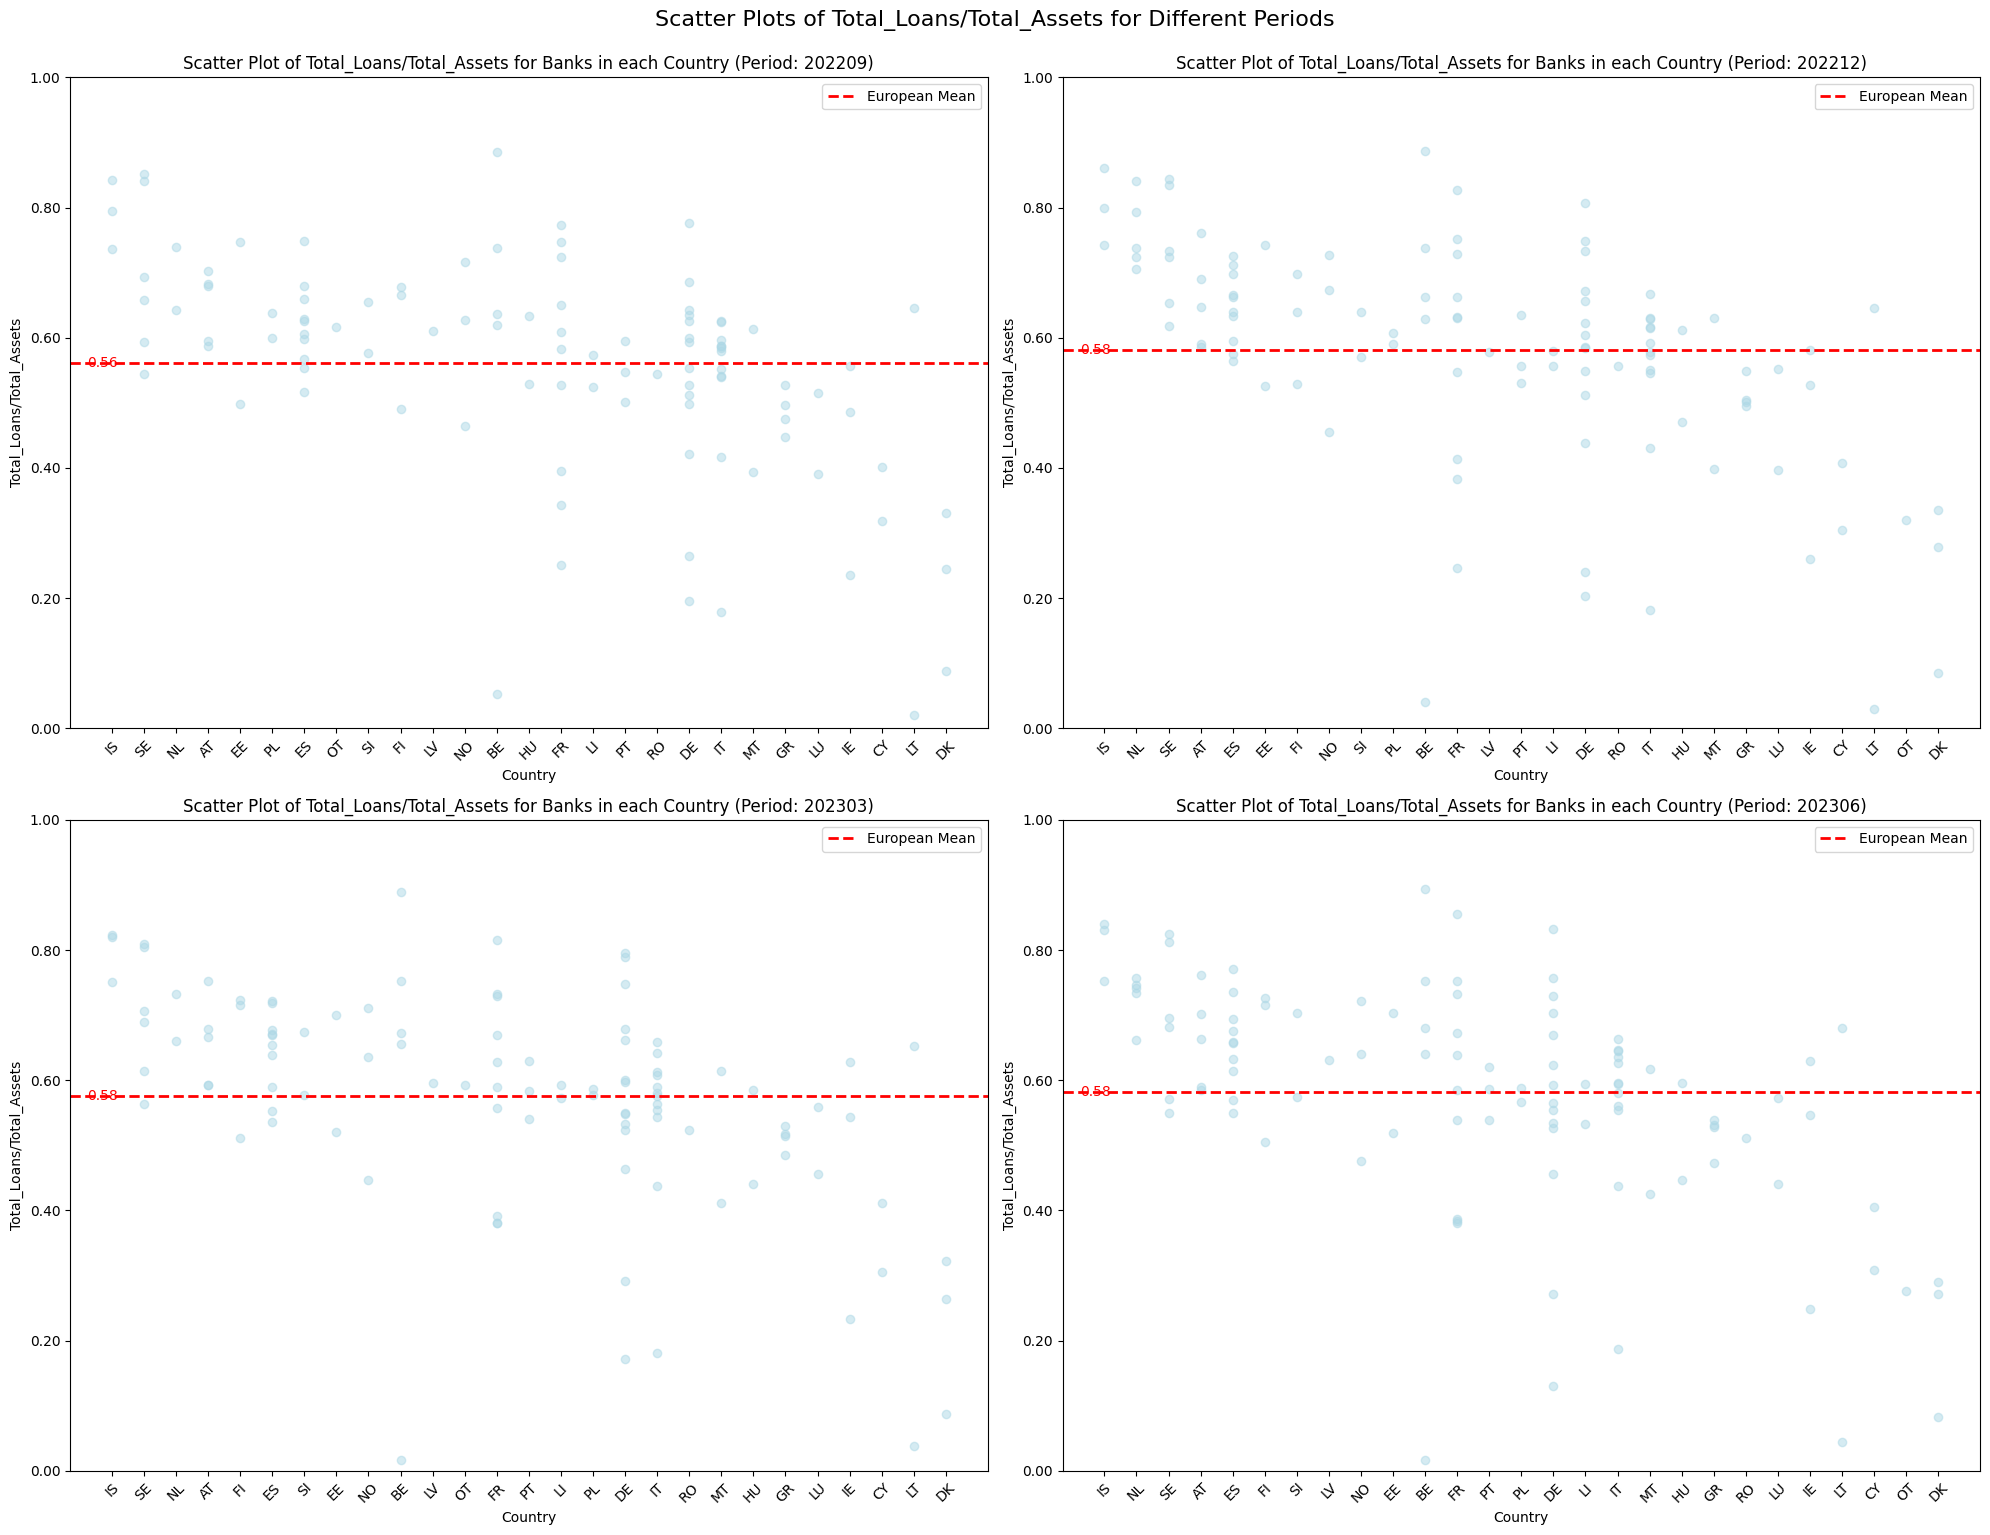

In [22]:
def plot_scatterplots(dfs, periods):
    # Create a figure with 2 rows and 2 columns of subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))

    for i, (df, period) in enumerate(zip(dfs, periods)):
        # Filter out 'OT' and rows where Total_Loans is 0
        df_filtered = df[(df['Total_Loans'] != 0)]

        # Group by 'NSA' and calculate the mean of 'Total_Loans/Total_Assets'
        grouped_mean = df_filtered.groupby('NSA')['Total_Loans/Total_Assets'].mean().reset_index()
        grouped_mean = grouped_mean.sort_values(by='Total_Loans/Total_Assets', ascending=False)  # Sort countries by mean of loans

        # Reorder 'df_filtered' based on the sorted order of 'NSA' in 'grouped_mean'
        df_filtered['NSA'] = pd.Categorical(df_filtered['NSA'], categories=grouped_mean['NSA'], ordered=True)
        df_filtered = df_filtered.sort_values('NSA')

        # Calculate the European Mean for 'Total_Loans'
        european_mean = df['Total_Loans/Total_Assets'].mean()
        
        # Select the subplot based on the index
        ax = axs[i // 2, i % 2]  # Calculate row and column index

        # Create a scatter plot for Total_Loans/Total_Assets grouped by NSA
        ax.scatter(df_filtered['NSA'], df_filtered['Total_Loans/Total_Assets'], alpha=0.5, color='lightblue')

        # Set the x-axis labels based on the sorted 'NSA' order
        ax.set_xticklabels(grouped_mean['NSA'], rotation=45)

        # Format the y-axis to display numbers normally (e.g., 1,000 instead of 10^3)
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{float(x):.2f}'))

        # Add the European Mean line
        european_mean_line = ax.axhline(y=european_mean, color='red', linestyle='--', linewidth=2, label='European Mean')

        # Annotate the European Mean on the y-axis
        ax.text(0.2, european_mean, f'{float(european_mean):.2f}', color='red', fontsize=10, ha='right', va='center')

        # Title and labels for the current subplot
        ax.set_title(f'Scatter Plot of Total_Loans/Total_Assets for Banks in each Country (Period: {period})')
        ax.set_xlabel('Country')
        ax.set_ylabel('Total_Loans/Total_Assets')

        # Add a legend to the top right corner
        ax.legend([european_mean_line], ['European Mean'], loc='upper right', fontsize=10)

        # Optional: Set y-axis limits to improve visibility
        ax.set_ylim(0, 1)  # Adjust the limits as necessary

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.suptitle('Scatter Plots of Total_Loans/Total_Assets for Different Periods', fontsize=16, y=1.02)  # Add a super title
    plt.savefig('scatter_plots_Total_Loans_to_Total_Assets.png', dpi=300, bbox_inches='tight')

    # Show the plots
    plt.show()

# Call the function for all DataFrames
dfs = [df_202209, df_202212, df_202303, df_202306]
periods = [202209, 202212, 202303, 202306]
plot_scatterplots(dfs, periods)

## Other describe functions to analize data


In [26]:
columns_to_describe = [ 'Total_Loans' ,  'Total_Assets' ,'Stage_1_Loans/Total_Loans' , 'Stage_2_Loans/Total_Loans' , \
                       'Stage_3_Loans/Total_Loans', 'Stage_3_Loans/Total_Assets', 'Total_Loans/Total_Assets' ] 	

In [27]:
descriptive_country = for_stats_df.groupby('NSA')[columns_to_describe].describe()
descriptive_country = descriptive_country.loc[:, descriptive_country.columns.get_level_values(1) != 'count'] #drop count stat from table, we dont care
descriptive_country


Total_Loans                                                         \
              mean            std      min       25%       50%        75%   
NSA                                                                         
AT    88764.650000   81139.374242  22033.0  28741.25   36467.0  125938.25   
BE    82051.050000   74217.778667    662.0  39410.75   47850.5  109842.25   
CY     8125.875000    2011.917543   6047.0   6183.75    8115.0   10104.25   
DE   119290.779412  155142.259010      0.0  17590.00   49917.5  190527.50   
DK    63174.000000   58939.579162  17882.0  18851.50   27930.0  130666.25   
EE     7050.125000    3937.464847   3116.0   3213.50    7054.0   10884.25   
ES   234934.850000  322354.110931  31262.0  46836.50   66580.5  372459.00   
FI   136418.916667  103903.667291  32703.0  34477.50   99339.5  270900.50   
FR   479692.450000  432180.576991  45209.0  55661.50  370664.0  927904.75   
GR    39449.875000    2802.465333  36200.0  37964.25   38353.5   40269.50   
HU    33538.625000   21197.104511  12357.0  12798.00   32060.0   52359.00   
IE    60368.250000   21521.127734  29981.0  32673.00   69370.5   76535.00   
IS     8874.500000    1281.547424   7202.0   7659.00    8667.5   10257.50   
IT   130775.270833  165668.969704   6337.0  34269.25   69679.5   99692.50   
LI    24421.875000    9445.218009  14839.0  15273.00   23943.0   33506.75   
LT     1510.250000    1222.870936    192.0    333.75    1510.5    2693.50   
LU    11876.625000    6176.270296   5632.0   5887.25   11829.0   17903.25   
LV     3065.000000      30.433235   3034.0   3038.50    3061.0    3087.50   
MT     4401.000000    1507.981115   2766.0   2972.00    4396.5    5807.50   
NL   367093.714286  237756.228120  55311.0  94268.00  306981.0  675990.00   
NO    73242.500000   78792.362444  12256.0  13563.00   23656.5  178050.50   
OT   369825.000000  327827.640178  45171.0  61496.25  373871.0  682199.75   
PL    46204.750000    9603.138777  36164.0  36721.50   46051.5   54381.25   
PT    45374.750000   14126.573179  25677.0  25877.25   53557.5   56269.00   
RO    15740.000000     107.744648  15600.0  15662.25   15754.5   15832.25   
SE   112259.916667   77002.831320  28378.0  34428.50  103823.5  184538.75   
SI     8856.750000    5103.513770   3681.0   3838.00    8883.0   13802.25   

                 Total_Assets                           ...  \
           max           mean            std       min  ...   
NSA                                                     ...   
AT    241216.0  136350.050000  120253.534820   29224.0  ...   
BE    216812.0  128996.950000  110969.181157   38318.0  ...   
CY     10160.0   22353.625000    2526.978843   19587.0  ...   
DE    632964.0  238066.338235  324128.627556   30786.0  ...   
DK    159252.0  255082.833333  148797.095468   90368.0  ...   
EE     10966.0   10647.875000    4553.350771    6091.0  ...   
ES   1132048.0  374498.775000  513141.690767   47282.0  ...   
FI    280552.0  245345.833333  217682.018251   47455.0  ...   
FR   1275436.0  910569.325000  851728.438447   58500.0  ...   
GR     44737.0   77774.937500    3685.806846   72041.0  ...   
HU     59214.0   58523.500000   32210.634778   26277.0  ...   
IE     84832.0  131496.333333    4498.160640  121263.0  ...   
IS     10712.0   11059.416667    1114.389734    9700.0  ...   
IT    520488.0  225266.083333  282786.496293   33816.0  ...   
LI     34587.0   43791.875000   18207.454427   25546.0  ...   
LT      2838.0    6848.125000    2818.104841    3967.0  ...   
LU     18203.0   23310.125000    9685.460835   12813.0  ...   
LV      3104.0    5084.500000     189.328718    4820.0  ...   
MT      6059.0    9583.500000    4957.284469    4509.0  ...   
NL    682951.0  523998.357143  363006.900906   73028.0  ...   
NO    187797.0  115156.083333  121271.508395   27449.0  ...   
OT    686387.0  661206.750000  491977.694976  141045.0  ...   
PL     58524.0   78091.625000   17621.640453   57675.0  ...   
PT     57819.0   79571.083333   24975.601836   44106.0  ..

C:\Users\User\AppData\Local\Temp\ipykernel_10468\965804780.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_to_display['Total_Assets'] = table_to_display['Total_Assets'].apply(format_number)
C:\Users\User\AppData\Local\Temp\ipykernel_10468\965804780.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_to_display['Total_Loans'] = table_to_display['Total_Loans'].apply(format_number)


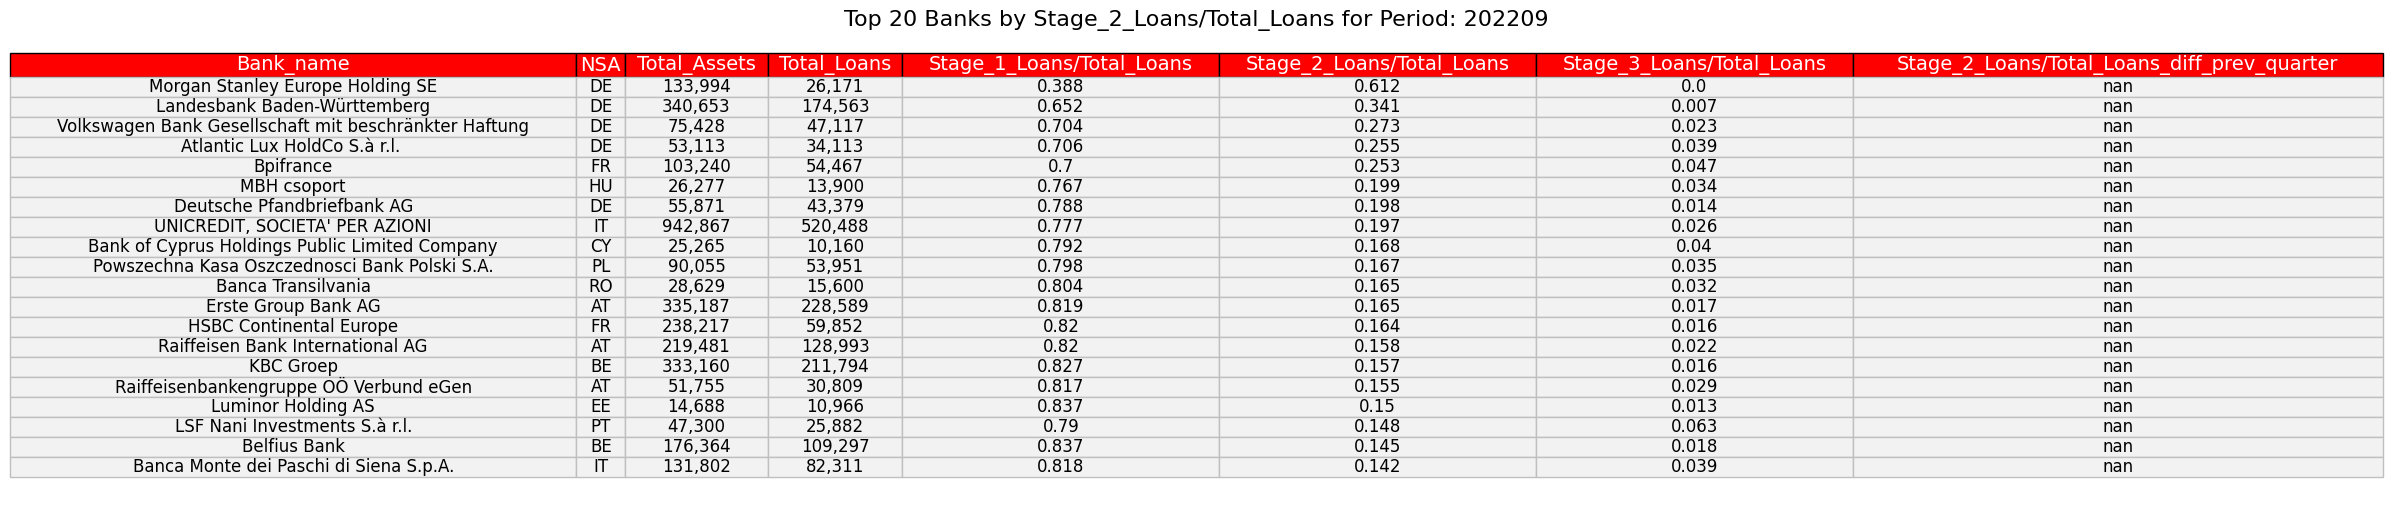

C:\Users\User\AppData\Local\Temp\ipykernel_10468\965804780.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_to_display['Total_Assets'] = table_to_display['Total_Assets'].apply(format_number)
C:\Users\User\AppData\Local\Temp\ipykernel_10468\965804780.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_to_display['Total_Loans'] = table_to_display['Total_Loans'].apply(format_number)


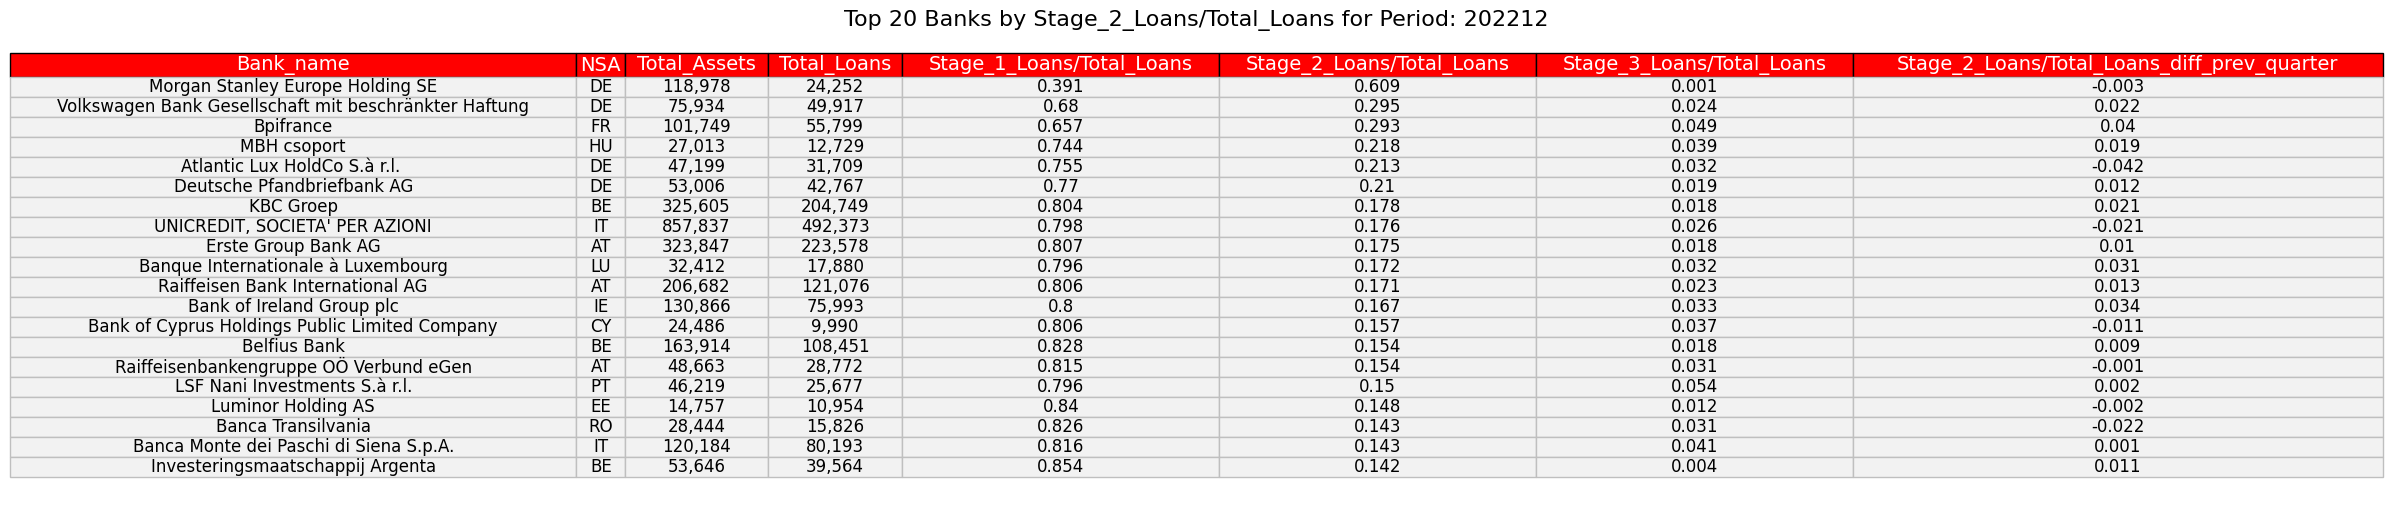

C:\Users\User\AppData\Local\Temp\ipykernel_10468\965804780.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_to_display['Total_Assets'] = table_to_display['Total_Assets'].apply(format_number)
C:\Users\User\AppData\Local\Temp\ipykernel_10468\965804780.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_to_display['Total_Loans'] = table_to_display['Total_Loans'].apply(format_number)


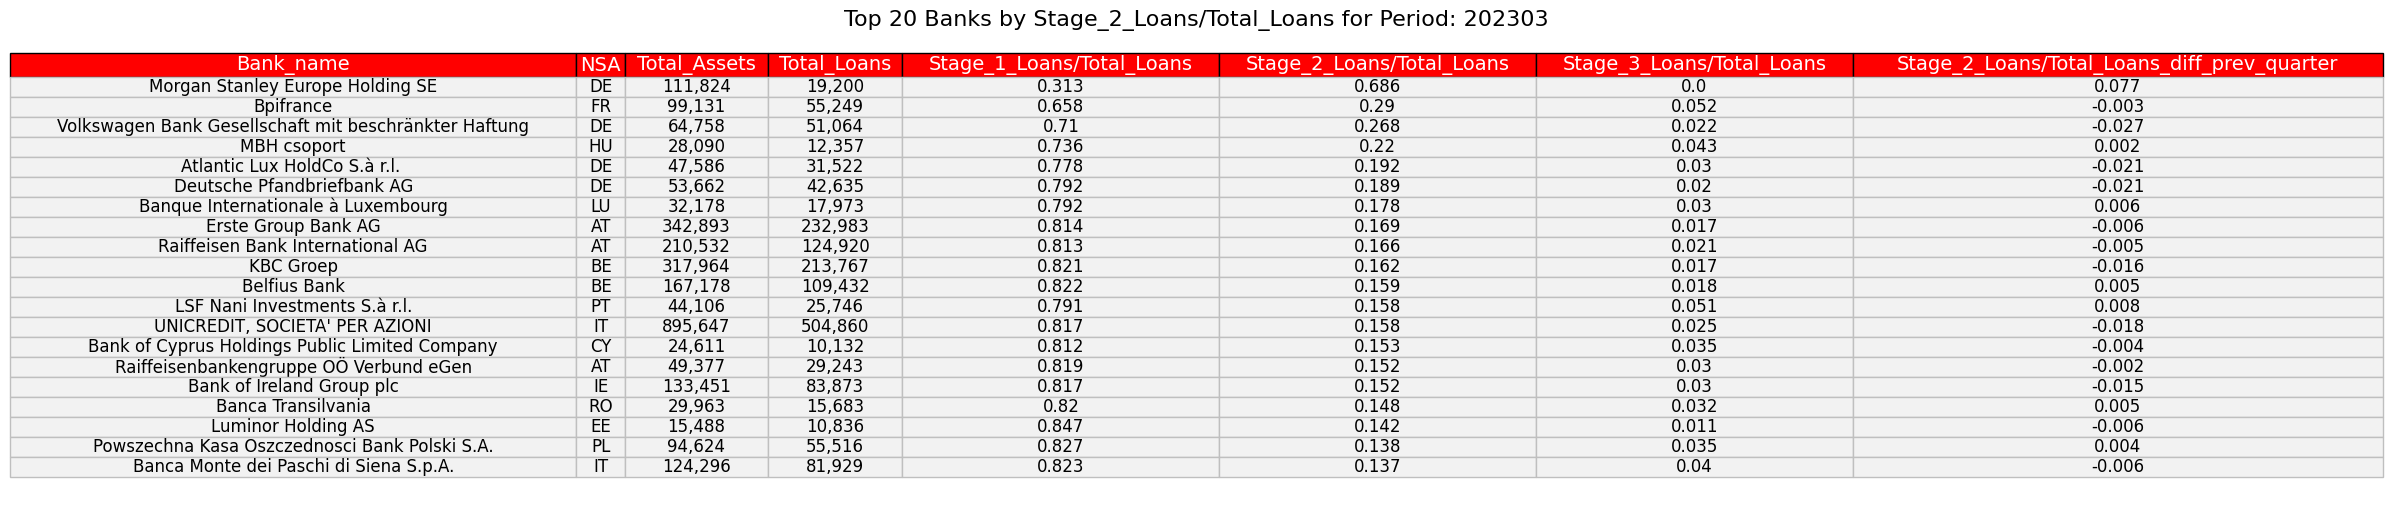

C:\Users\User\AppData\Local\Temp\ipykernel_10468\965804780.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_to_display['Total_Assets'] = table_to_display['Total_Assets'].apply(format_number)
C:\Users\User\AppData\Local\Temp\ipykernel_10468\965804780.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_to_display['Total_Loans'] = table_to_display['Total_Loans'].apply(format_number)


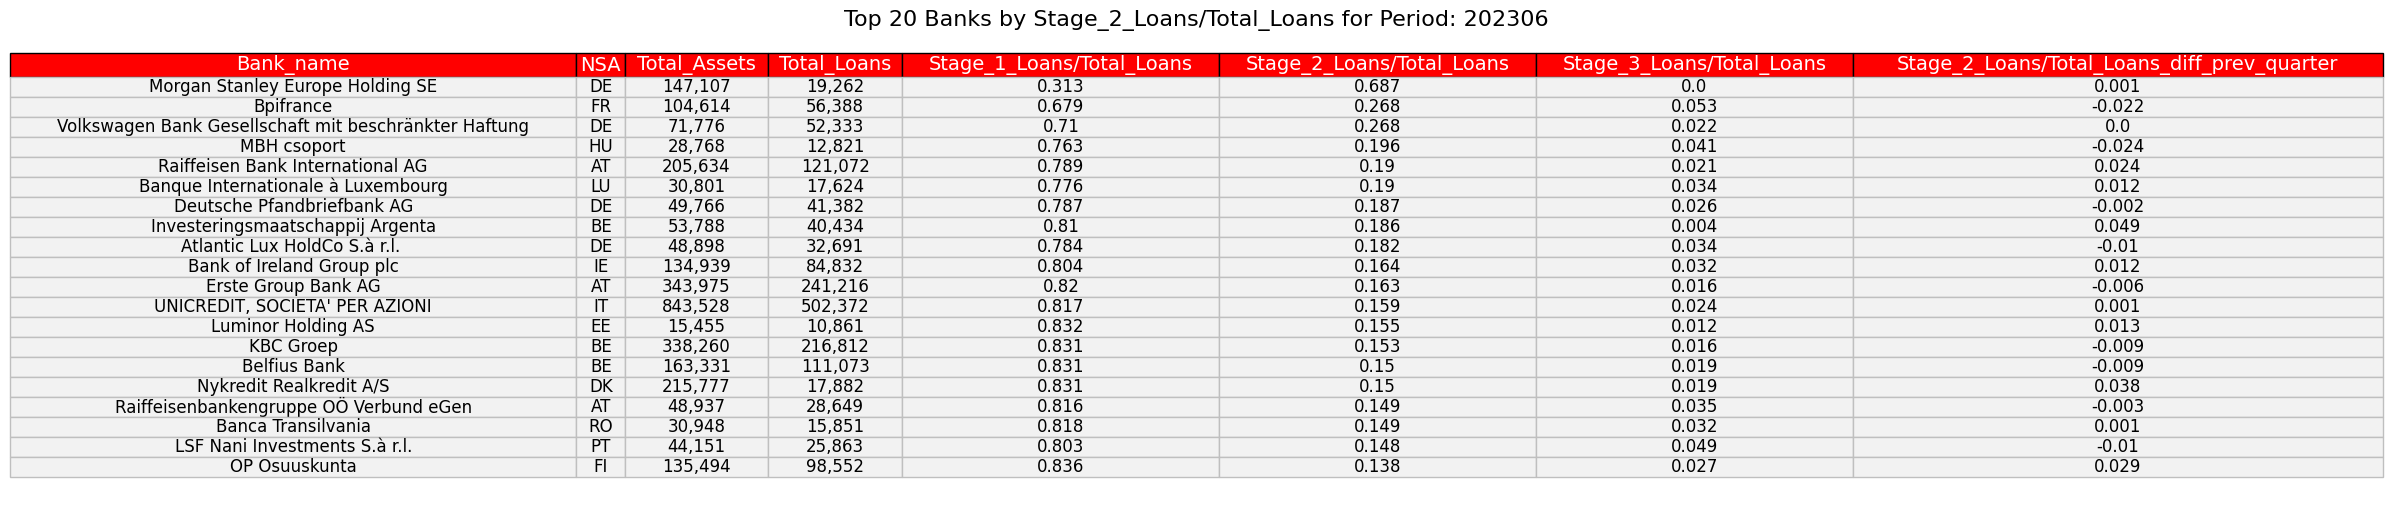

In [60]:
def format_number(num):
    """Format numbers with commas and no decimals."""
    return f"{int(num):,}"

def display_and_export_top_banks(dfs, periods):
    for df, period in zip(dfs, periods):
        # Filter out 'OT' and rows where Total_Loans is 0
        df_filtered = df[df['Total_Loans'] != 0]
        
        # Sort the DataFrame by Stage_2_Loans/Total_Loans in descending order
        top_banks = df_filtered.sort_values(by='Stage_2_Loans/Total_Loans', ascending=False).head(20)

        # Select and reorder the columns as specified
        table_to_display = top_banks[['Bank_name', 'NSA', 'Total_Assets', 'Total_Loans', 
                                       'Stage_1_Loans/Total_Loans', 'Stage_2_Loans/Total_Loans', 
                                       'Stage_3_Loans/Total_Loans', 'Stage_2_Loans/Total_Loans_diff_prev_quarter']]

        # Format Total_Assets and Total_Loans columns
        table_to_display['Total_Assets'] = table_to_display['Total_Assets'].apply(format_number)
        table_to_display['Total_Loans'] = table_to_display['Total_Loans'].apply(format_number)

        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size as needed
        ax.axis('tight')
        ax.axis('off')

        # Create a table
        table = ax.table(cellText=table_to_display.values, 
                         colLabels=table_to_display.columns, 
                         cellLoc='center', 
                         loc='center')

        # Style the table
        table.auto_set_font_size(False)  # Allow us to set the font size
        table.set_fontsize(12)  # Set the font size
        table.scale(1.2, 1.2)  # Scale the table for better visibility

        # Add color to the header
        for (i, j), cell in table.get_celld().items():
            if i == 0:  # Header row
                cell.set_facecolor('red')  # Red color for header
                cell.set_text_props(color='white')  # White text
                cell.set_fontsize(14)
                cell.set_height(0.05)  # Increase the height of the header cell
            else:  # Regular cells
                cell.set_facecolor('#f2f2f2')  # Light gray
                cell.set_edgecolor('#bfbfbf')  # Border color
                cell.set_fontsize(12)

        # Adjust column widths for better fitting
        for j in range(len(table_to_display.columns)):
            table.auto_set_column_width([j])  # Automatically adjust column width

        # Set the title for the table
        plt.title(f'Top 20 Banks by Stage_2_Loans/Total_Loans for Period: {period}', fontsize=16)

        # Save the table as a PNG image
        plt.savefig(f'top_20_banks_stage_2_loans_{period}.png', bbox_inches='tight', dpi=300)

        # Show the table plot (optional)
        plt.show()

# Call the function for all DataFrames
dfs = [df_202209, df_202212, df_202303, df_202306]
periods = [202209, 202212, 202303, 202306]
display_and_export_top_banks(dfs, periods)